<img src="https://github.com/Itguts/Images/blob/master/DSV.jpg?raw=true" alt="Data Science by Vikash" />
<br />

<div >
    <h1>Problem Statement</h1>
</div>

A chinese car company- **Teclov_Chinese** wants to establish its strong footprint in US and Europe markets. Company wants to manufacture and sell some cars in these markets. Before launching any car, company wants to do some analysis from the data available from the US market <br>
- The driving factors to set car's price
- And a statistically proven ,  mathematical equation using model to predict the price of the car
<br>
Reference:- https://en.wikipedia.org/wiki/Geely

<div >
<h2>Intuition</h2> Before  doing exploratory analysis after loading datasets, there some intuitions coming out after going through this business problem.<br>
    Below are the list of intuitions comprising the posssible root cause and hypothesis for the price of the car:<br>

</div>

<div>

Hypothesis and intuitions for yhe price of the car

Brand of the car
Type of engine(petrol/diesel)
Type of the car(Hatchback/sedan/SUV..)
No of seats and size of the car
Features in the car
Power of the car in terms of CC and Engine.
Mileage of the car.
Service centers availability
Resale value of the car
    

</div>

<div >
<h2>Approach</h2>
</div><br>




- We will load the dataset provided by the consulting firm
- Check the data information
- Clean the data
- Perform Exploratory data analysis
- Analyze various visualization
- Note observations
- Create new features
- Create dummy variables
- Outlier detection and treatment
- Data Scaling
- Feature selection
- Build model
- Test model
- Model performance metrics
- Model optimization
- Conclusion and inferences

<div >
<h2>Loading Packages</h2>
    Also applying CSS code to make UI better
</div>

In [1]:
# import the packages
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# full columns list view and data frame css
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [1]:
# get current working directory
%pwd

'D:\\Study\\Python\\GitProjects\\DataScience_Projects\\DataScience_Projects\\Linear Regression\\Linear Regression'

In [5]:
# suprressing warning messages for cleaner presentation
import warnings
warnings.filterwarnings('ignore')

<div >
<h2>Loading Data</h2>
    Load both the datsets- data dictionary and car 
</div>

In [6]:
#import data dictionary
df_data_dictionary = pd.read_excel('Data Dictionary - carprices.xlsx',skiprows=3,parse_cols="H,L")
df_data_dictionary.columns = ["Column_Name","Description"]
df_data_dictionary = df_data_dictionary.dropna(how = 'all')

In [7]:
df_data_dictionary

Column_Name  \
0   Car_ID                      
1   Symboling                   
2   carCompany                  
3   fueltype                    
4   aspiration                  
5   doornumber                  
6   carbody                     
7   drivewheel                  
8   enginelocation              
9   wheelbase                   
10  carlength                   
11  carwidth                    
12  carheight                   
13  curbweight                  
14  enginetype                  
15  cylindernumber              
16  enginesize                  
17  fuelsystem                  
18  boreratio                   
19  stroke                      
20  compressionratio            
21  horsepower                  
22  peakrpm                     
23  citympg                     
24  highwaympg                  
25  price(Dependent variable)   

                                                                                                                              Description  
0   Unique id of each observation (Interger)                                                                                               
1   Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)   
2   Name of car company (Categorical)                                                                                                      
3   Car fuel type i.e gas or diesel (Categorical)                                                                                          
4   Aspiration used in a car (Categorical)                                                                                                 
5   Number of doors in a car (Categorical)                                                                                                 
6   body of car (Categorical)                                                                                                              
7   type of drive wheel (Categorical)                                                                                                      
8   Location of car engine (Categorical)                                                                                                   
9   Weelbase of car (Numeric)                                                                                                              
10  Length of car (Numeric)                                                                                                                
11  Width of car (Numeric)                                                                                                                 
12  height of car (Numeric)                                                                                                                
13  The weight of a car without occupants or baggage. (Numeric)                                                                            
14  Type of engine. (Categorical)                                                                                                          
15  cylinder placed in the car (Categorical)                                                                                               
16  Size of car (Numeric)                                                                                                                  
17  Fuel system of car (Categorical)                                                                                                       
18  Boreratio of car (Numeric)                                                                                                             
19  Stroke or volume inside the engine (Numeric)                                                                                           
20  compression ratio of car (Numeric)                                                                                                     
21  Horsepower (Numeric)                      

In [8]:
# getting information
df_data_dictionary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 2 columns):
Column_Name    26 non-null object
Description    26 non-null object
dtypes: object(2)
memory usage: 624.0+ bytes


In [9]:
#checking value counts for column name(duplicate)
df_data_dictionary['Column_Name'].value_counts()>1

cylindernumber               False
curbweight                   False
enginetype                   False
fueltype                     False
Symboling                    False
Car_ID                       False
carCompany                   False
fuelsystem                   False
doornumber                   False
highwaympg                   False
carheight                    False
enginelocation               False
carlength                    False
citympg                      False
horsepower                   False
drivewheel                   False
stroke                       False
price(Dependent variable)    False
peakrpm                      False
enginesize                   False
wheelbase                    False
boreratio                    False
carbody                      False
aspiration                   False
compressionratio             False
carwidth                     False
Name: Column_Name, dtype: bool

In [10]:
#checking unique column names
len(df_data_dictionary['Column_Name'].unique())

26

In [11]:
# Column_Name is unique in the dataset

In [12]:
# import car data
df_car = pd.read_csv('CarPrice_Assignment.csv')

In [13]:
# exploring top and last rows
df_car.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0  1       3          alfa-romero giulia        gas      std        two         
1  2       3          alfa-romero stelvio       gas      std        two         
2  3       1          alfa-romero Quadrifoglio  gas      std        two         
3  4       2          audi 100 ls               gas      std        four        
4  5       2          audi 100ls                gas      std        four        

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible  rwd        front          88.6       168.8      64.1       
1  convertible  rwd        front          88.6       168.8      64.1       
2  hatchback    rwd        front          94.5       171.2      65.5       
3  sedan        fwd        front          99.8       176.6      66.2       
4  sedan        4wd        front          99.4       176.6      66.4       

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0  48.8       2548        dohc       four           130         mpfi        
1  48.8       2548        dohc       four           130         mpfi        
2  52.4       2823        ohcv       six            152         mpfi        
3  54.3       2337        ohc        four           109         mpfi        
4  54.3       2824        ohc        five           136         mpfi        

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0  3.47       2.68    9.0               111         5000     21        
1  3.47       2.68    9.0               111         5000     21        
2  2.68       3.47    9.0               154         5000     19        
3  3.19       3.40    10.0              102         5500     24        
4  3.19       3.40    8.0               115         5500     18        

   highwaympg    price  
0  27          13495.0  
1  27          16500.0  
2  26          16500.0  
3  30          13950.0  
4  22          17450.0

In [14]:
df_car.tail()

car_ID  symboling          CarName fueltype aspiration doornumber  \
200  201    -1          volvo 145e (sw)  gas      std        four        
201  202    -1          volvo 144ea      gas      turbo      four        
202  203    -1          volvo 244dl      gas      std        four        
203  204    -1          volvo 246        diesel   turbo      four        
204  205    -1          volvo 264gl      gas      turbo      four        

    carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
200  sedan   rwd        front          109.1      188.8      68.9       
201  sedan   rwd        front          109.1      188.8      68.8       
202  sedan   rwd        front          109.1      188.8      68.9       
203  sedan   rwd        front          109.1      188.8      68.9       
204  sedan   rwd        front          109.1      188.8      68.9       

     carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
200  55.5       2952        ohc        four           141         mpfi        
201  55.5       3049        ohc        four           141         mpfi        
202  55.5       3012        ohcv       six            173         mpfi        
203  55.5       3217        ohc        six            145         idi         
204  55.5       3062        ohc        four           141         mpfi        

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
200  3.78       3.15    9.5               114         5400     23        
201  3.78       3.15    8.7               160         5300     19        
202  3.58       2.87    8.8               134         5500     18        
203  3.01       3.40    23.0              106         4800     26        
204  3.78       3.15    9.5               114         5400     19        

     highwaympg    price  
200  28          16845.0  
201  25          19045.0  
202  23          21485.0  
203  27          22470.0  
204  25          22625.0

In [15]:
## checking the rows from last column
df_car.loc[:,::-1].head()

price  highwaympg  citympg  peakrpm  horsepower  compressionratio  \
0  13495.0  27          21       5000     111         9.0                
1  16500.0  27          21       5000     111         9.0                
2  16500.0  26          19       5000     154         9.0                
3  13950.0  30          24       5500     102         10.0               
4  17450.0  22          18       5500     115         8.0                

   stroke  boreratio fuelsystem  enginesize cylindernumber enginetype  \
0  2.68    3.47       mpfi       130         four           dohc        
1  2.68    3.47       mpfi       130         four           dohc        
2  3.47    2.68       mpfi       152         six            ohcv        
3  3.40    3.19       mpfi       109         four           ohc         
4  3.40    3.19       mpfi       136         five           ohc         

   curbweight  carheight  carwidth  carlength  wheelbase enginelocation  \
0  2548        48.8       64.1      168.8      88.6       front           
1  2548        48.8       64.1      168.8      88.6       front           
2  2823        52.4       65.5      171.2      94.5       front           
3  2337        54.3       66.2      176.6      99.8       front           
4  2824        54.3       66.4      176.6      99.4       front           

  drivewheel      carbody doornumber aspiration fueltype  \
0  rwd        convertible  two        std        gas       
1  rwd        convertible  two        std        gas       
2  rwd        hatchback    two        std        gas       
3  fwd        sedan        four       std        gas       
4  4wd        sedan        four       std        gas       

                    CarName  symboling  car_ID  
0  alfa-romero giulia        3          1       
1  alfa-romero stelvio       3          2       
2  alfa-romero Quadrifoglio  1          3       
3  audi 100 ls               2          4       
4  audi 100ls                2          5

In [16]:
#viewing data from last columns
df_car.loc[:,::-1].tail()

price  highwaympg  citympg  peakrpm  horsepower  compressionratio  \
200  16845.0  28          23       5400     114         9.5                
201  19045.0  25          19       5300     160         8.7                
202  21485.0  23          18       5500     134         8.8                
203  22470.0  27          26       4800     106         23.0               
204  22625.0  25          19       5400     114         9.5                

     stroke  boreratio fuelsystem  enginesize cylindernumber enginetype  \
200  3.15    3.78       mpfi       141         four           ohc         
201  3.15    3.78       mpfi       141         four           ohc         
202  2.87    3.58       mpfi       173         six            ohcv        
203  3.40    3.01       idi        145         six            ohc         
204  3.15    3.78       mpfi       141         four           ohc         

     curbweight  carheight  carwidth  carlength  wheelbase enginelocation  \
200  2952        55.5       68.9      188.8      109.1      front           
201  3049        55.5       68.8      188.8      109.1      front           
202  3012        55.5       68.9      188.8      109.1      front           
203  3217        55.5       68.9      188.8      109.1      front           
204  3062        55.5       68.9      188.8      109.1      front           

    drivewheel carbody doornumber aspiration fueltype          CarName  \
200  rwd        sedan   four       std        gas      volvo 145e (sw)   
201  rwd        sedan   four       turbo      gas      volvo 144ea       
202  rwd        sedan   four       std        gas      volvo 244dl       
203  rwd        sedan   four       turbo      diesel   volvo 246         
204  rwd        sedan   four       turbo      gas      volvo 264gl       

     symboling  car_ID  
200 -1          201     
201 -1          202     
202 -1          203     
203 -1          204     
204 -1          205

In [17]:
# getting shape
df_car.shape    # 26 columns and 205 rows

(205, 26)

**Observation**:- Car data comprised of 205 rows and 26 columns. It seems that there are many columns that need to be explored. There would be many columns that might not be significant for the prediction of the car's price and many columns could be significant and contain insights as per the problem statement. We will remove insignificant columns and will keep only the relevant ones for the convenience and performance of the model.

<div >
<h2>Data Cleaning</h2>
  
</div>

In [18]:
# checking data information
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

**Observation** :- The data types are float, int and objects. There are 205 records and all columns have values(no null values)

In [19]:
# getting columns
print(list(df_car.columns))

['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [20]:
# getting categorical fields
print(list(df_car.select_dtypes([np.object])))

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [21]:
# getting list of numerical column names
print(list(df_car.select_dtypes([np.number])))

['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


<div >
<h4>1. Handling missing data</h4><br> 
</div>
 Missing data is represented using either of the two objects NaN (Not a Number) or NULL. These impurities usually come due to:-<br>
 -  Human errors
 -  Unknown values
 -  Data unavailable

In [22]:
# checking null values
df_car.isnull().count()

car_ID              205
symboling           205
CarName             205
fueltype            205
aspiration          205
doornumber          205
carbody             205
drivewheel          205
enginelocation      205
wheelbase           205
carlength           205
carwidth            205
carheight           205
curbweight          205
enginetype          205
cylindernumber      205
enginesize          205
fuelsystem          205
boreratio           205
stroke              205
compressionratio    205
horsepower          205
peakrpm             205
citympg             205
highwaympg          205
price               205
dtype: int64

Output shows that there are no null/NaN values.

In [23]:
# column wise null count
df_car.isnull().sum().sort_values(ascending=False)

price               0
highwaympg          0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
car_ID              0
dtype: int64

Above output tells us that there are no columns that have any impurities. Data is clean.

<div >
<h4>2. Dealing with data types</h4><br> 
</div>
Now, we need to check the column values and its data type. If the value should be numeric but its type is string, then we need to convert it accordingly.

In [24]:
df_car.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0  1       3          alfa-romero giulia        gas      std        two         
1  2       3          alfa-romero stelvio       gas      std        two         
2  3       1          alfa-romero Quadrifoglio  gas      std        two         
3  4       2          audi 100 ls               gas      std        four        
4  5       2          audi 100ls                gas      std        four        

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible  rwd        front          88.6       168.8      64.1       
1  convertible  rwd        front          88.6       168.8      64.1       
2  hatchback    rwd        front          94.5       171.2      65.5       
3  sedan        fwd        front          99.8       176.6      66.2       
4  sedan        4wd        front          99.4       176.6      66.4       

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0  48.8       2548        dohc       four           130         mpfi        
1  48.8       2548        dohc       four           130         mpfi        
2  52.4       2823        ohcv       six            152         mpfi        
3  54.3       2337        ohc        four           109         mpfi        
4  54.3       2824        ohc        five           136         mpfi        

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0  3.47       2.68    9.0               111         5000     21        
1  3.47       2.68    9.0               111         5000     21        
2  2.68       3.47    9.0               154         5000     19        
3  3.19       3.40    10.0              102         5500     24        
4  3.19       3.40    8.0               115         5500     18        

   highwaympg    price  
0  27          13495.0  
1  27          16500.0  
2  26          16500.0  
3  30          13950.0  
4  22          17450.0

In [25]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

<b>Fact</b>- After looking above, data type of the each column and it's description, I found that there no columns whose data type needs to be changed as per its value.<br>
But the data of few columns can be mapped to numerical value and after then its data type can be converted to numeric.<br>
- **doornumber** has string value and it can be converted into numbers
- **cylindernumber** also has string value and it can be converted into numbers

In [26]:
#1- Dealing with doornumber

In [27]:
df_car.doornumber.head()

0    two 
1    two 
2    two 
3    four
4    four
Name: doornumber, dtype: object

In [28]:
#getting unique values
df_car.doornumber.unique()

array(['two', 'four'], dtype=object)

**Observation**:- doornumber has only two distinct values, 'two' and 'four' which can be mapped to numeric 2 and 4 respectively

In [29]:
#mapping doornumber
df_car['doornumber'] = df_car['doornumber'].map({'two':2,'four':4})

In [30]:
#getting unique values
df_car.doornumber.unique()

array([2, 4], dtype=int64)

In [31]:
#2- Dealing with cylindernumber

In [32]:
#getting unique values
df_car.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

**Observation**:- cylindernumber has only 7 distinct values, 'two', 'three', 'four', 'five', 'six', 'eight' and 'twelve' 
 which can be mapped to numeric 2,3,4,5,6,8 and 12 respectively

In [33]:
#mapping cylindernumber
df_car['cylindernumber'] = df_car['cylindernumber'].map({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})

In [34]:
#getting unique values
df_car.cylindernumber.unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [35]:
#checking  data
df_car.head()

car_ID  symboling                   CarName fueltype aspiration  \
0  1       3          alfa-romero giulia        gas      std         
1  2       3          alfa-romero stelvio       gas      std         
2  3       1          alfa-romero Quadrifoglio  gas      std         
3  4       2          audi 100 ls               gas      std         
4  5       2          audi 100ls                gas      std         

   doornumber      carbody drivewheel enginelocation  wheelbase  carlength  \
0  2           convertible  rwd        front          88.6       168.8       
1  2           convertible  rwd        front          88.6       168.8       
2  2           hatchback    rwd        front          94.5       171.2       
3  4           sedan        fwd        front          99.8       176.6       
4  4           sedan        4wd        front          99.4       176.6       

   carwidth  carheight  curbweight enginetype  cylindernumber  enginesize  \
0  64.1      48.8       2548        dohc       4               130          
1  64.1      48.8       2548        dohc       4               130          
2  65.5      52.4       2823        ohcv       6               152          
3  66.2      54.3       2337        ohc        4               109          
4  66.4      54.3       2824        ohc        5               136          

  fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0  mpfi       3.47       2.68    9.0               111         5000      
1  mpfi       3.47       2.68    9.0               111         5000      
2  mpfi       2.68       3.47    9.0               154         5000      
3  mpfi       3.19       3.40    10.0              102         5500      
4  mpfi       3.19       3.40    8.0               115         5500      

   citympg  highwaympg    price  
0  21       27          13495.0  
1  21       27          16500.0  
2  19       26          16500.0  
3  24       30          13950.0  
4  18       22          17450.0

In [36]:
#As per problem statement- "First part of the Carname is considerable", so I am going to split it and take the relevant one

In [37]:
df_car_old = df_car.copy   #taking the back up

In [38]:
df_car['CarCompany'] = df_car['CarName'].apply(lambda x : x.split(' ')[0])
df_car.drop('CarName', axis=1, inplace=True)

In [39]:
df_car.head()

car_ID  symboling fueltype aspiration  doornumber      carbody drivewheel  \
0  1       3          gas      std        2           convertible  rwd         
1  2       3          gas      std        2           convertible  rwd         
2  3       1          gas      std        2           hatchback    rwd         
3  4       2          gas      std        4           sedan        fwd         
4  5       2          gas      std        4           sedan        4wd         

  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0  front          88.6       168.8      64.1      48.8       2548         
1  front          88.6       168.8      64.1      48.8       2548         
2  front          94.5       171.2      65.5      52.4       2823         
3  front          99.8       176.6      66.2      54.3       2337         
4  front          99.4       176.6      66.4      54.3       2824         

  enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0  dohc       4               130         mpfi       3.47       2.68     
1  dohc       4               130         mpfi       3.47       2.68     
2  ohcv       6               152         mpfi       2.68       3.47     
3  ohc        4               109         mpfi       3.19       3.40     
4  ohc        5               136         mpfi       3.19       3.40     

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0  9.0               111         5000     21       27          13495.0   
1  9.0               111         5000     21       27          16500.0   
2  9.0               154         5000     19       26          16500.0   
3  10.0              102         5500     24       30          13950.0   
4  8.0               115         5500     18       22          17450.0   

    CarCompany  
0  alfa-romero  
1  alfa-romero  
2  alfa-romero  
3  audi         
4  audi

<div >
<h4>2. Dealing with misspelled data</h4><br> 
</div>

In [40]:
#getting unique car names
df_car.CarCompany.unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**Facts**:- We are getting some car brand names misspelled which can be corrected as follows:

- maxda : mazda
- porcshce : porsche
- toyouta : toyota
- vokswagen : volkswagen
- vw should also be replaced with volkswagen
- We will convert Nissan to nissan for propoer casing

In [41]:
#replacing wrong car brand names to correct ones
df_car.CarCompany.replace('maxda','mazda',inplace=True)

In [42]:
#getting unique car names
df_car.CarCompany.unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce',
       'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen',
       'volkswagen', 'vw', 'volvo'], dtype=object)

In [43]:
#creating a function for above logic
def replace_Value(data, stringToReplace, stringToReplaceWith):
    data.replace(stringToReplace, stringToReplaceWith, inplace=True)

In [44]:
#lowering the case of the car names
df_car.CarCompany =  df_car.CarCompany.str.lower()
#calling this method for all columns
replace_Value(df_car.CarCompany,'porcshce','porsche')
replace_Value(df_car.CarCompany,'toyouta','toyota')
replace_Value(df_car.CarCompany,'vokswagen','volkswagen')
replace_Value(df_car.CarCompany,'vw','volkswagen')


In [45]:
#getting unique car brand names
df_car.CarCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [46]:
#getting top records
df_car.head()

car_ID  symboling fueltype aspiration  doornumber      carbody drivewheel  \
0  1       3          gas      std        2           convertible  rwd         
1  2       3          gas      std        2           convertible  rwd         
2  3       1          gas      std        2           hatchback    rwd         
3  4       2          gas      std        4           sedan        fwd         
4  5       2          gas      std        4           sedan        4wd         

  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0  front          88.6       168.8      64.1      48.8       2548         
1  front          88.6       168.8      64.1      48.8       2548         
2  front          94.5       171.2      65.5      52.4       2823         
3  front          99.8       176.6      66.2      54.3       2337         
4  front          99.4       176.6      66.4      54.3       2824         

  enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0  dohc       4               130         mpfi       3.47       2.68     
1  dohc       4               130         mpfi       3.47       2.68     
2  ohcv       6               152         mpfi       2.68       3.47     
3  ohc        4               109         mpfi       3.19       3.40     
4  ohc        5               136         mpfi       3.19       3.40     

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0  9.0               111         5000     21       27          13495.0   
1  9.0               111         5000     21       27          16500.0   
2  9.0               154         5000     19       26          16500.0   
3  10.0              102         5500     24       30          13950.0   
4  8.0               115         5500     18       22          17450.0   

    CarCompany  
0  alfa-romero  
1  alfa-romero  
2  alfa-romero  
3  audi         
4  audi

In [47]:
# removing duplicate records
df_car.drop_duplicates()

car_ID  symboling fueltype aspiration  doornumber      carbody  \
0    1       3          gas      std        2           convertible   
1    2       3          gas      std        2           convertible   
2    3       1          gas      std        2           hatchback     
3    4       2          gas      std        4           sedan         
4    5       2          gas      std        4           sedan         
5    6       2          gas      std        2           sedan         
6    7       1          gas      std        4           sedan         
7    8       1          gas      std        4           wagon         
8    9       1          gas      turbo      4           sedan         
9    10      0          gas      turbo      2           hatchback     
10   11      2          gas      std        2           sedan         
11   12      0          gas      std        4           sedan         
12   13      0          gas      std        2           sedan         
13   14      0          gas      std        4           sedan         
14   15      1          gas      std        4           sedan         
15   16      0          gas      std        4           sedan         
16   17      0          gas      std        2           sedan         
17   18      0          gas      std        4           sedan         
18   19      2          gas      std        2           hatchback     
19   20      1          gas      std        2           hatchback     
20   21      0          gas      std        4           sedan         
21   22      1          gas      std        2           hatchback     
22   23      1          gas      std        2           hatchback     
23   24      1          gas      turbo      2           hatchback     
24   25      1          gas      std        4           hatchback     
25   26      1          gas      std        4           sedan         
26   27      1          gas      std        4           sedan         
27   28      1          gas      turbo      2           sedan         
28   29     -1          gas      std        4           wagon         
29   30      3          gas      turbo      2           hatchback     
..   ..     ..          ...        ...     ..                 ...     
175  176    -1          gas      std        4           hatchback     
176  177    -1          gas      std        4           sedan         
177  178    -1          gas      std        4           hatchback     
178  179     3          gas      std        2           hatchback     
179  180     3          gas      std        2           hatchback     
180  181    -1          gas      std        4           sedan         
181  182    -1          gas      std        4           wagon         
182  183     2          diesel   std        2           sedan         
183  184     2          gas      std        2           sedan         
184  185     2          diesel   std        4           sedan         
185  186     2          gas      std        4           sedan         
186  187     2          gas      std        4           sedan         
187  188     2          diesel   turbo      4           sedan         
188  189     2          gas      std        4           sedan         
189  190     3          gas      std        2           convertible   
190  191     3          gas      std        2           hatchback     
191  192     0          gas      std        4           sedan         
192  193     0          diesel   turbo      4           sedan         
193  194     0          gas      std        4           wagon         
194  195    -2          gas      std        4           sedan         
195  196    -1          gas      std        4           wagon         
196  197    -2          gas      std        4           sedan         
197  198    -1          gas      std        4           wagon         
198  199    -2          gas      turbo      4           sedan         
199  200    -1          gas  

In [48]:
df_car.shape

(205, 26)

There are no duplicate records

<div >
<h4>4. Dropping unnecessary columns</h4><br> 
</div>

In [49]:
df_car.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null int64
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg         

**Intuition**:- we can remove car_ID for now and will drop  other insignificant columns while evaluating models

In [50]:
# dropping 'id'
df_car.drop('car_ID',axis=1, inplace=True)

In [51]:
df_car.head()  # checking data

symboling fueltype aspiration  doornumber      carbody drivewheel  \
0  3          gas      std        2           convertible  rwd         
1  3          gas      std        2           convertible  rwd         
2  1          gas      std        2           hatchback    rwd         
3  2          gas      std        4           sedan        fwd         
4  2          gas      std        4           sedan        4wd         

  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0  front          88.6       168.8      64.1      48.8       2548         
1  front          88.6       168.8      64.1      48.8       2548         
2  front          94.5       171.2      65.5      52.4       2823         
3  front          99.8       176.6      66.2      54.3       2337         
4  front          99.4       176.6      66.4      54.3       2824         

  enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0  dohc       4               130         mpfi       3.47       2.68     
1  dohc       4               130         mpfi       3.47       2.68     
2  ohcv       6               152         mpfi       2.68       3.47     
3  ohc        4               109         mpfi       3.19       3.40     
4  ohc        5               136         mpfi       3.19       3.40     

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0  9.0               111         5000     21       27          13495.0   
1  9.0               111         5000     21       27          16500.0   
2  9.0               154         5000     19       26          16500.0   
3  10.0              102         5500     24       30          13950.0   
4  8.0               115         5500     18       22          17450.0   

    CarCompany  
0  alfa-romero  
1  alfa-romero  
2  alfa-romero  
3  audi         
4  audi

In [52]:
df_car.shape  #getting the shape

(205, 25)

<div >
<h2>Univariate Analysis</h2>
    
</div>

<div >
<h4>#1 Categorical fields univariate analysis</h4>
    
</div>

In [53]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null int64
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg      

In [54]:
# getting categorical columns
list(df_car.select_dtypes([np.object]))

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem',
 'CarCompany']

**Observation**:- There are 8 categorical columns

In [55]:
#1 CarCompany
df_car.CarCompany.head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3    audi       
4    audi       
Name: CarCompany, dtype: object

In [56]:
#value counts
df_car.CarCompany.value_counts()  #toyota and nissan are mostly used car company

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge          9 
buick          8 
bmw            8 
audi           7 
plymouth       7 
saab           6 
porsche        5 
isuzu          4 
chevrolet      3 
jaguar         3 
alfa-romero    3 
renault        2 
mercury        1 
Name: CarCompany, dtype: int64

In [57]:
#getting uniquue car company

In [58]:
df_car.CarCompany.nunique()

22

**Fact**:- There are 22 unique car companies

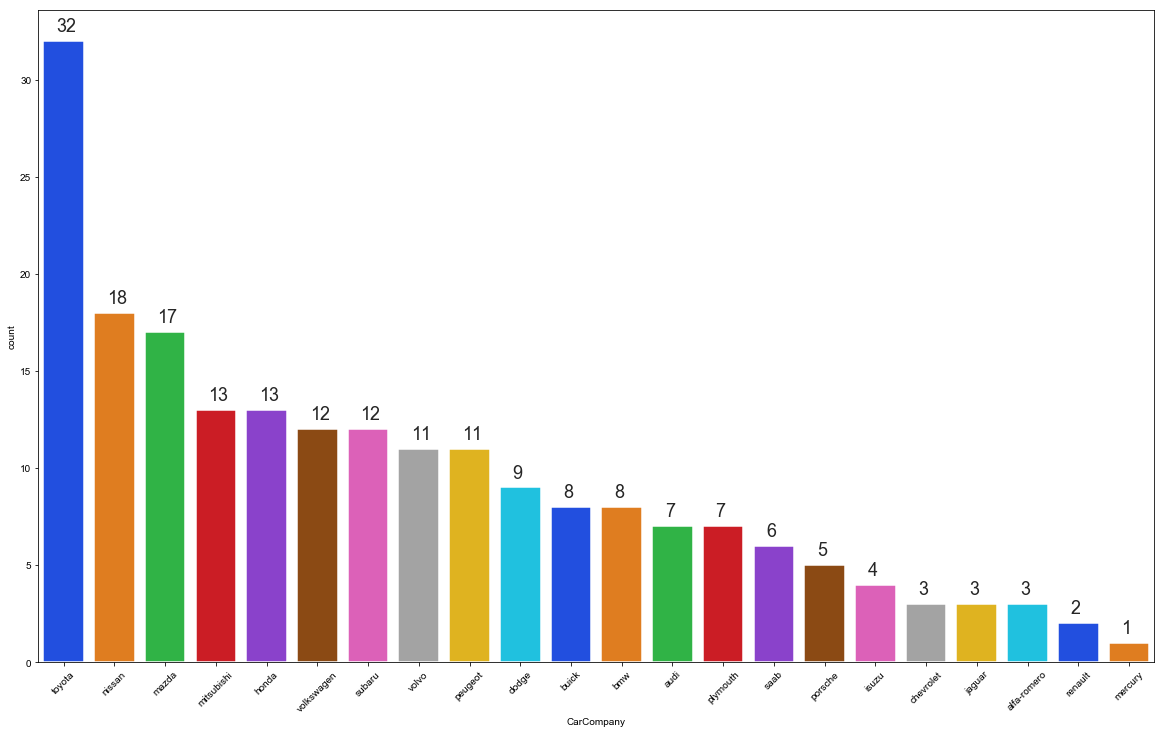

In [59]:
# count plot
fig, ax = plt.subplots(figsize = [20,12])
sns.set(style='whitegrid')
sns.set_context("talk")
sns_chart = sns.countplot(df_car.CarCompany, order=df_car.CarCompany.value_counts().index, palette='bright')
sns_chart.set_xticklabels(ax.get_xticklabels(), rotation=45)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.25, height+0.5, '%.0f'%(height))
    
plt.show()

**Fact**: **toyota** is the top selling car brand in US followed by **nissan, mazda**

In [60]:
df_car.fueltype.describe()  #getting fueltype information

count     205
unique    2  
top       gas
freq      185
Name: fueltype, dtype: object

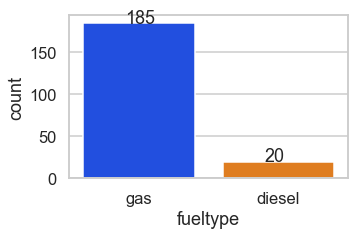

In [61]:
#2 fueltype
# count plot
fig, ax = plt.subplots(figsize = [5,3])
sns.set(style='whitegrid')
sns.set_context("talk")
sns.countplot(df_car.fueltype, order=df_car.fueltype.value_counts().index, palette='bright')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.3, height+0.5, '%.0f'%(height))

**Fact**: In US, mostly **gas** cars are in use.

In [62]:
#3 aspiration
# describe the aspiration
df_car.aspiration.describe()  

count     205
unique    2  
top       std
freq      168
Name: aspiration, dtype: object

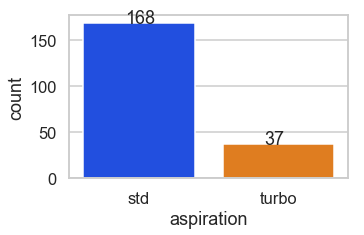

In [63]:
# count plot
fig, ax = plt.subplots(figsize = [5,3])
sns.set(style='whitegrid')
sns.set_context("talk")
sns.countplot(df_car.aspiration, order=df_car.aspiration.value_counts().index, palette='bright')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.3, height+0.5, '%.0f'%(height))

Fact: In US, most cars are **naturally(std)** aspirated.<br>
    A naturally aspirated engine is an internal combustion engine in which the air intake relies solely on atmospheric pressure, which is the exact opposite of the force induction turbocharged engines use.<br>
    Reference:- https://www.autoinfluence.com/quick-look-difference-naturally-aspirated-turbocharged-engines/

In [64]:
#4 carbody
# describe the carbody
df_car.carbody.describe() 

count     205  
unique    5    
top       sedan
freq      96   
Name: carbody, dtype: object

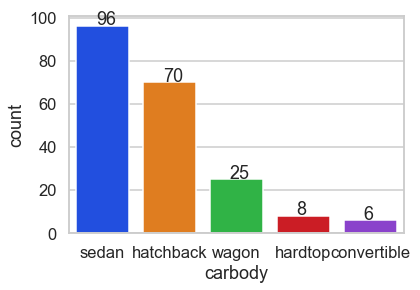

In [65]:
# count plot
fig, ax = plt.subplots(figsize = [6,4])
sns.set(style='whitegrid')
sns.set_context("talk")
sns.countplot(df_car.carbody, order=df_car.carbody.value_counts().index, palette='bright')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.3, height+0.5, '%.0f'%(height))

**Fact**: In US most selling car type  is **sedan** followed by **hatchback**

In [66]:
#5 drivewheel
# describe the drivewheel
df_car.drivewheel.describe() 

count     205
unique    3  
top       fwd
freq      120
Name: drivewheel, dtype: object

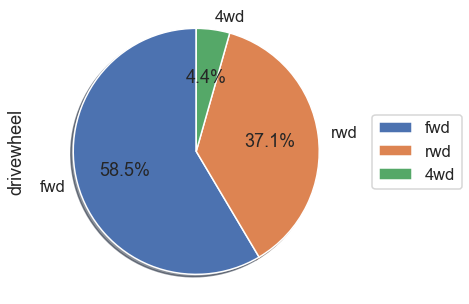

In [67]:
df_car.drivewheel.value_counts().plot(kind='pie',
                            figsize=(6, 5),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            legend=True                   
                           )
plt.axis('equal')
plt.legend(loc='center left',bbox_to_anchor=(1.0,0.5))
plt.show()

Fact: In US, most cars are **FRONT-WHEEL DRIVE**
    Reference:- https://www.digitaltrends.com/cars/fwd-vs-awd-vs-rwd/

In [68]:
#6 enginelocation
# describe the engineloaction
df_car.enginelocation.describe() 

count     205  
unique    2    
top       front
freq      202  
Name: enginelocation, dtype: object

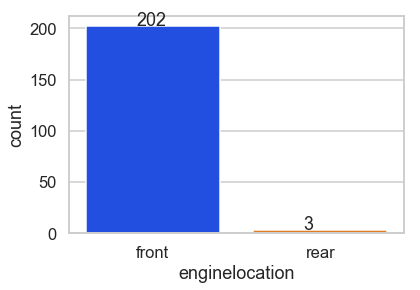

In [69]:
#5 enginelocation
# count plot
fig, ax = plt.subplots(figsize = [6,4])
sns.set(style='whitegrid')
sns.set_context("talk")
sns.countplot(df_car.enginelocation, order=df_car.enginelocation.value_counts().index, palette='bright')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.3, height+0.5, '%.0f'%(height))

**Fact**:- In US, most cars have engine is located in the **front**.

In [70]:
#7 enginetype
# describe the enginetype
df_car.enginetype.describe() 

count     205
unique    7  
top       ohc
freq      148
Name: enginetype, dtype: object

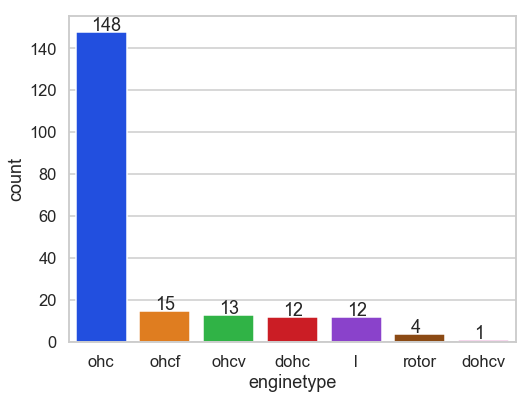

In [71]:
#7 enginetype
# count plot
fig, ax = plt.subplots(figsize = [8,6])
sns.set(style='whitegrid')
sns.set_context("talk")
sns.countplot(df_car.enginetype, order=df_car.enginetype.value_counts().index, palette='bright')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.25, height+0.5, '%.0f'%(height))

In [72]:
#8 fulesystem
# describe the fulesystem
df_car.fuelsystem.describe() 

count     205 
unique    8   
top       mpfi
freq      94  
Name: fuelsystem, dtype: object

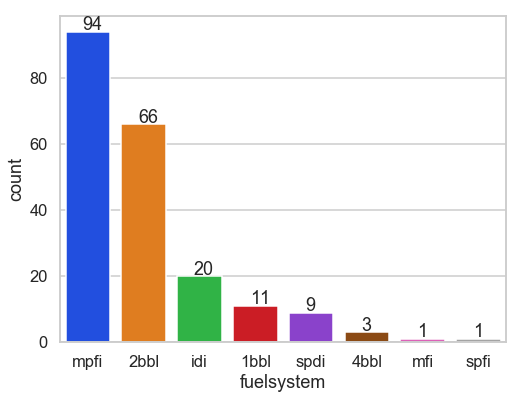

In [73]:
#8 fuelsystem
# count plot
fig, ax = plt.subplots(figsize = [8,6])
sns.set(style='whitegrid')
sns.set_context("talk")
sns.countplot(df_car.fuelsystem, order=df_car.fuelsystem.value_counts().index, palette='bright')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.3, height+0.5, '%.0f'%(height))

**Fact**:- Most used fuel systems are mpfi, 2bbl

<div >
<h4>#2 Numerical fields univariate analysis</h4>
    
</div>

In [74]:
# getting numerical columns
list(df_car.select_dtypes([np.int64, float]))

['symboling',
 'doornumber',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [75]:
#getting count
len(list(df_car.select_dtypes([np.int64, float])))

17

**Observation**:- There are 17 numerical variables. Let's explore one by one.

In [76]:
#1 price
df_car.price.describe()

count    205.000000  
mean     13276.710571
std      7988.852332 
min      5118.000000 
25%      7788.000000 
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

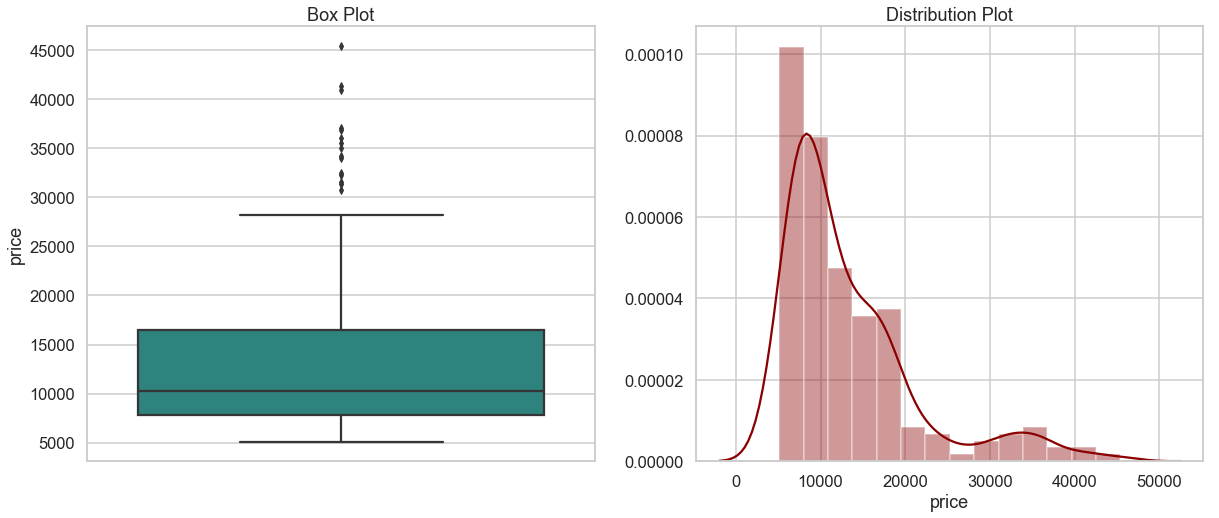

In [77]:
#1 price
plt.figure(1,figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Box Plot")
sns.boxplot(y = df_car['price'], palette = 'viridis')
plt.subplot(1,2,2)
plt.title("Distribution Plot")
sns.distplot(df_car['price'], color='darkred')
# plt.subplot(1,3,3)
#sns.swarmplot(df_car['loan_amnt'])
plt.show()

**Fact**:- Mostly, car price ranges from 7000 to 17000 USD and data has some outliers too.

In [78]:
#2 highwaympg
df_car.highwaympg.describe()

count    205.000000
mean     30.751220 
std      6.886443  
min      16.000000 
25%      25.000000 
50%      30.000000 
75%      34.000000 
max      54.000000 
Name: highwaympg, dtype: float64

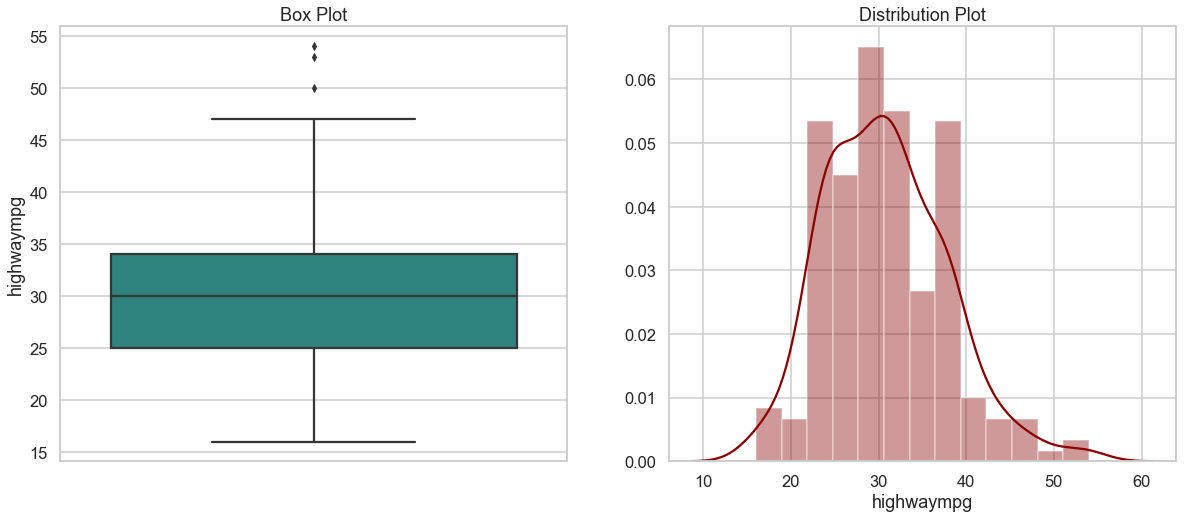

In [79]:
plt.figure(1,figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Box Plot")
sns.boxplot(y = df_car['highwaympg'], palette = 'viridis')
plt.subplot(1,2,2)
plt.title("Distribution Plot")
sns.distplot(df_car['highwaympg'], color='darkred')
# plt.subplot(1,3,3)
#sns.swarmplot(df_car['loan_amnt'])
plt.show()

**Fact**:-Car mileage ranges from 25-34 on highway and the distribution looks normal

In [80]:
#creating function for numerical univariate analysis which will draw a histogram and a boxplot
def numeric_univariate_hist_box(columnname):
    plt.figure(1,figsize=(20,8))
    plt.subplot(1,2,1)
    plt.title("Box Plot")
    sns.boxplot(y = df_car[columnname], palette = 'viridis')
    plt.subplot(1,2,2)
    plt.title("Distribution Plot")
    sns.distplot(df_car[columnname], color='darkred')
    plt.show()

In [81]:
#3 'citympg'
df_car.citympg.describe()

count    205.000000
mean     25.219512 
std      6.542142  
min      13.000000 
25%      19.000000 
50%      24.000000 
75%      30.000000 
max      49.000000 
Name: citympg, dtype: float64

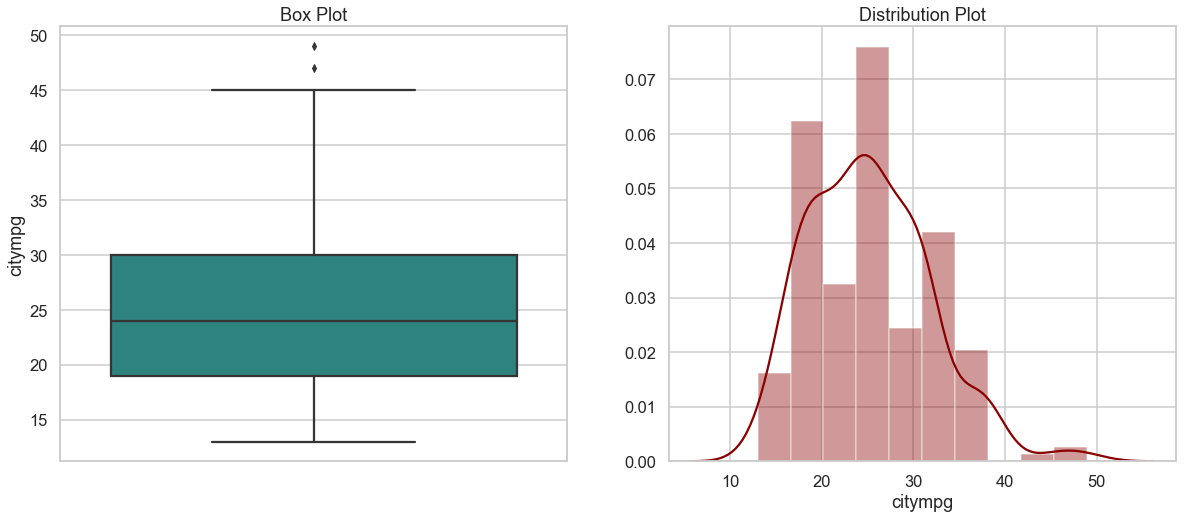

In [82]:
numeric_univariate_hist_box('citympg')

**Fact**:- City Car mileage ranges from 18-30 which is less than mileage on highway

In [83]:
#4 'peakrpm'
df_car.peakrpm.describe()

count    205.000000 
mean     5125.121951
std      476.985643 
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peakrpm, dtype: float64

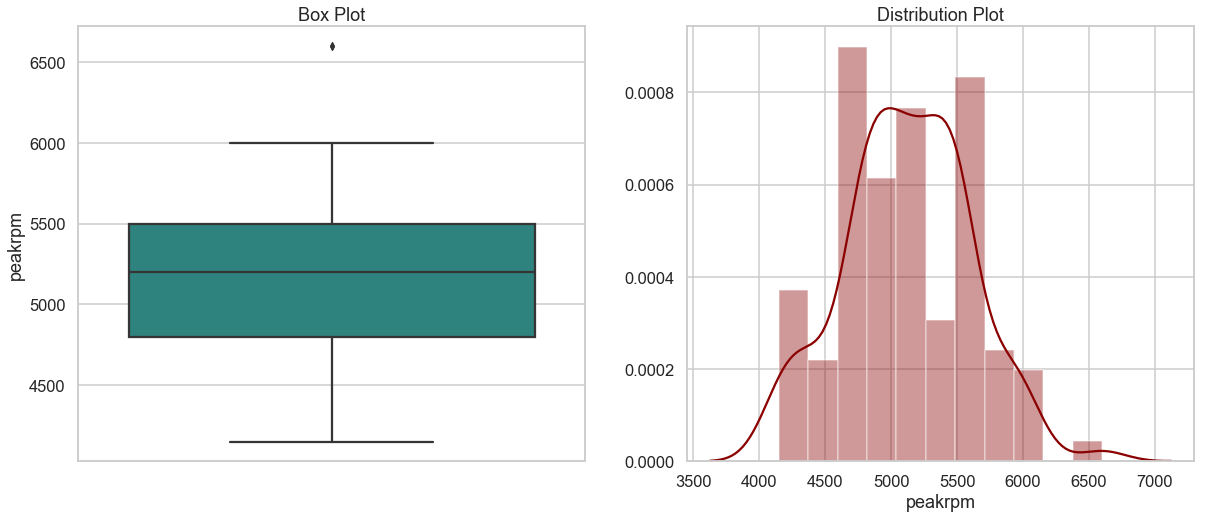

In [84]:

numeric_univariate_hist_box('peakrpm')

**Fact**:- Most cars have rpm in range of 4700 to 5500

In [85]:
#5 'horsepower'
df_car.horsepower.describe()

count    205.000000
mean     104.117073
std      39.544167 
min      48.000000 
25%      70.000000 
50%      95.000000 
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

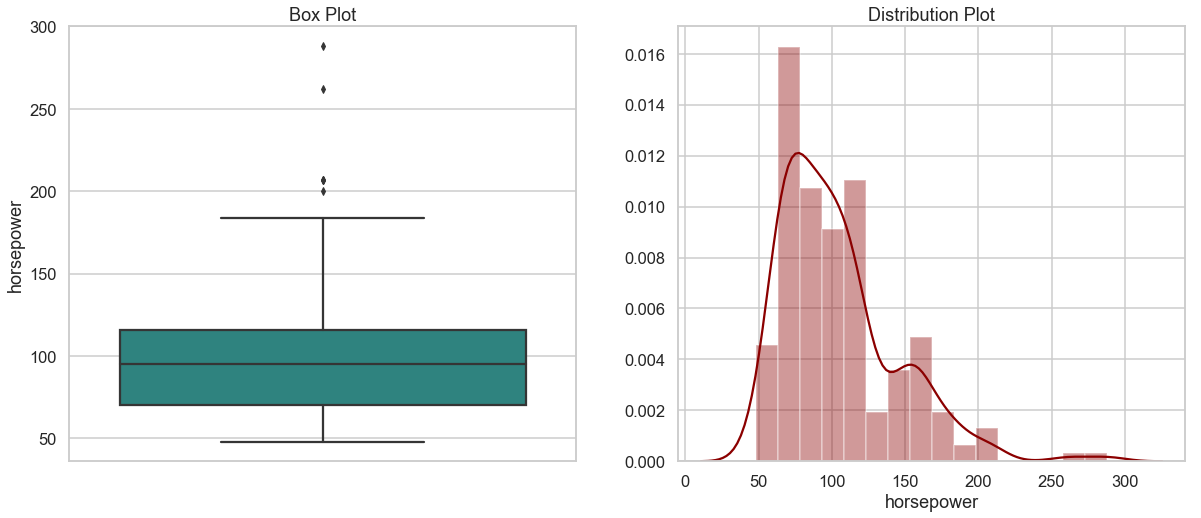

In [86]:

numeric_univariate_hist_box('horsepower')

**Observation** :- Average horsepower is 105. It seems that there are few outliers too.

In [87]:
#6 'compressionratio'
df_car.compressionratio.describe()

count    205.000000
mean     10.142537 
std      3.972040  
min      7.000000  
25%      8.600000  
50%      9.000000  
75%      9.400000  
max      23.000000 
Name: compressionratio, dtype: float64

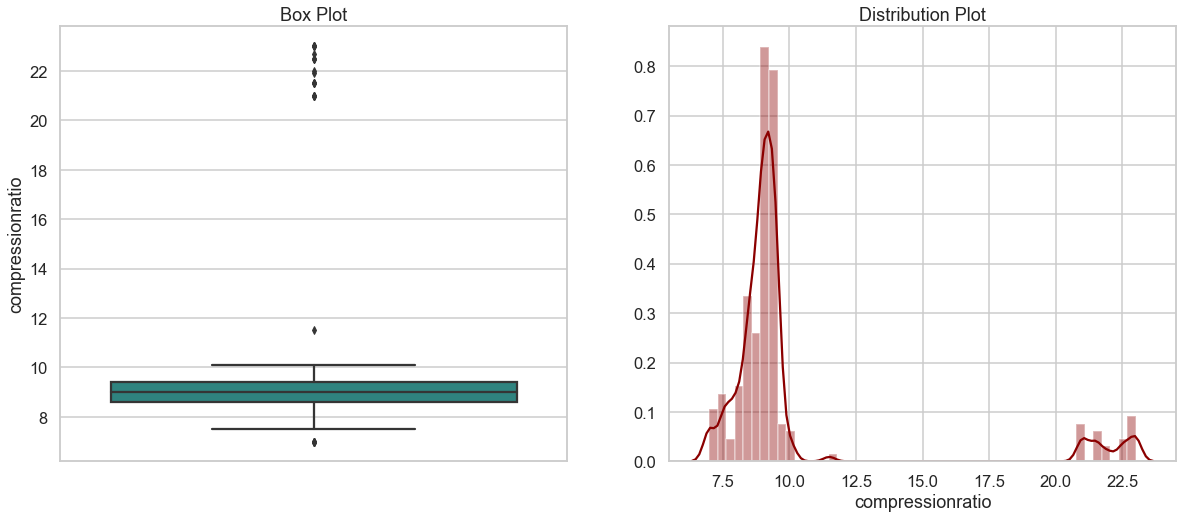

In [88]:

numeric_univariate_hist_box('compressionratio')

**Observation** :- compressionratio lies mostly b/w 8 and 10 but there are many outliers too.

In [89]:
#7 'stroke'
df_car.stroke.describe()

count    205.000000
mean     3.255415  
std      0.313597  
min      2.070000  
25%      3.110000  
50%      3.290000  
75%      3.410000  
max      4.170000  
Name: stroke, dtype: float64

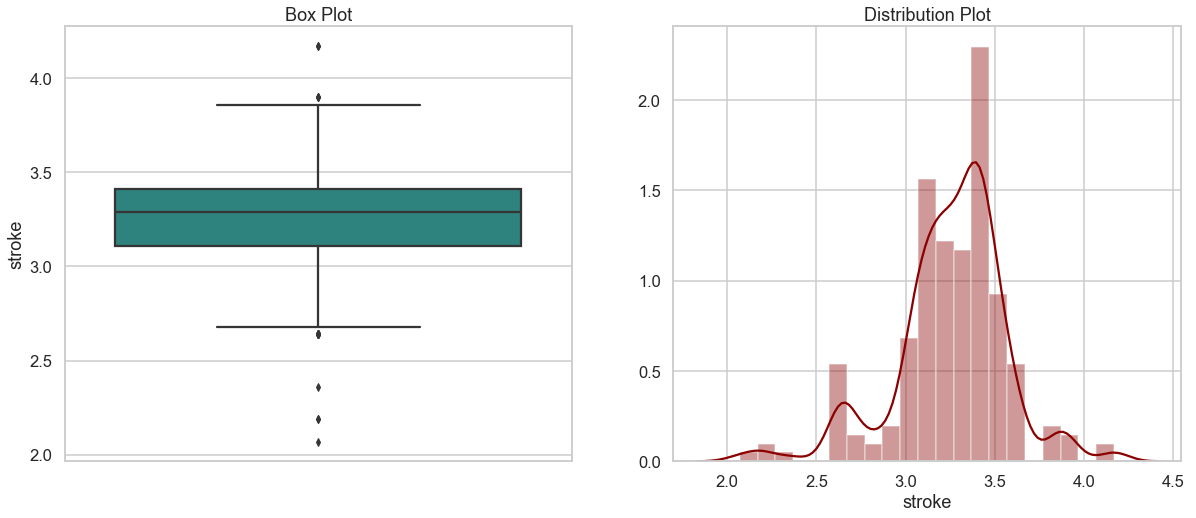

In [90]:

numeric_univariate_hist_box('stroke')

**Observation**:- Data is normally distributed. Most data lie within 3-4 stroke

In [91]:
#8 'boreratio'
df_car.boreratio.describe()

count    205.000000
mean     3.329756  
std      0.270844  
min      2.540000  
25%      3.150000  
50%      3.310000  
75%      3.580000  
max      3.940000  
Name: boreratio, dtype: float64

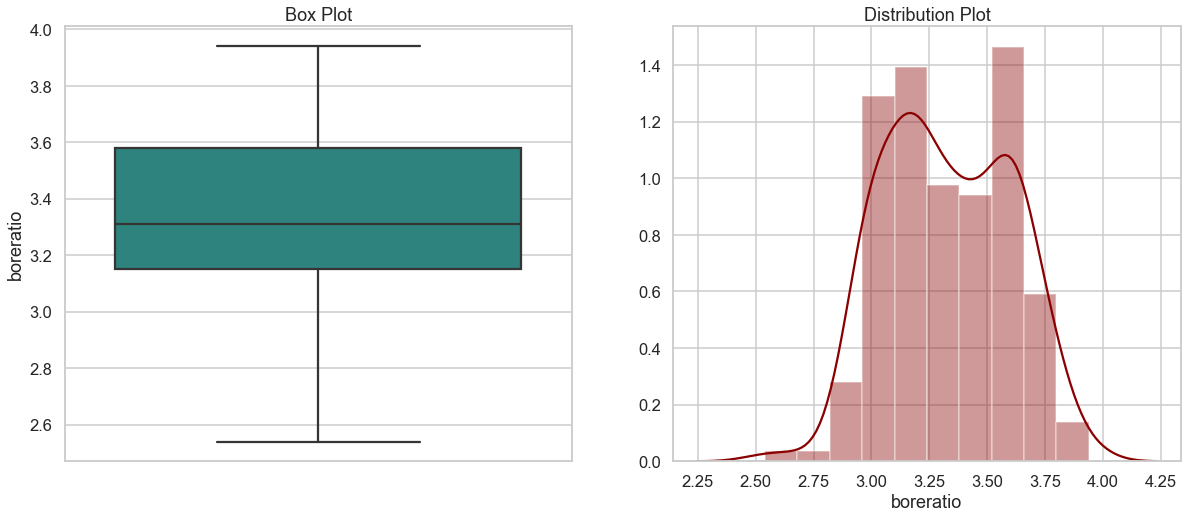

In [92]:
numeric_univariate_hist_box('boreratio')

**Observation**:- Data is normally distributed. Most data lie within 3-4 boreratio

In [93]:
#9 'enginesize'
df_car.enginesize.describe()

count    205.000000
mean     126.907317
std      41.642693 
min      61.000000 
25%      97.000000 
50%      120.000000
75%      141.000000
max      326.000000
Name: enginesize, dtype: float64

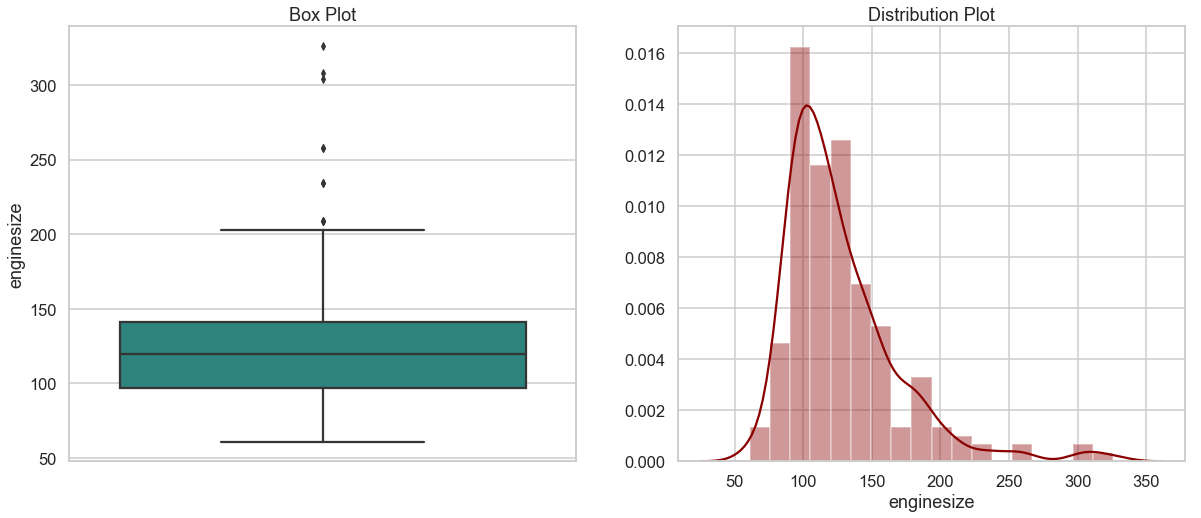

In [94]:

numeric_univariate_hist_box('enginesize')

In [95]:
#10 'cylindernumber'
df_car.cylindernumber.describe()

count    205.000000
mean     4.380488  
std      1.080854  
min      2.000000  
25%      4.000000  
50%      4.000000  
75%      4.000000  
max      12.000000 
Name: cylindernumber, dtype: float64

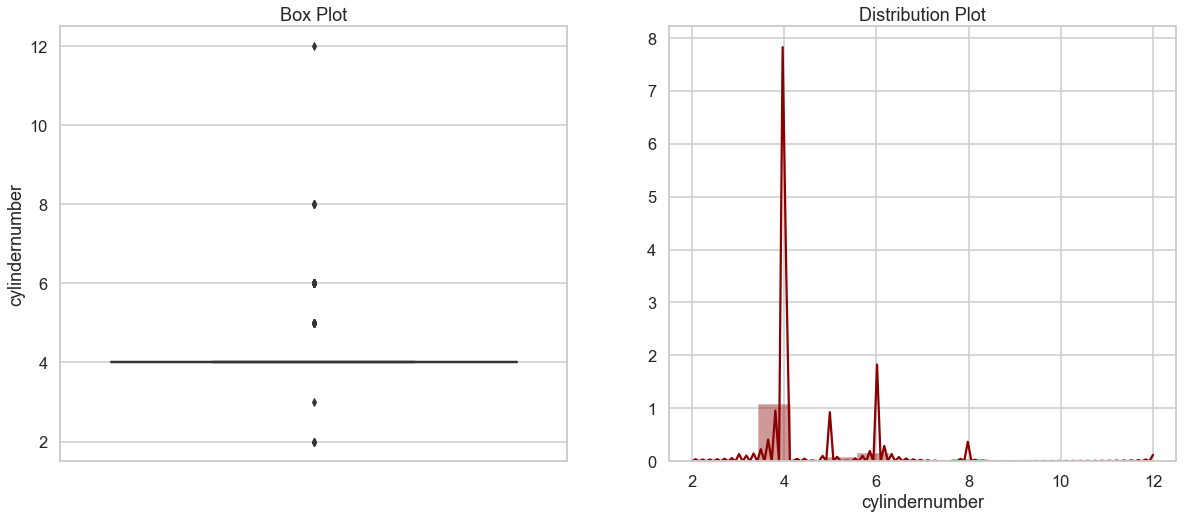

In [96]:

numeric_univariate_hist_box('cylindernumber')

**Observation** Most cars are have 4 cylinders with few outliers(12)

In [97]:
#11 'curbweight'
df_car.curbweight.describe()

count    205.000000 
mean     2555.565854
std      520.680204 
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curbweight, dtype: float64

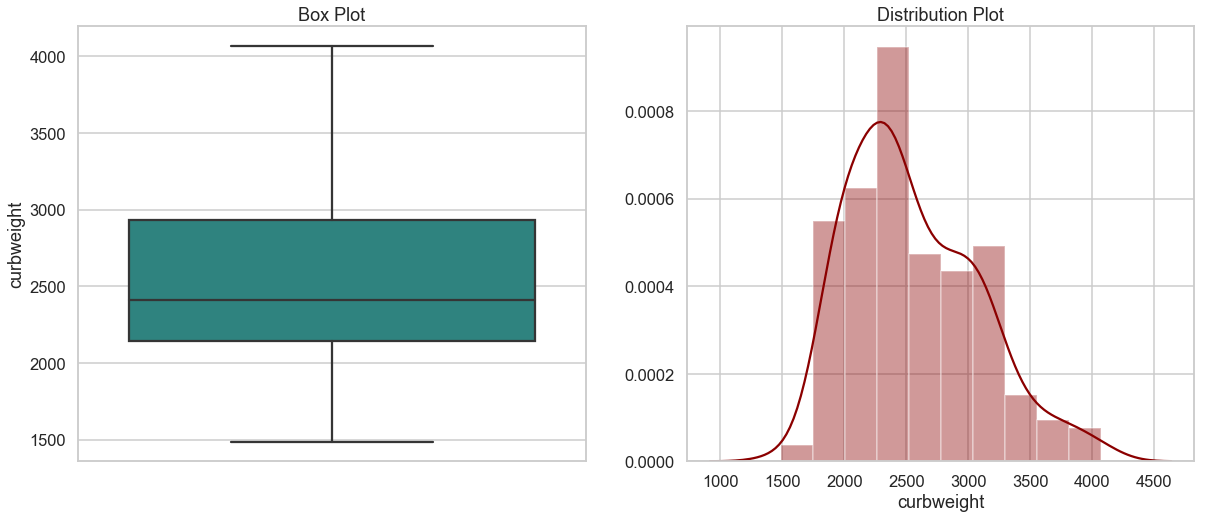

In [98]:

numeric_univariate_hist_box('curbweight')

**Observation**:- curbweight is normally distributed. Average weight is 2555

In [99]:
#12 'carheight'
df_car.carheight.describe()

count    205.000000
mean     53.724878 
std      2.443522  
min      47.800000 
25%      52.000000 
50%      54.100000 
75%      55.500000 
max      59.800000 
Name: carheight, dtype: float64

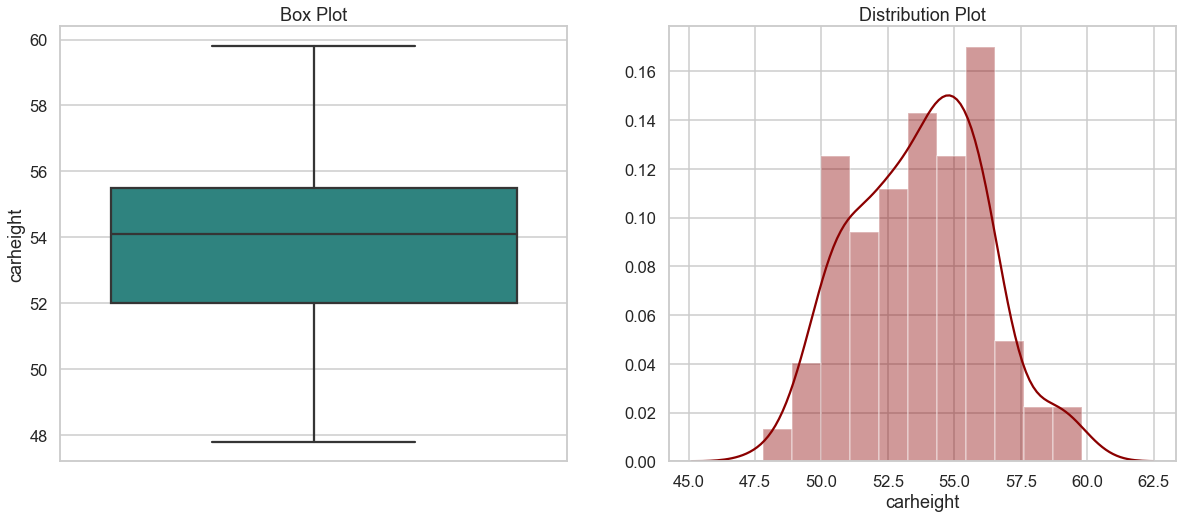

In [100]:

numeric_univariate_hist_box('carheight')

**Fact**:- Car height is uniformly distributed. Avg car height is 53.72

In [101]:
#13 'carwidth'
df_car.carwidth.describe()

count    205.000000
mean     65.907805 
std      2.145204  
min      60.300000 
25%      64.100000 
50%      65.500000 
75%      66.900000 
max      72.300000 
Name: carwidth, dtype: float64

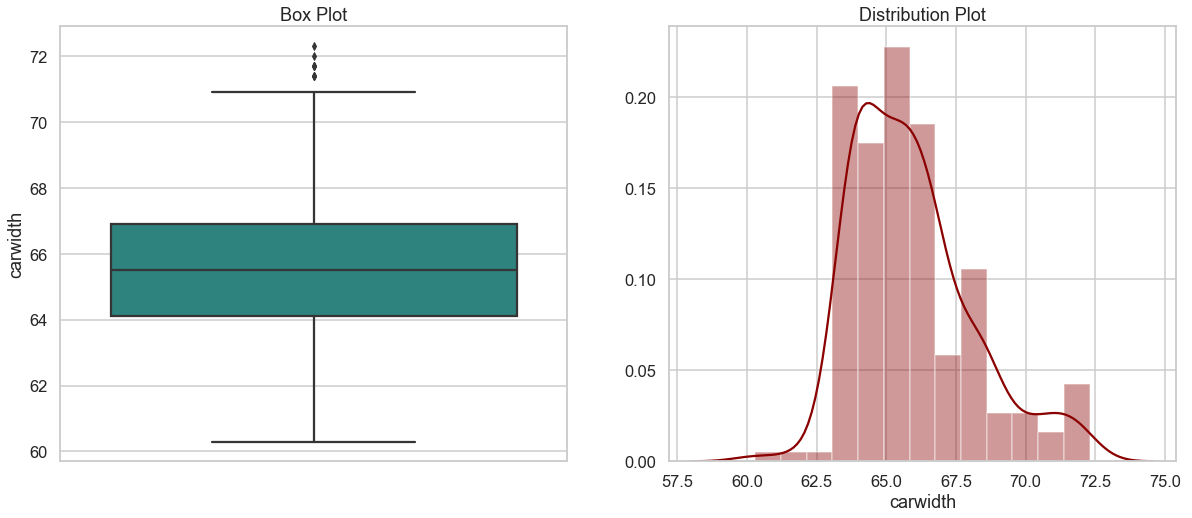

In [102]:

numeric_univariate_hist_box('carwidth')

**Observation**:- Average car width is 66 and is also normally distributed 

In [103]:
#14 'carlength'
df_car.carlength.describe()

count    205.000000
mean     174.049268
std      12.337289 
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: carlength, dtype: float64

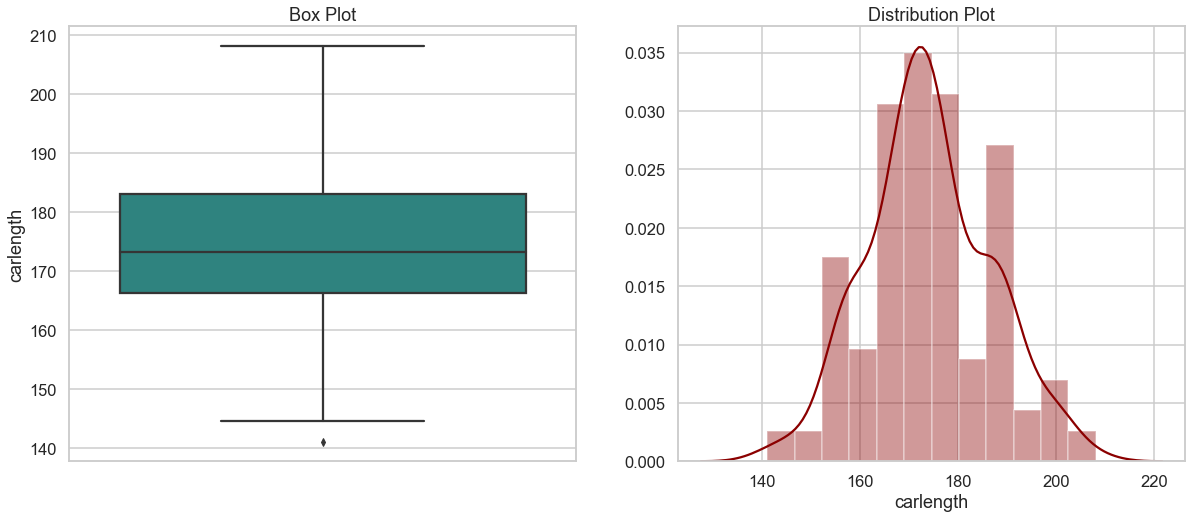

In [104]:

numeric_univariate_hist_box('carlength')

In [105]:
#15 'wheelbase'
df_car.wheelbase.describe()

count    205.000000
mean     98.756585 
std      6.021776  
min      86.600000 
25%      94.500000 
50%      97.000000 
75%      102.400000
max      120.900000
Name: wheelbase, dtype: float64

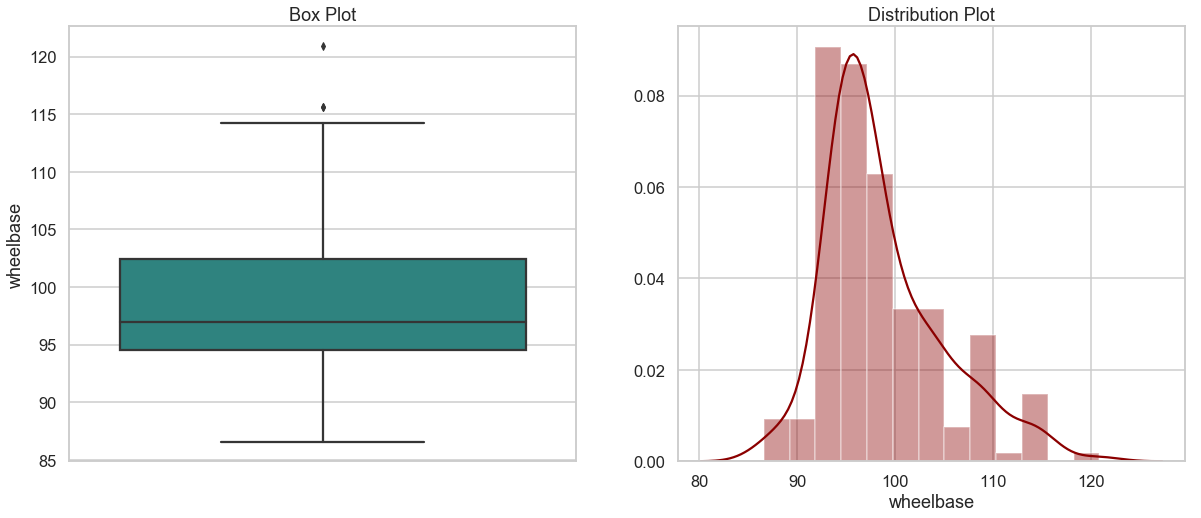

In [106]:

numeric_univariate_hist_box('wheelbase')

**Observation**:- Data is normally distribured. Most wheelbase lies between 92 to 103

In [107]:
#16 'doornumber'
df_car.doornumber.describe()

count    205.000000
mean     3.121951  
std      0.994966  
min      2.000000  
25%      2.000000  
50%      4.000000  
75%      4.000000  
max      4.000000  
Name: doornumber, dtype: float64

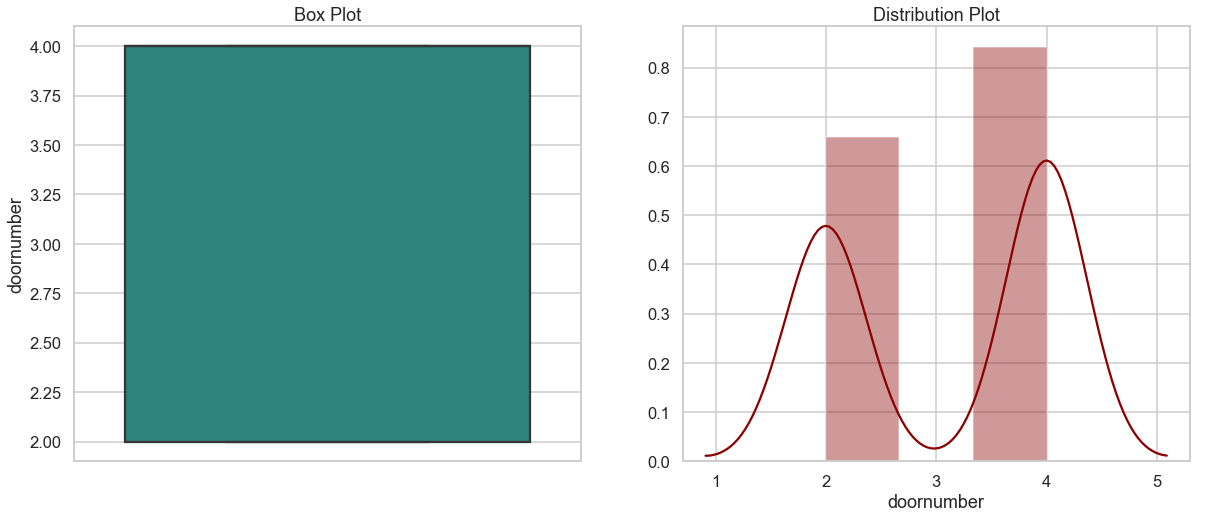

In [108]:

numeric_univariate_hist_box('doornumber')

**Facts**:-  only 2 and 4 doors cars are available

In [109]:
#17 'symboling'
df_car.symboling.describe()

count    205.000000
mean     0.834146  
std      1.245307  
min     -2.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      3.000000  
Name: symboling, dtype: float64

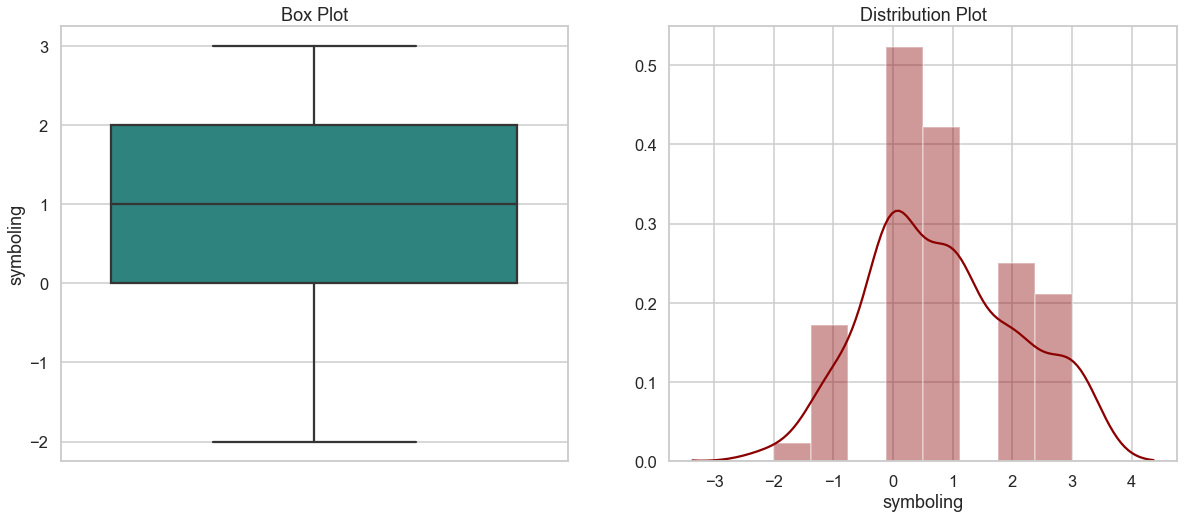

In [110]:
numeric_univariate_hist_box('symboling')

**Facts**:- Most  cars have symboling between 0 and 2

In [111]:
# Dependent variable further analysis
df_car['price'].describe()

count    205.000000  
mean     13276.710571
std      7988.852332 
min      5118.000000 
25%      7788.000000 
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

(array([83., 45., 35., 18.,  6.,  3.,  5.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <a list of 10 Patch objects>)

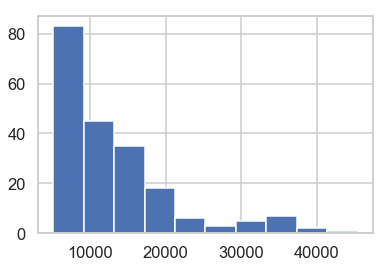

In [112]:
plt.hist(df_car.price)

**Observation**:- As per data and histogram, data is positively skewed. 75% of prices lie within ~16.5k. Only 25% cars have price within 16.5 and 45.5k.
There are outliers, Max value is much higher than mean.<br>One of the most popularly used technique is the Percentile based outlier removal, where we filter out outliers based on **fixed percentile** values. The other techniques in this category include removal of records based on **z-score, constant values** etc.<br>
Reference:- https://kite.com/blog/python/data-analysis-visualization-python

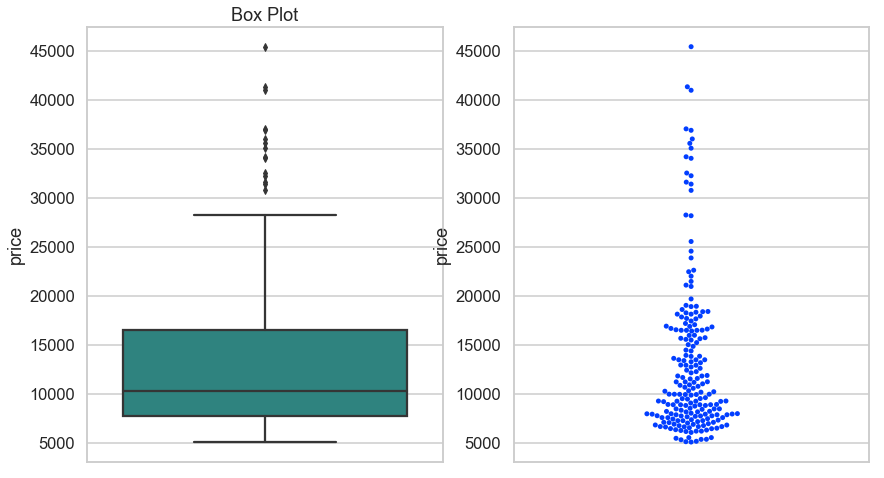

In [113]:
plt.figure(1,figsize=(14,8))
plt.subplot(1,2,1)
plt.title("Box Plot")
sns.boxplot(y = df_car['price'], palette = 'viridis')
plt.subplot(1,2,2)
sns.swarmplot(y = df_car['price'], palette = 'bright')

<div >
<h2>Bivariate Analysis</h2>
    
</div>

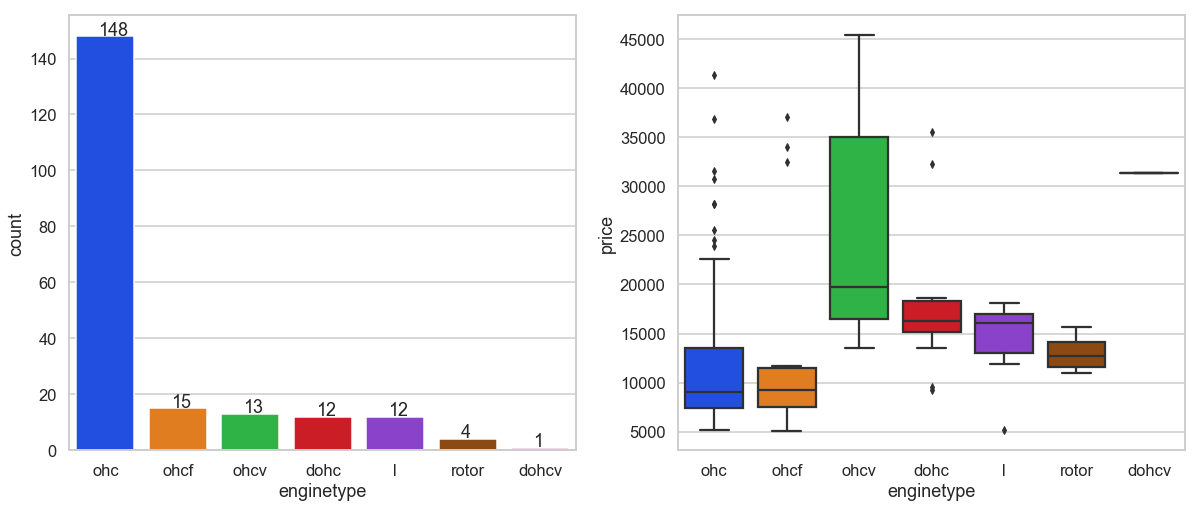

In [114]:
#1 enginetype, price
fig, ax = plt.subplots(figsize = [20,8])
ax1 = plt.subplot(1,2,1)
sns.countplot(df_car['enginetype'], palette='bright'
              ,order=df_car.enginetype.value_counts().index)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+0.3, height+0.5, '%.0f'%(height))
plt.subplot(1,2,2)
sns.boxplot(x = df_car.enginetype,y = df_car['price'], palette='bright', order=df_car.enginetype.value_counts().index)
plt.show()

**Observations**:-  Most cars are cheaper as **'ohc'** enginetype cars are mostly available and the price range is low for the same(7000 - 13000).<br>
 Car with engine type- **'ohcv'** has highest price range.

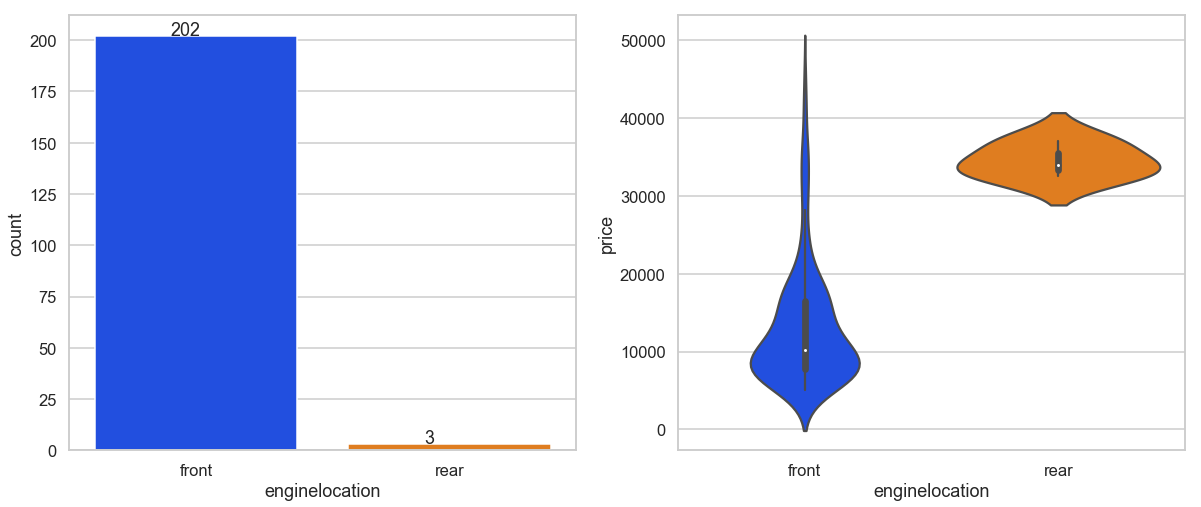

In [115]:
#2 enginelocation, price
fig, ax = plt.subplots(figsize = [20,8])
ax1 = plt.subplot(1,2,1)
sns.countplot(df_car['enginelocation'], palette='bright'
              ,order=df_car.enginelocation.value_counts().index)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+0.3, height+0.5, '%.0f'%(height))
plt.subplot(1,2,2)
sns.violinplot(x = df_car.enginelocation,y = df_car['price'], palette='bright')
plt.show()

**Observations**:-  front engine cars are most popular and are cheaper than rear engine cars. Also the price range varies a lot for frontengine location cars.
 Rearengine cars have fixed price range with almost no variation.

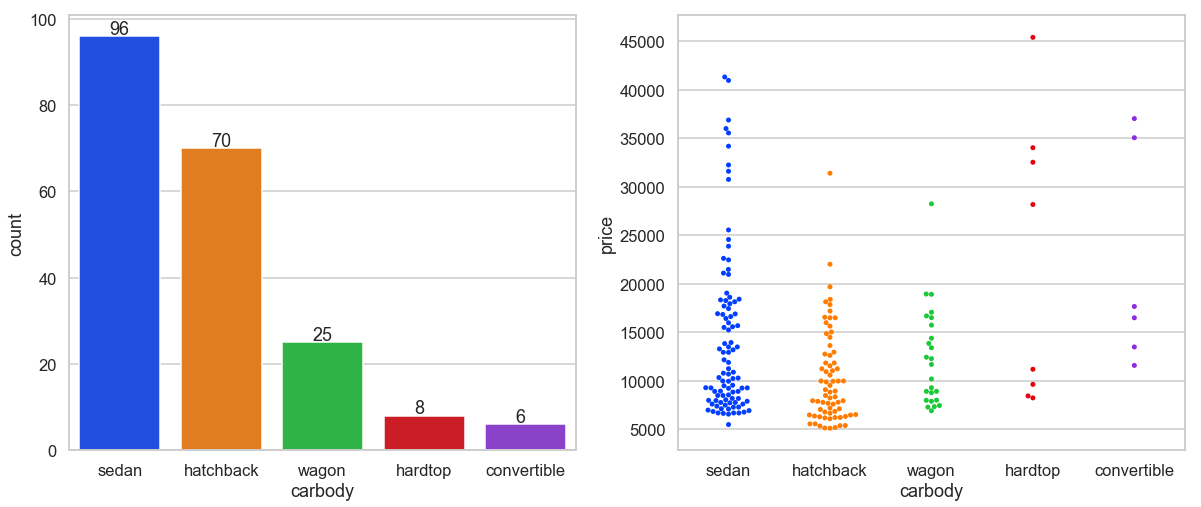

In [116]:
#3 carbody, price
fig, ax = plt.subplots(figsize = [20,8])
ax1 = plt.subplot(1,2,1)
sns.countplot(df_car['carbody'], palette='bright'
              ,order=df_car.carbody.value_counts().index)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+0.3, height+0.5, '%.0f'%(height))
plt.subplot(1,2,2)
sns.swarmplot(x = df_car.carbody,y = df_car['price'], palette='bright'
            ,order=df_car.carbody.value_counts().index)
plt.show()

**Observations**: sedan and hatchbacks are mostly sold and comes in lower price range with some outliers.<br>
 hardtop and convertible are of higher price range with more outliers

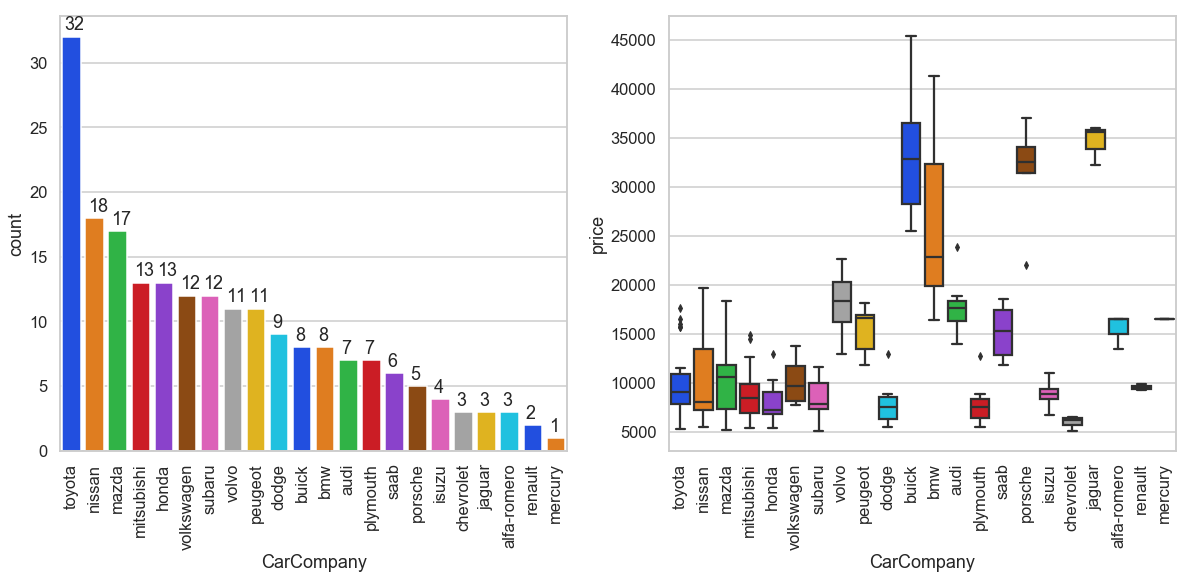

In [117]:
#4 CarCompany, price
fig, ax = plt.subplots(figsize = [20,8])
ax1 = plt.subplot(1,2,1)
g = sns.countplot(df_car['CarCompany'], palette='bright'
              ,order=df_car.CarCompany.value_counts().index,)
g.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+0.1, height+0.5, '%.0f'%(height))
ax2 = plt.subplot(1,2,2)
g = sns.boxplot(x = df_car.CarCompany,y = df_car['price'], palette='bright'
            ,order=df_car.CarCompany.value_counts().index)
g.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.show()

**Observations**:- jaguar, bubick and porshce are among the highest price value cars. Most selling car Totyota has low price range. Chevrolet cars are cheapest

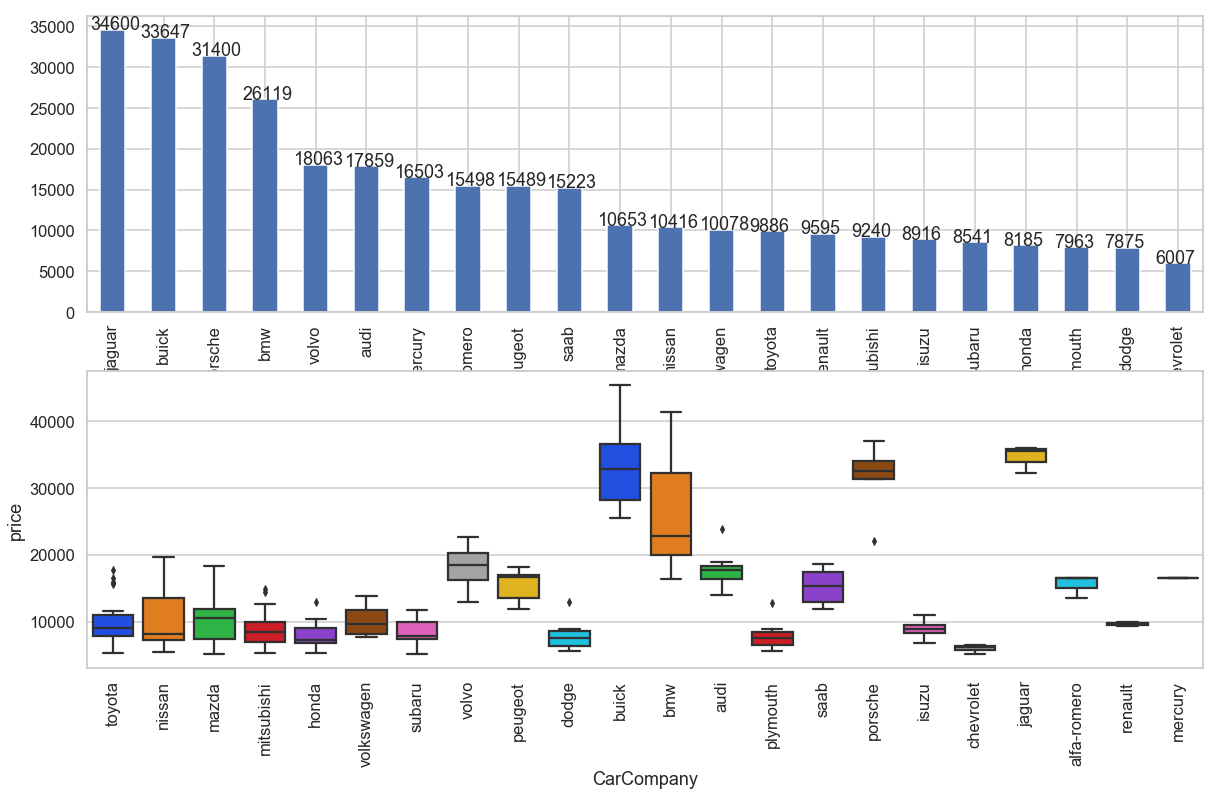

In [118]:
# checking the average car price value
# CarCompany, price
fig, ax = plt.subplots(figsize = [20,12])
ax1 = plt.subplot(2,1,1)
y=df_car.groupby(by=df_car['CarCompany'])['price'].mean().sort_values(ascending = False)
y.plot.bar()

g.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()-0.2, height+0.5, '%.0f'%(height))
    
ax2 = plt.subplot(2,1,2)
g = sns.boxplot(x = df_car.CarCompany,y = df_car['price'], palette='bright'
            ,order=df_car.CarCompany.value_counts().index)
g.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.show()

**Observations**:-  jaguar, bubick and porsche also have the highest average price

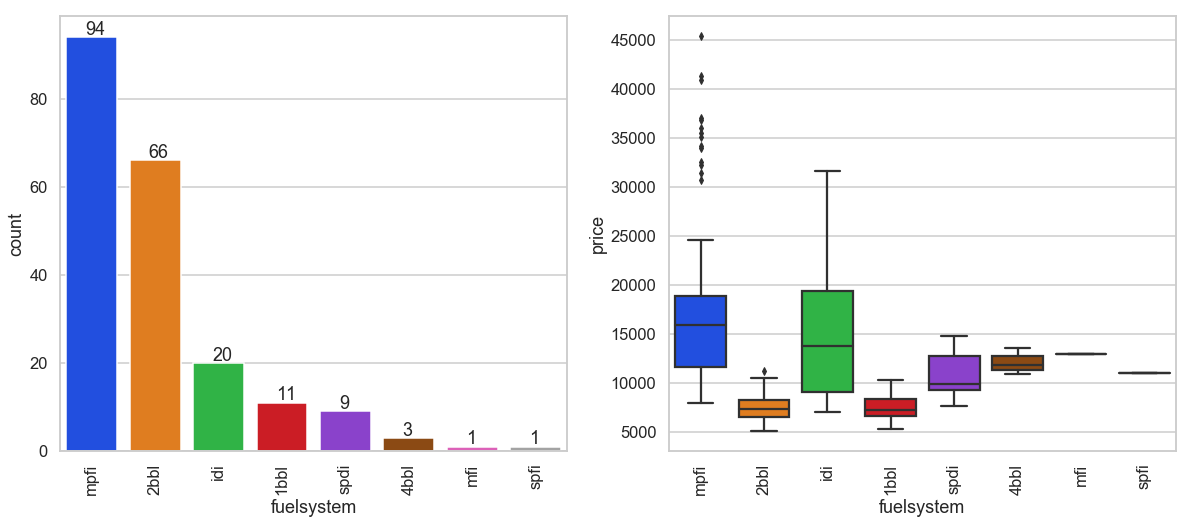

In [119]:
#5 fulesystem, price
fig, ax = plt.subplots(figsize = [20,8])
ax1 = plt.subplot(1,2,1)
g = sns.countplot(df_car['fuelsystem'], palette='bright'
              ,order=df_car.fuelsystem.value_counts().index,)
g.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+0.3, height+0.5, '%.0f'%(height))
ax2 = plt.subplot(1,2,2)
g = sns.boxplot(x = df_car.fuelsystem,y = df_car['price'], palette='bright'
            ,order=df_car.fuelsystem.value_counts().index)
g.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.show()

**Observations**:- Most cars have mpfi and 2bbl fuel systems. 2bbl and 1bbl fuel system cars are cheapest

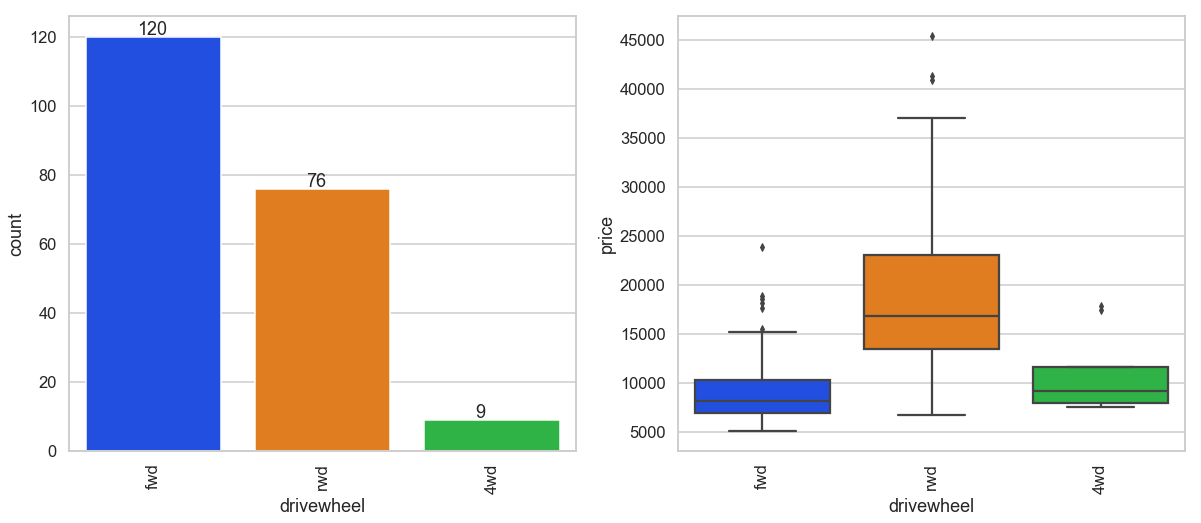

In [120]:
#6 drivewheel, price
fig, ax = plt.subplots(figsize = [20,8])
ax1 = plt.subplot(1,2,1)
g = sns.countplot(df_car['drivewheel'], palette='bright'
              ,order=df_car.drivewheel.value_counts().index,)
g.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+0.3, height+0.5, '%.0f'%(height))
ax2 = plt.subplot(1,2,2)
g = sns.boxplot(x = df_car.drivewheel,y = df_car['price'], palette='bright'
            ,order=df_car.drivewheel.value_counts().index)
g.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.show()

**Observations**:- Most cars have forward drivewheel and those are cheaper too

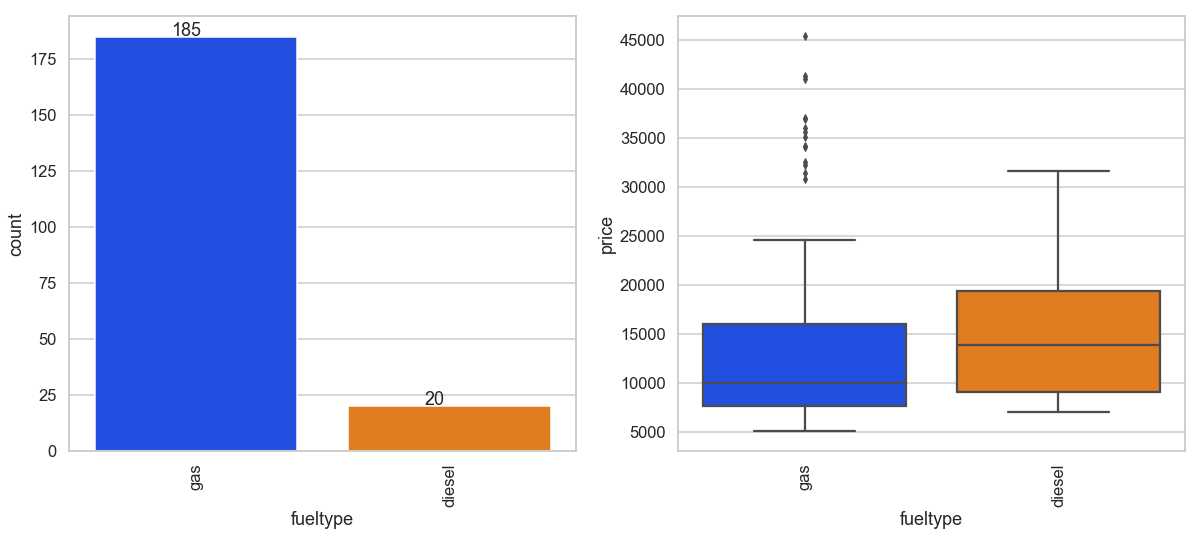

In [121]:
#7 fueltype, price
fig, ax = plt.subplots(figsize = [20,8])
ax1 = plt.subplot(1,2,1)
g = sns.countplot(df_car['fueltype'], palette='bright'
              ,order=df_car.fueltype.value_counts().index,)
g.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+0.3, height+0.5, '%.0f'%(height))
ax2 = plt.subplot(1,2,2)
g = sns.boxplot(x = df_car.fueltype,y = df_car['price'], palette='bright'
            ,order=df_car.fueltype.value_counts().index)
g.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.show()

**Observations**:- Most cars have gas fuletype. Diesel care are relatively costlier than gas cars

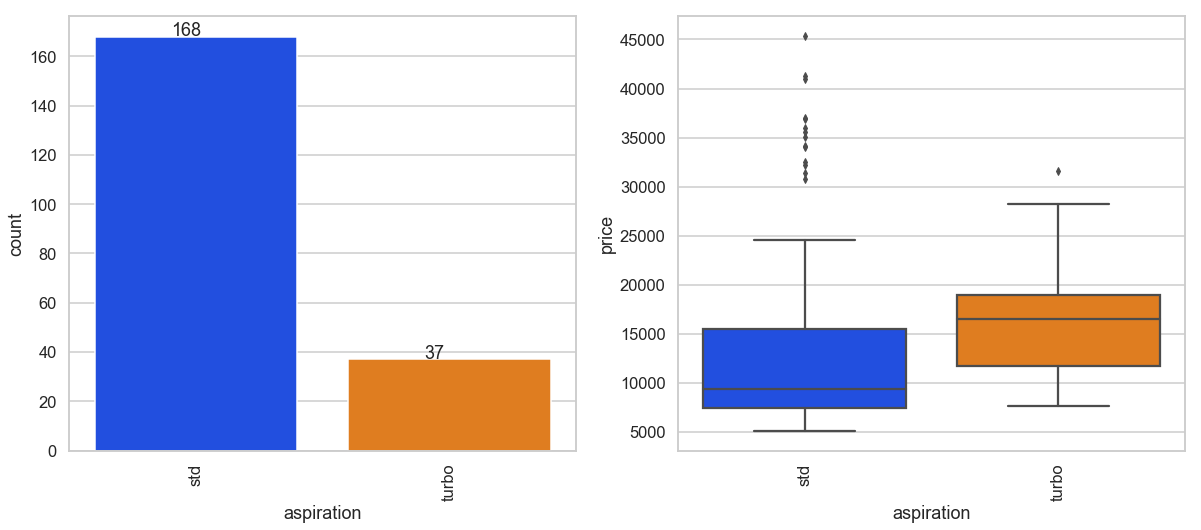

In [122]:
#8 aspiration, price
fig, ax = plt.subplots(figsize = [20,8])
ax1 = plt.subplot(1,2,1)
g = sns.countplot(df_car['aspiration'], palette='bright'
              ,order=df_car.aspiration.value_counts().index,)
g.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+0.3, height+0.5, '%.0f'%(height))
ax2 = plt.subplot(1,2,2)
g = sns.boxplot(x = df_car.aspiration,y = df_car['price'], palette='bright'
            ,order=df_car.aspiration.value_counts().index)
g.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.show()

**Observations**:- standard aspiration cars are mostly used and are relatively cheaper than turbo aspiration cars

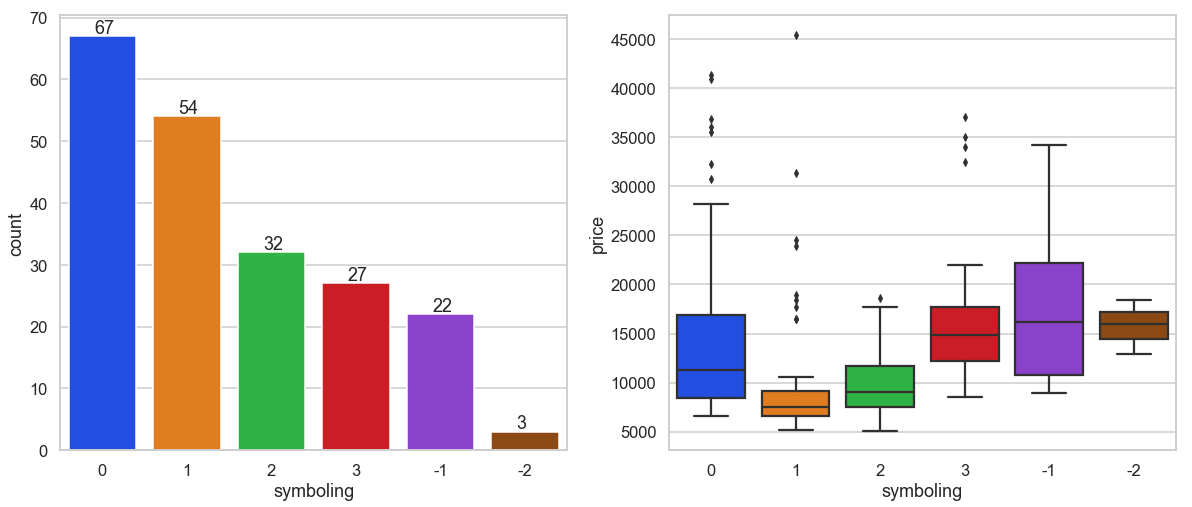

In [123]:
#numerical columns with price
#9 symboling, price
fig, ax = plt.subplots(figsize = [20,8])
ax1 = plt.subplot(1,2,1)
sns.countplot(df_car['symboling'], palette='bright'
              ,order=df_car.symboling.value_counts().index)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+0.3, height+0.5, '%.0f'%(height))
plt.subplot(1,2,2)
sns.boxplot(x = df_car.symboling,y = df_car['price'], palette='bright'
            ,order=df_car.symboling.value_counts().index)
plt.show()

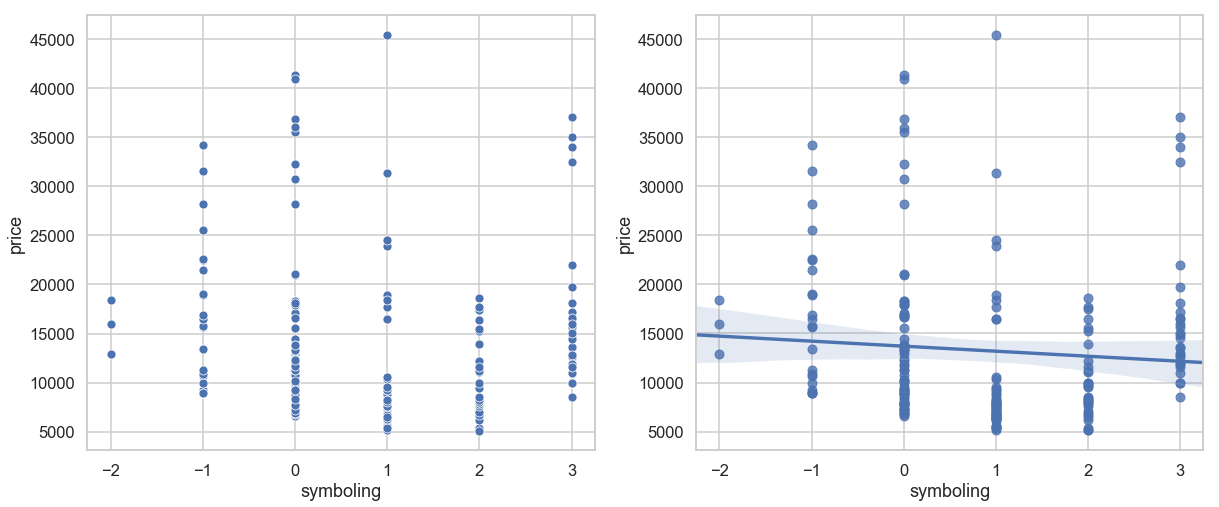

In [124]:
#scatter and regression plot
plt.subplots(figsize = [20,8])
plt.subplot(1,2,1)
sns.scatterplot(x=df_car.symboling, y=df_car.price)
plt.subplot(1,2,2)
sns.regplot
sns.regplot(x=df_car.symboling, y=df_car.price, data=df_car)

**Observations**:- Most cars with symboling value as 0 or 1, low insurance risk (more negative value of symboling) 
 comes with slightly higher car price.<br>
 Also, from scatter plot, it seems that there is no correlation between price and symboling

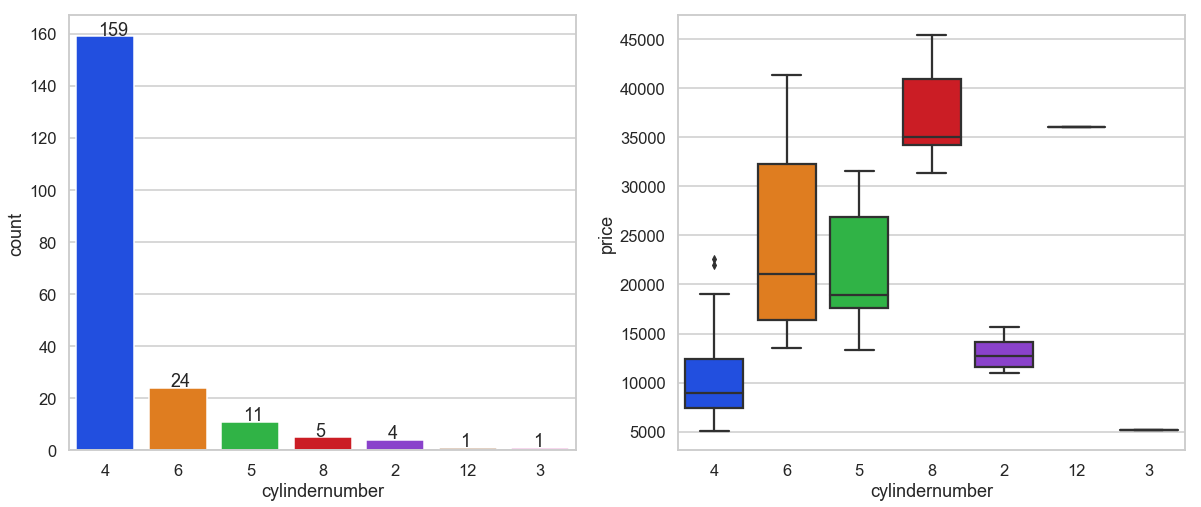

In [125]:
#11 cylindernumber, price
fig, ax = plt.subplots(figsize = [20,8])
ax1 = plt.subplot(1,2,1)
sns.countplot(df_car['cylindernumber'], palette='bright'
              ,order=df_car.cylindernumber.value_counts().index)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+0.3, height+0.5, '%.0f'%(height))
plt.subplot(1,2,2)
sns.boxplot(x = df_car.cylindernumber,y = df_car['price'], palette='bright'
            ,order=df_car.cylindernumber.value_counts().index)
plt.show()

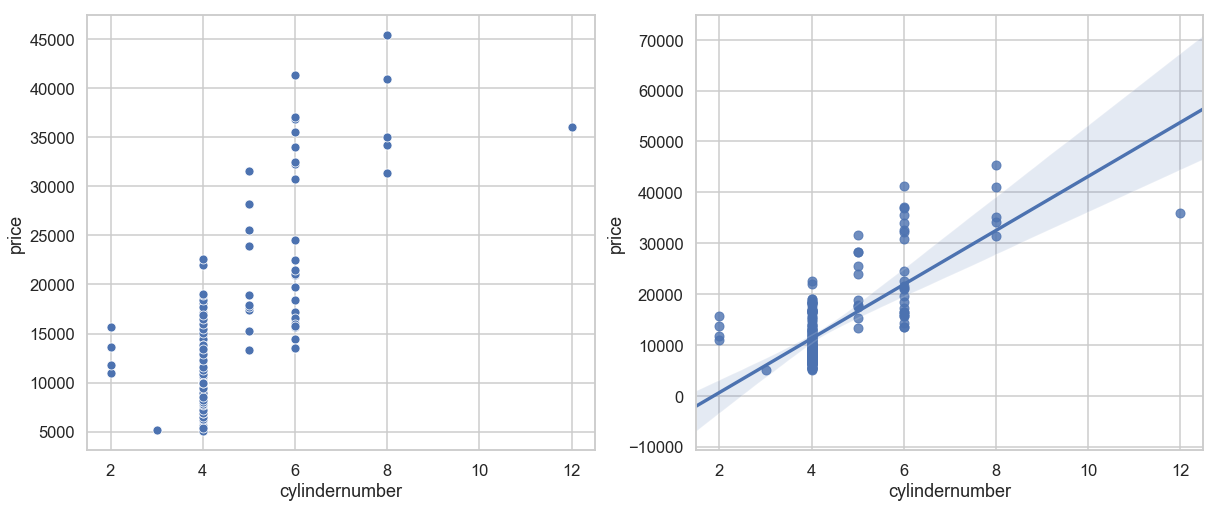

In [126]:
#scatter and regression plot
plt.subplots(figsize = [20,8])
plt.subplot(1,2,1)
sns.scatterplot(x=df_car.cylindernumber, y=df_car.price)
plt.subplot(1,2,2)
sns.regplot
sns.regplot(x=df_car.cylindernumber, y=df_car.price, data=df_car)

**Facts**:- 4 cylinder cars are mostly sold and are the cheapest ones. 8 cylinder cars are most expensive.<br>
    Also, as per scatter plot, it seems to have some good positive correlation between price and cylindernumber

In [127]:
#creating function for plotting count bar plot and box plot with price
def plotWithPrice(x_axis):
    fig, ax = plt.subplots(figsize = [20,8])
    ax1 = plt.subplot(1,2,1)
    g = sns.countplot(df_car[x_axis], palette='bright'
                  ,order=df_car[x_axis].value_counts().index)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+0.3, height+0.5, '%.0f'%(height))
    g.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
    ax2 = plt.subplot(1,2,2)
    g = sns.boxplot(x = df_car[x_axis],y = df_car['price'], palette='bright'
                ,order=df_car[x_axis].value_counts().index)
    g.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
    plt.show()

In [128]:
# function for regression plot
def regressionPlot(x,fig):
    plt.subplot(2,2,fig)
    sns.regplot(x=df_car[x],y=df_car['price'])
    plt.title(x+' Vs price')
    plt.xlabel(x)
    plt.ylabel('price')

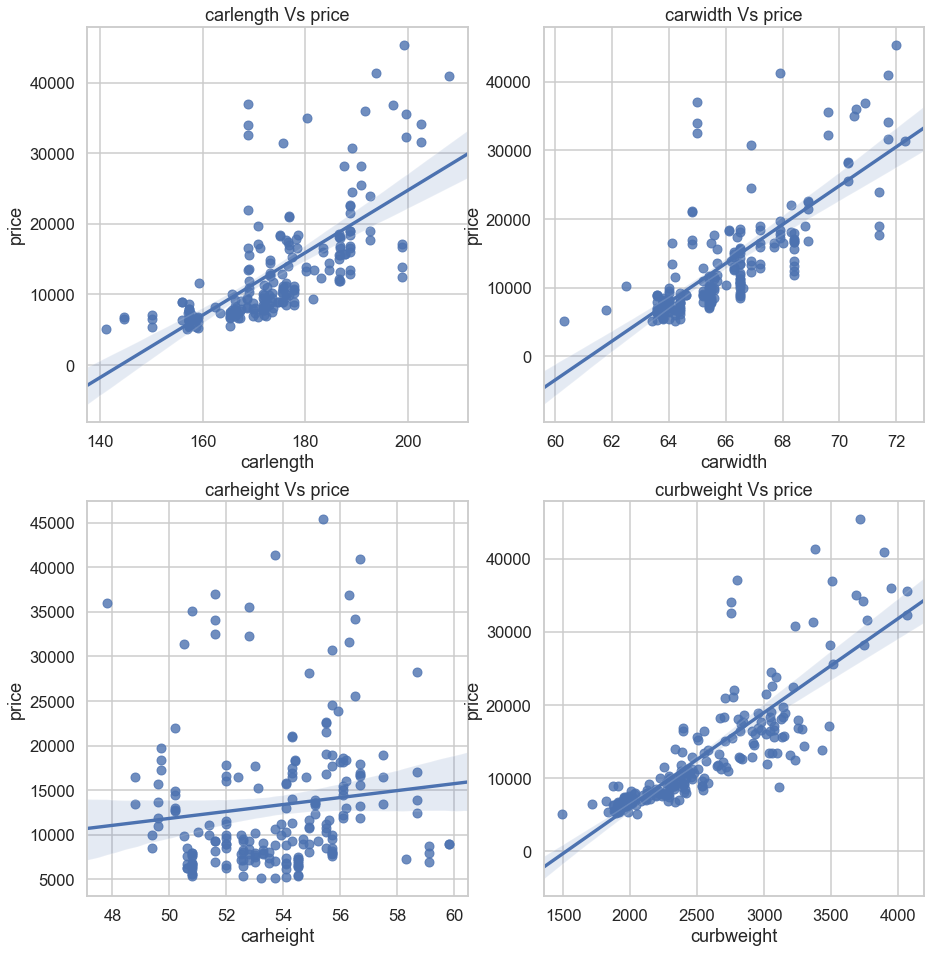

In [129]:
plt.figure(figsize=(15,16))
regressionPlot('carlength', 1)
regressionPlot('carwidth', 2)
regressionPlot('carheight', 3)
regressionPlot('curbweight', 4)

**Observation** :- carheight is not much related to carprice. Carlength, Carwidth and Curbweight has positive correlation with price.

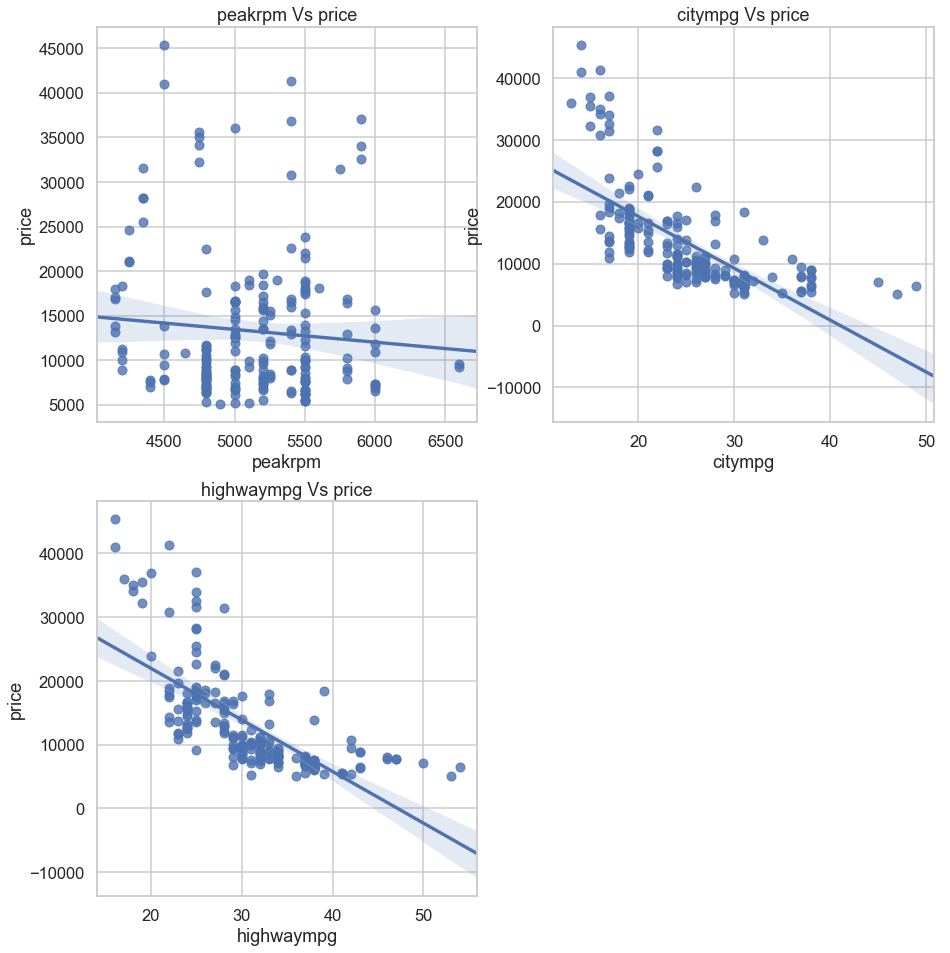

In [130]:
#12 peakrpm, city mileage per gallon, highway mileage
plt.figure(figsize=(15,16))
regressionPlot('peakrpm', 1)
regressionPlot('citympg', 2)
regressionPlot('highwaympg', 3)


**Observations**:-  peakrpm is not significant to price. <br> - city mileage (citympg) and highway mileage (highwaympg) show some negative correlation with price. Higher price range cars have lower mileage and is negatively correlated with price.

In [131]:
# 13 enginesize
df_car.enginesize.nunique()              # 44 unique type of engine sizes

44

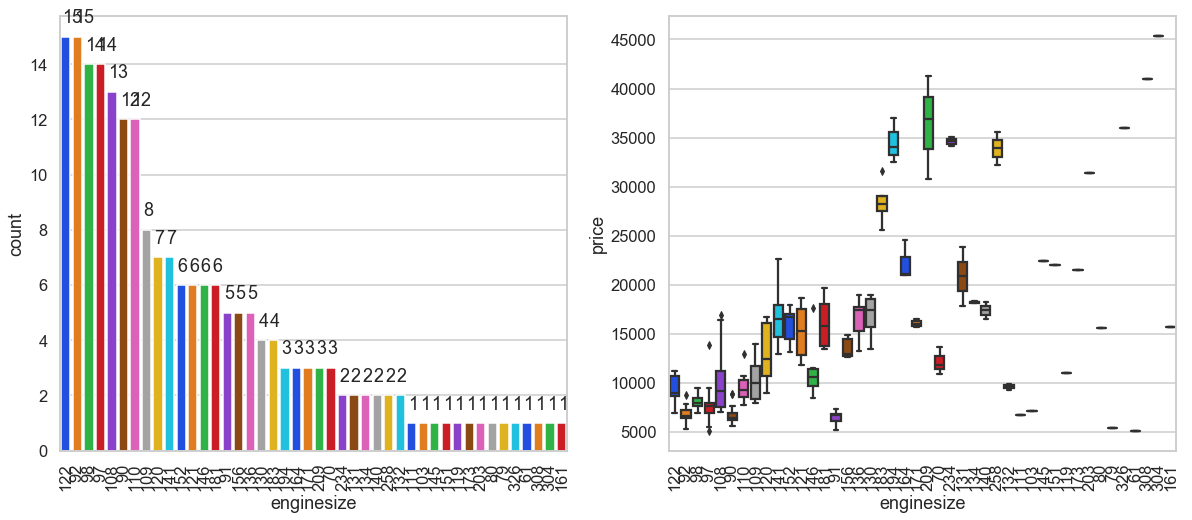

In [132]:
# bar plot and box plot with respect to price
fig, ax = plt.subplots(figsize = [20,8])
ax1 = plt.subplot(1,2,1)
g = sns.countplot(df_car['enginesize'], palette='bright'
              ,order=df_car.enginesize.value_counts().index)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+0.1, height+0.5, '%.0f'%(height))
g.set_xticklabels(ax1.get_xticklabels(), rotation = 90)
ax2 = plt.subplot(1,2,2)
g = sns.boxplot(x = df_car.enginesize,y = df_car['price'], palette='bright'
            ,order=df_car.enginesize.value_counts().index)
g.set_xticklabels(ax2.get_xticklabels(), rotation = 90)
plt.show()

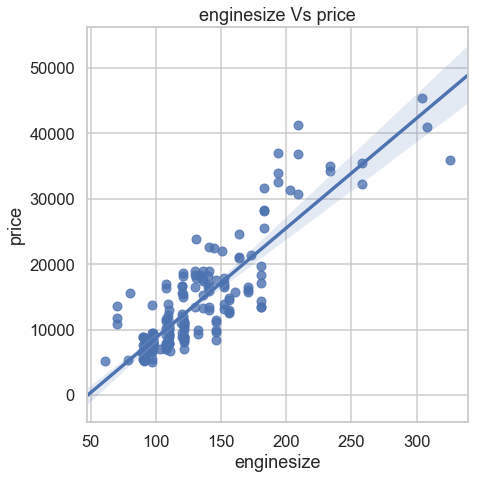

In [133]:
# reg plot
plt.figure(figsize=(15,16))
regressionPlot('enginesize', 1)

**Observations**:- Enginesize is showing positive correlation with price

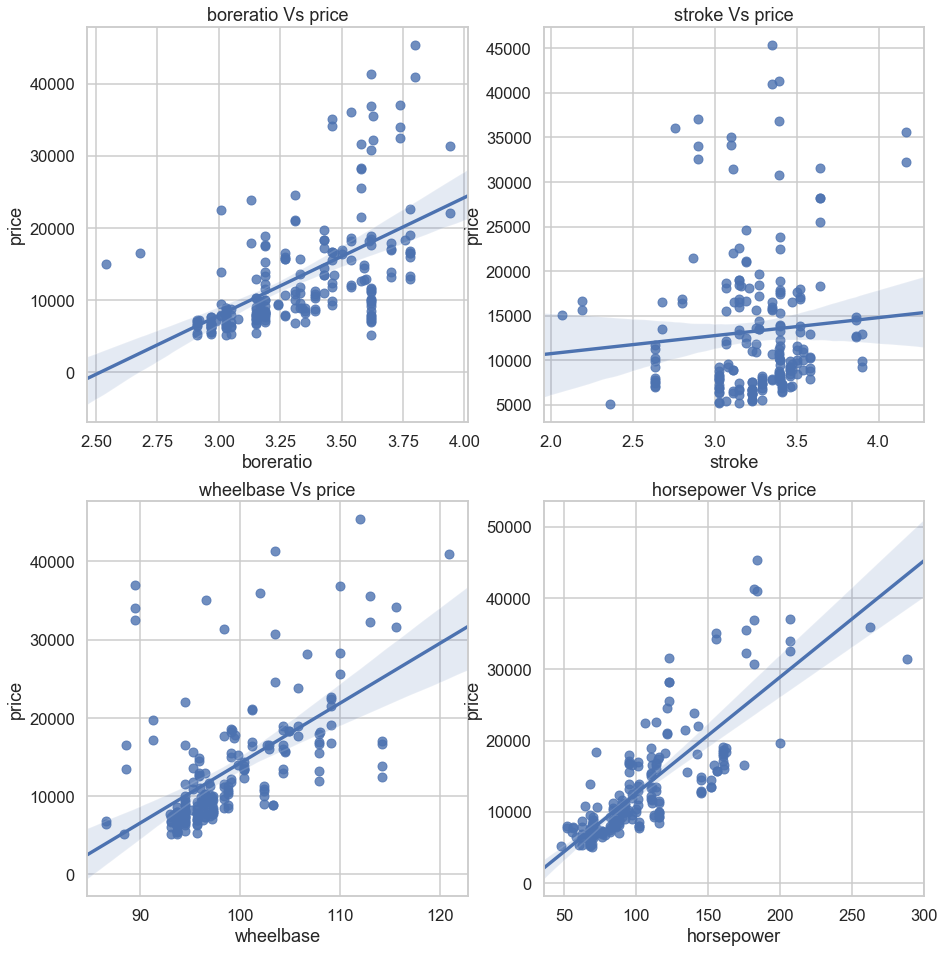

In [134]:
# 14 boreratio, stroke, wheelbase and horsepower
plt.figure(figsize=(15,16))
regressionPlot('boreratio', 1)
regressionPlot('stroke', 2)
regressionPlot('wheelbase', 3)
regressionPlot('horsepower', 4)

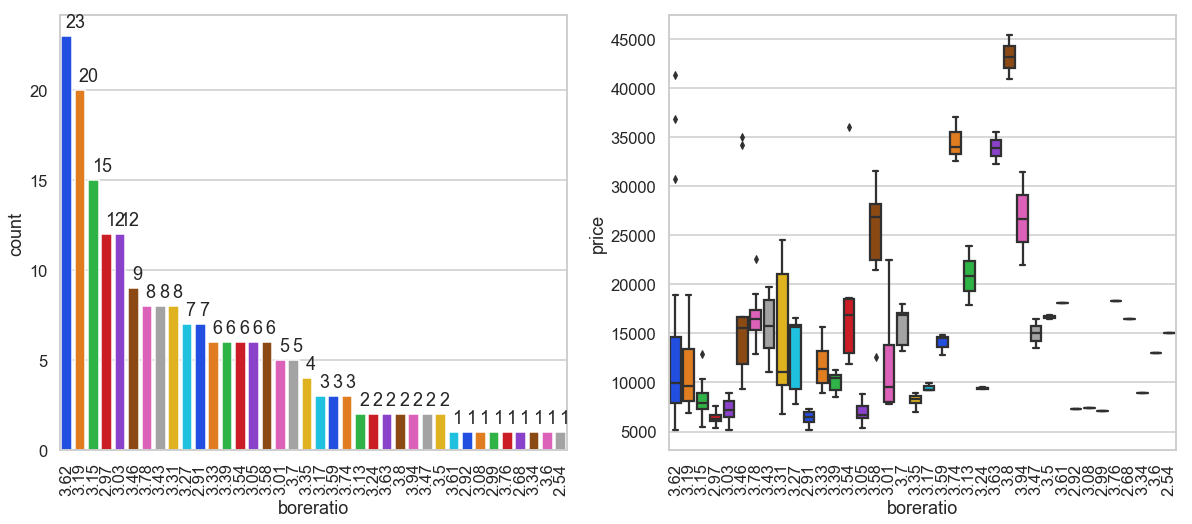

In [135]:
plotWithPrice('boreratio')

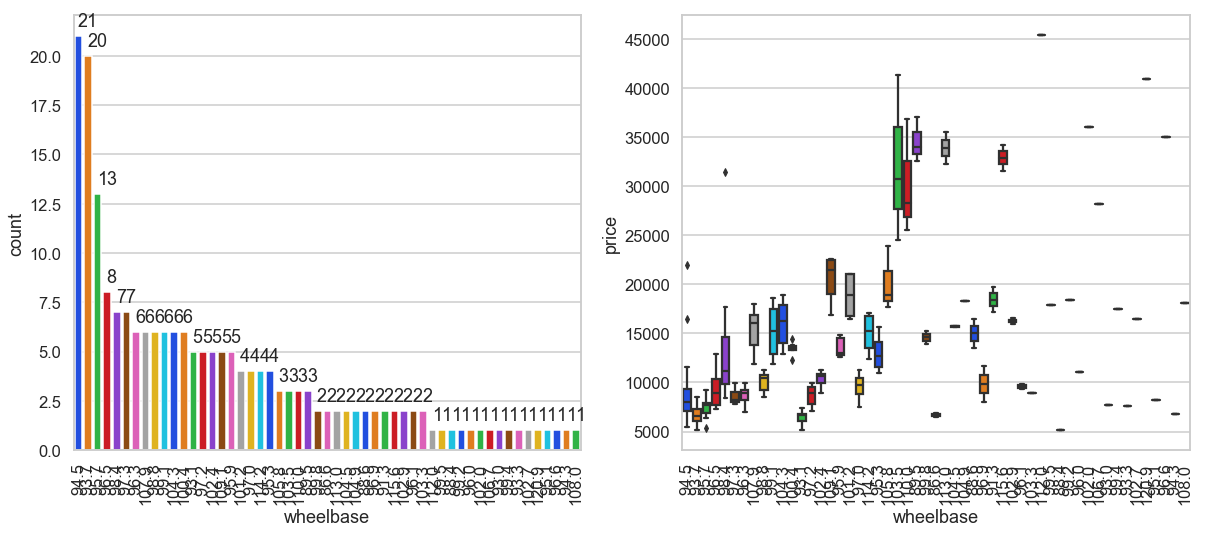

In [136]:
plotWithPrice('wheelbase')

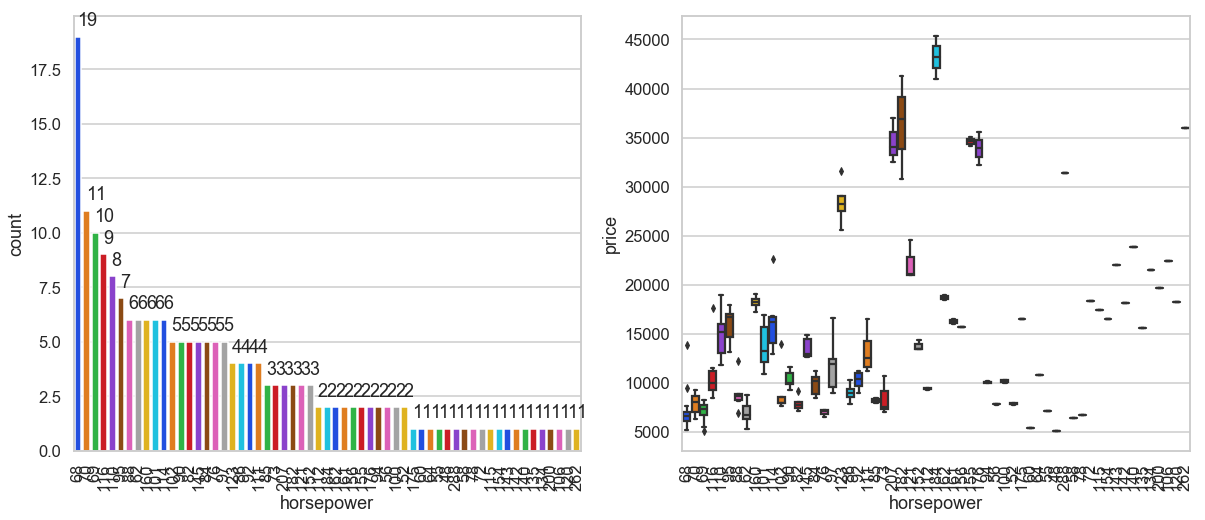

In [137]:
plotWithPrice('horsepower')

**Observations**:-  boreration, wheelbase and horsepower show some positive correlation with price

[Text(0, 0, 'convertible'),
 Text(0, 0, 'hatchback'),
 Text(0, 0, 'sedan'),
 Text(0, 0, 'wagon'),
 Text(0, 0, 'hardtop')]

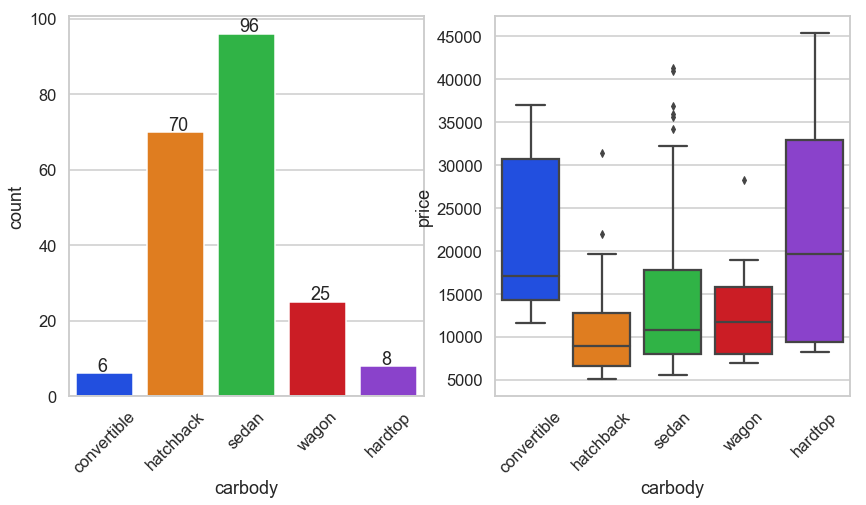

In [138]:
#checking crabody with price
plt.figure(figsize=(14,7))
ax = plt.subplot(1,2,1)
g = sns.countplot(x=df_car.carbody, palette='bright')
g.set_xticklabels(ax.get_xticklabels(), rotation = 45)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.3, height+0.5, '%.0f'%(height))
ax1 = plt.subplot(1,2,2)
g = sns.boxplot(data=df_car,x='carbody',y='price', palette='bright')
g.set_xticklabels(ax1.get_xticklabels(), rotation = 45)

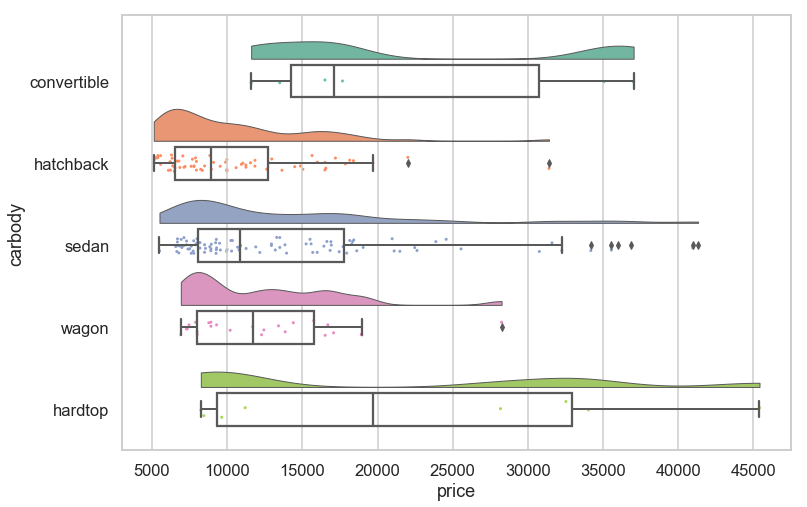

In [139]:
#let's combine scatter plot, boxplot, and viloin plot to see the details altogether
import ptitprince as pt                       #if not installed us this:- pip install ptitprince
ax = pt.RainCloud(x = 'carbody', y = 'price', 
                  data = df_car, 
                  width_viol = .8,
                  width_box = .4,
                  figsize = (12, 8), orient = 'h',
                  move = .0)

**Observations**:- Hatchback and sedan class cars are mostly used and have low prices.

<div >
<h2>Multivariate Analysis</h2>
    
</div>

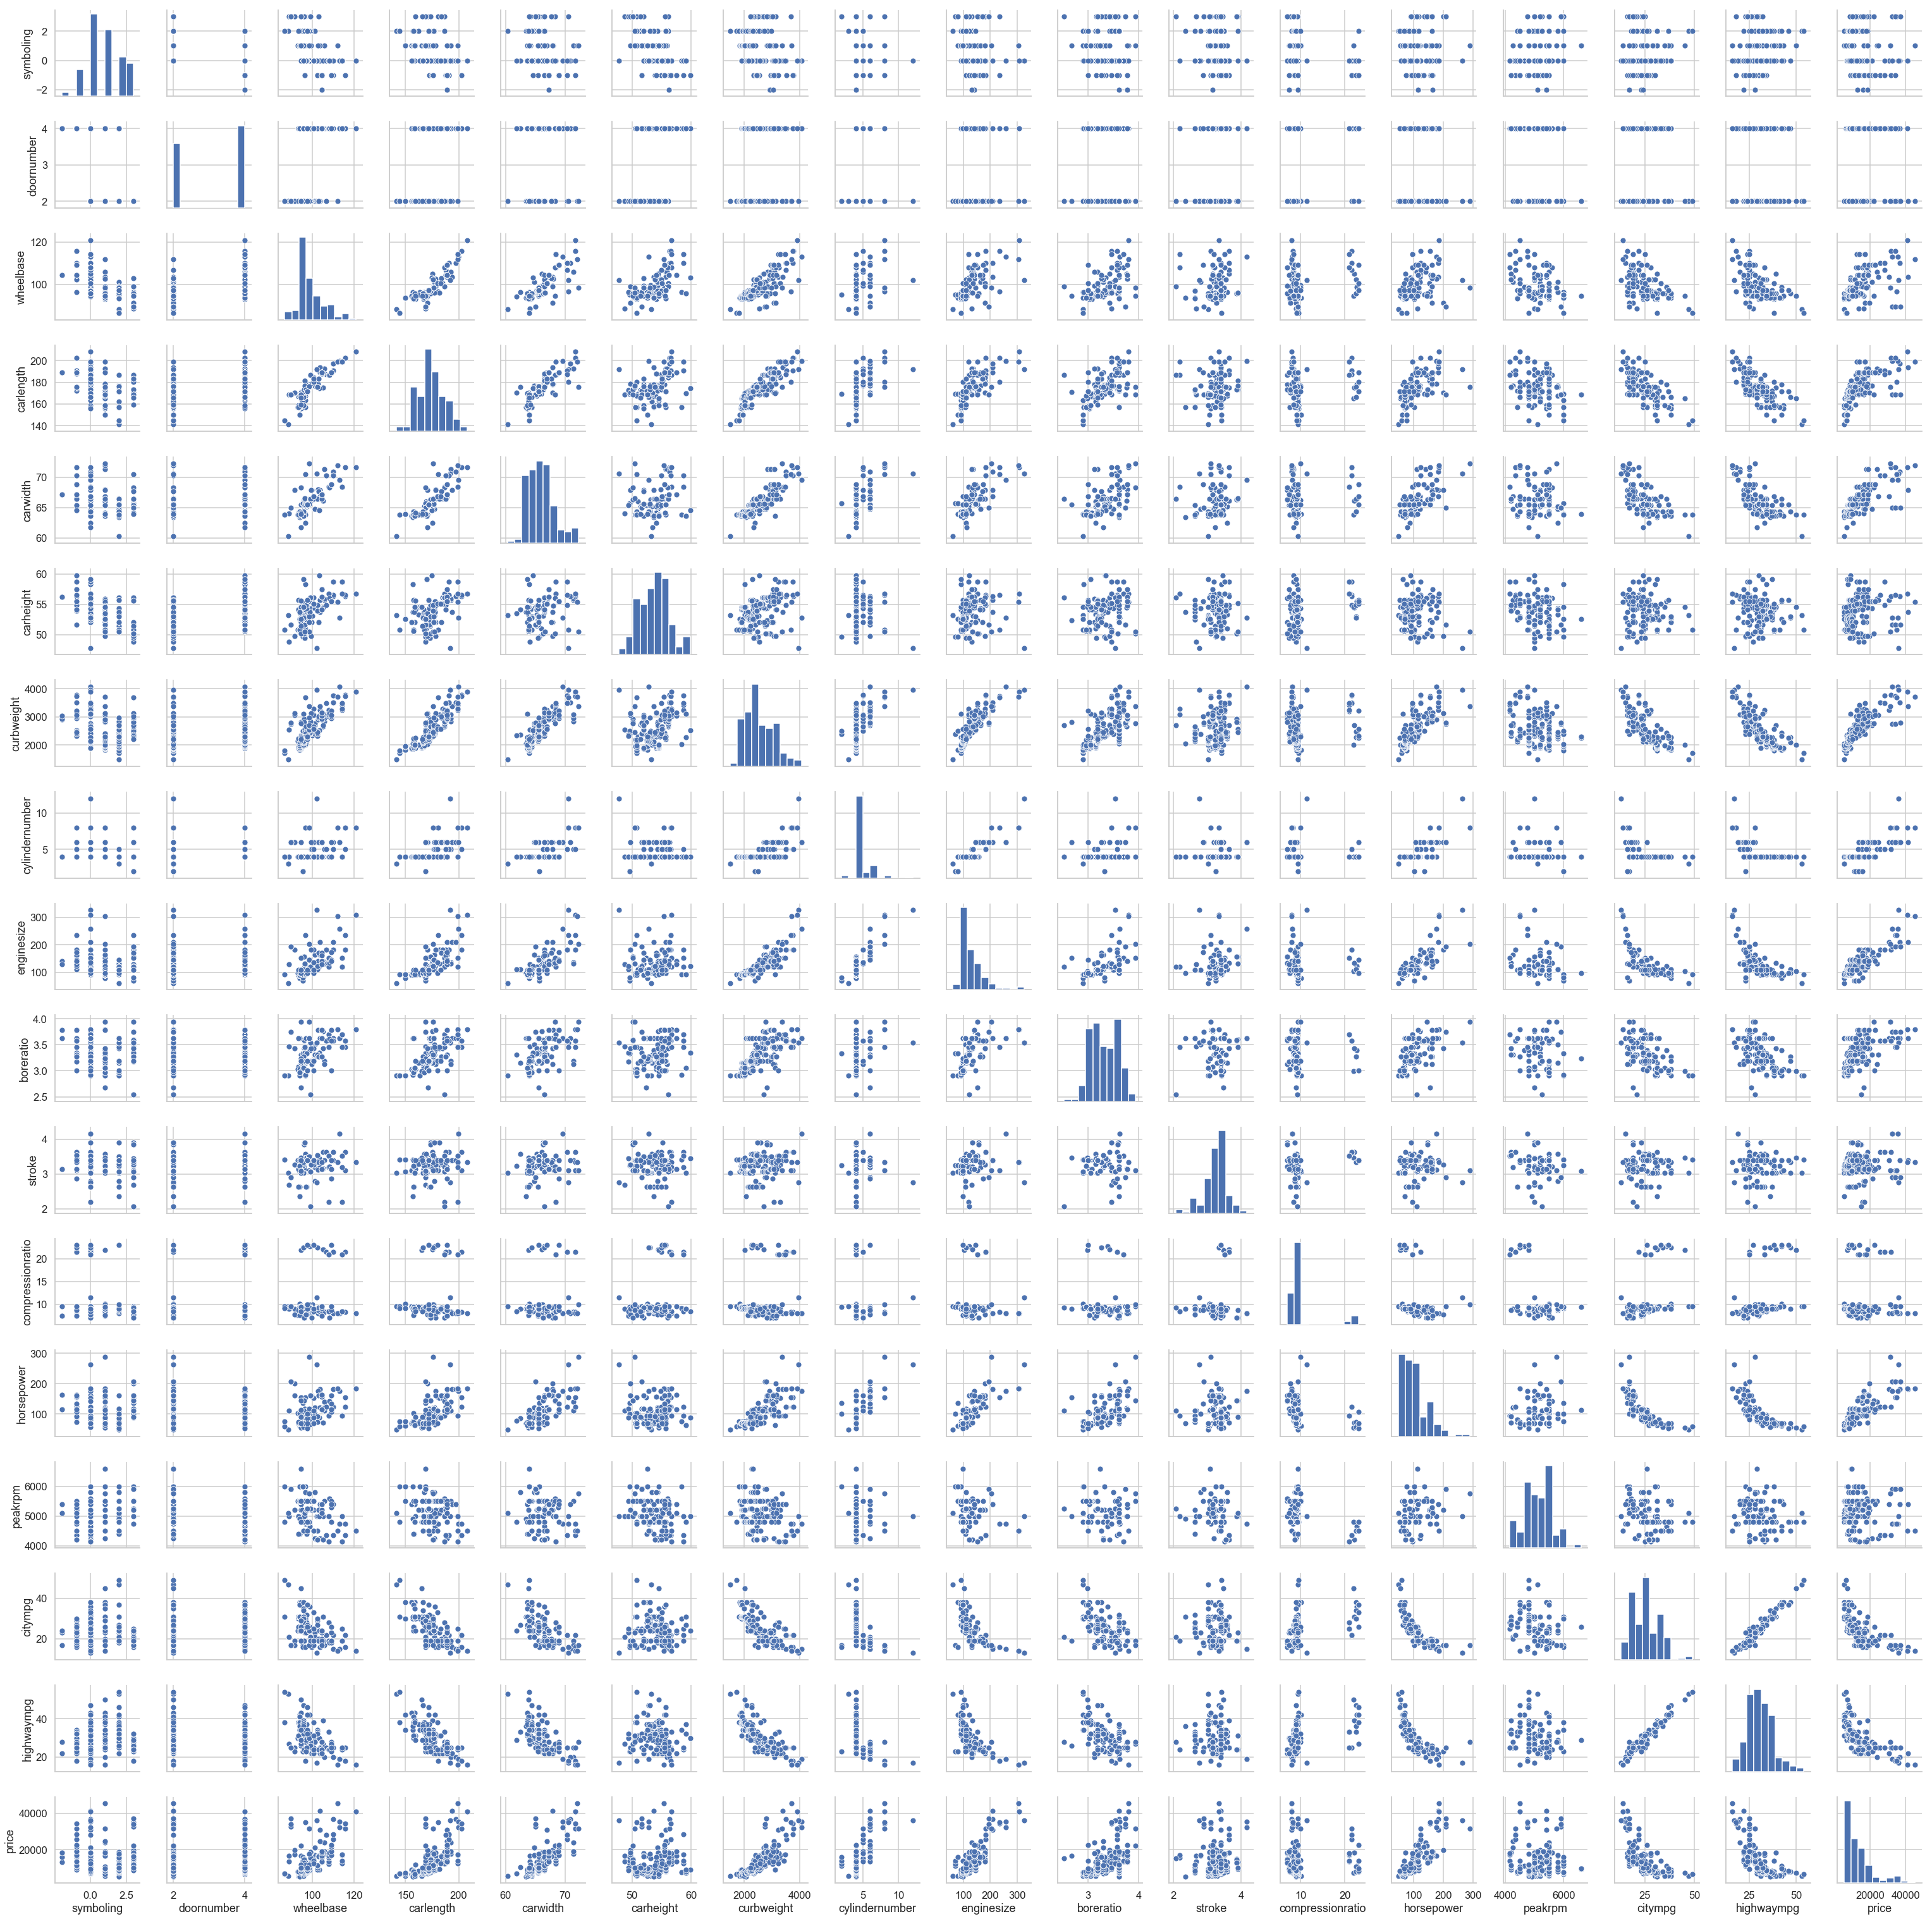

In [140]:
#pairplot
sns.pairplot(df_car)

In [141]:
#looking into the pairplot graph comprising all the fields is little difficult.
# Let's seperate only relevant and signicant columns from the univariate, bivariate and multivariate analysis.

In [142]:
significant_features = ['enginetype','enginelocation','cylindernumber','carbody','carlength','carwidth','curbweight','citympg','highwaympg','enginesize','boreratio','wheelbase','horsepower','price']

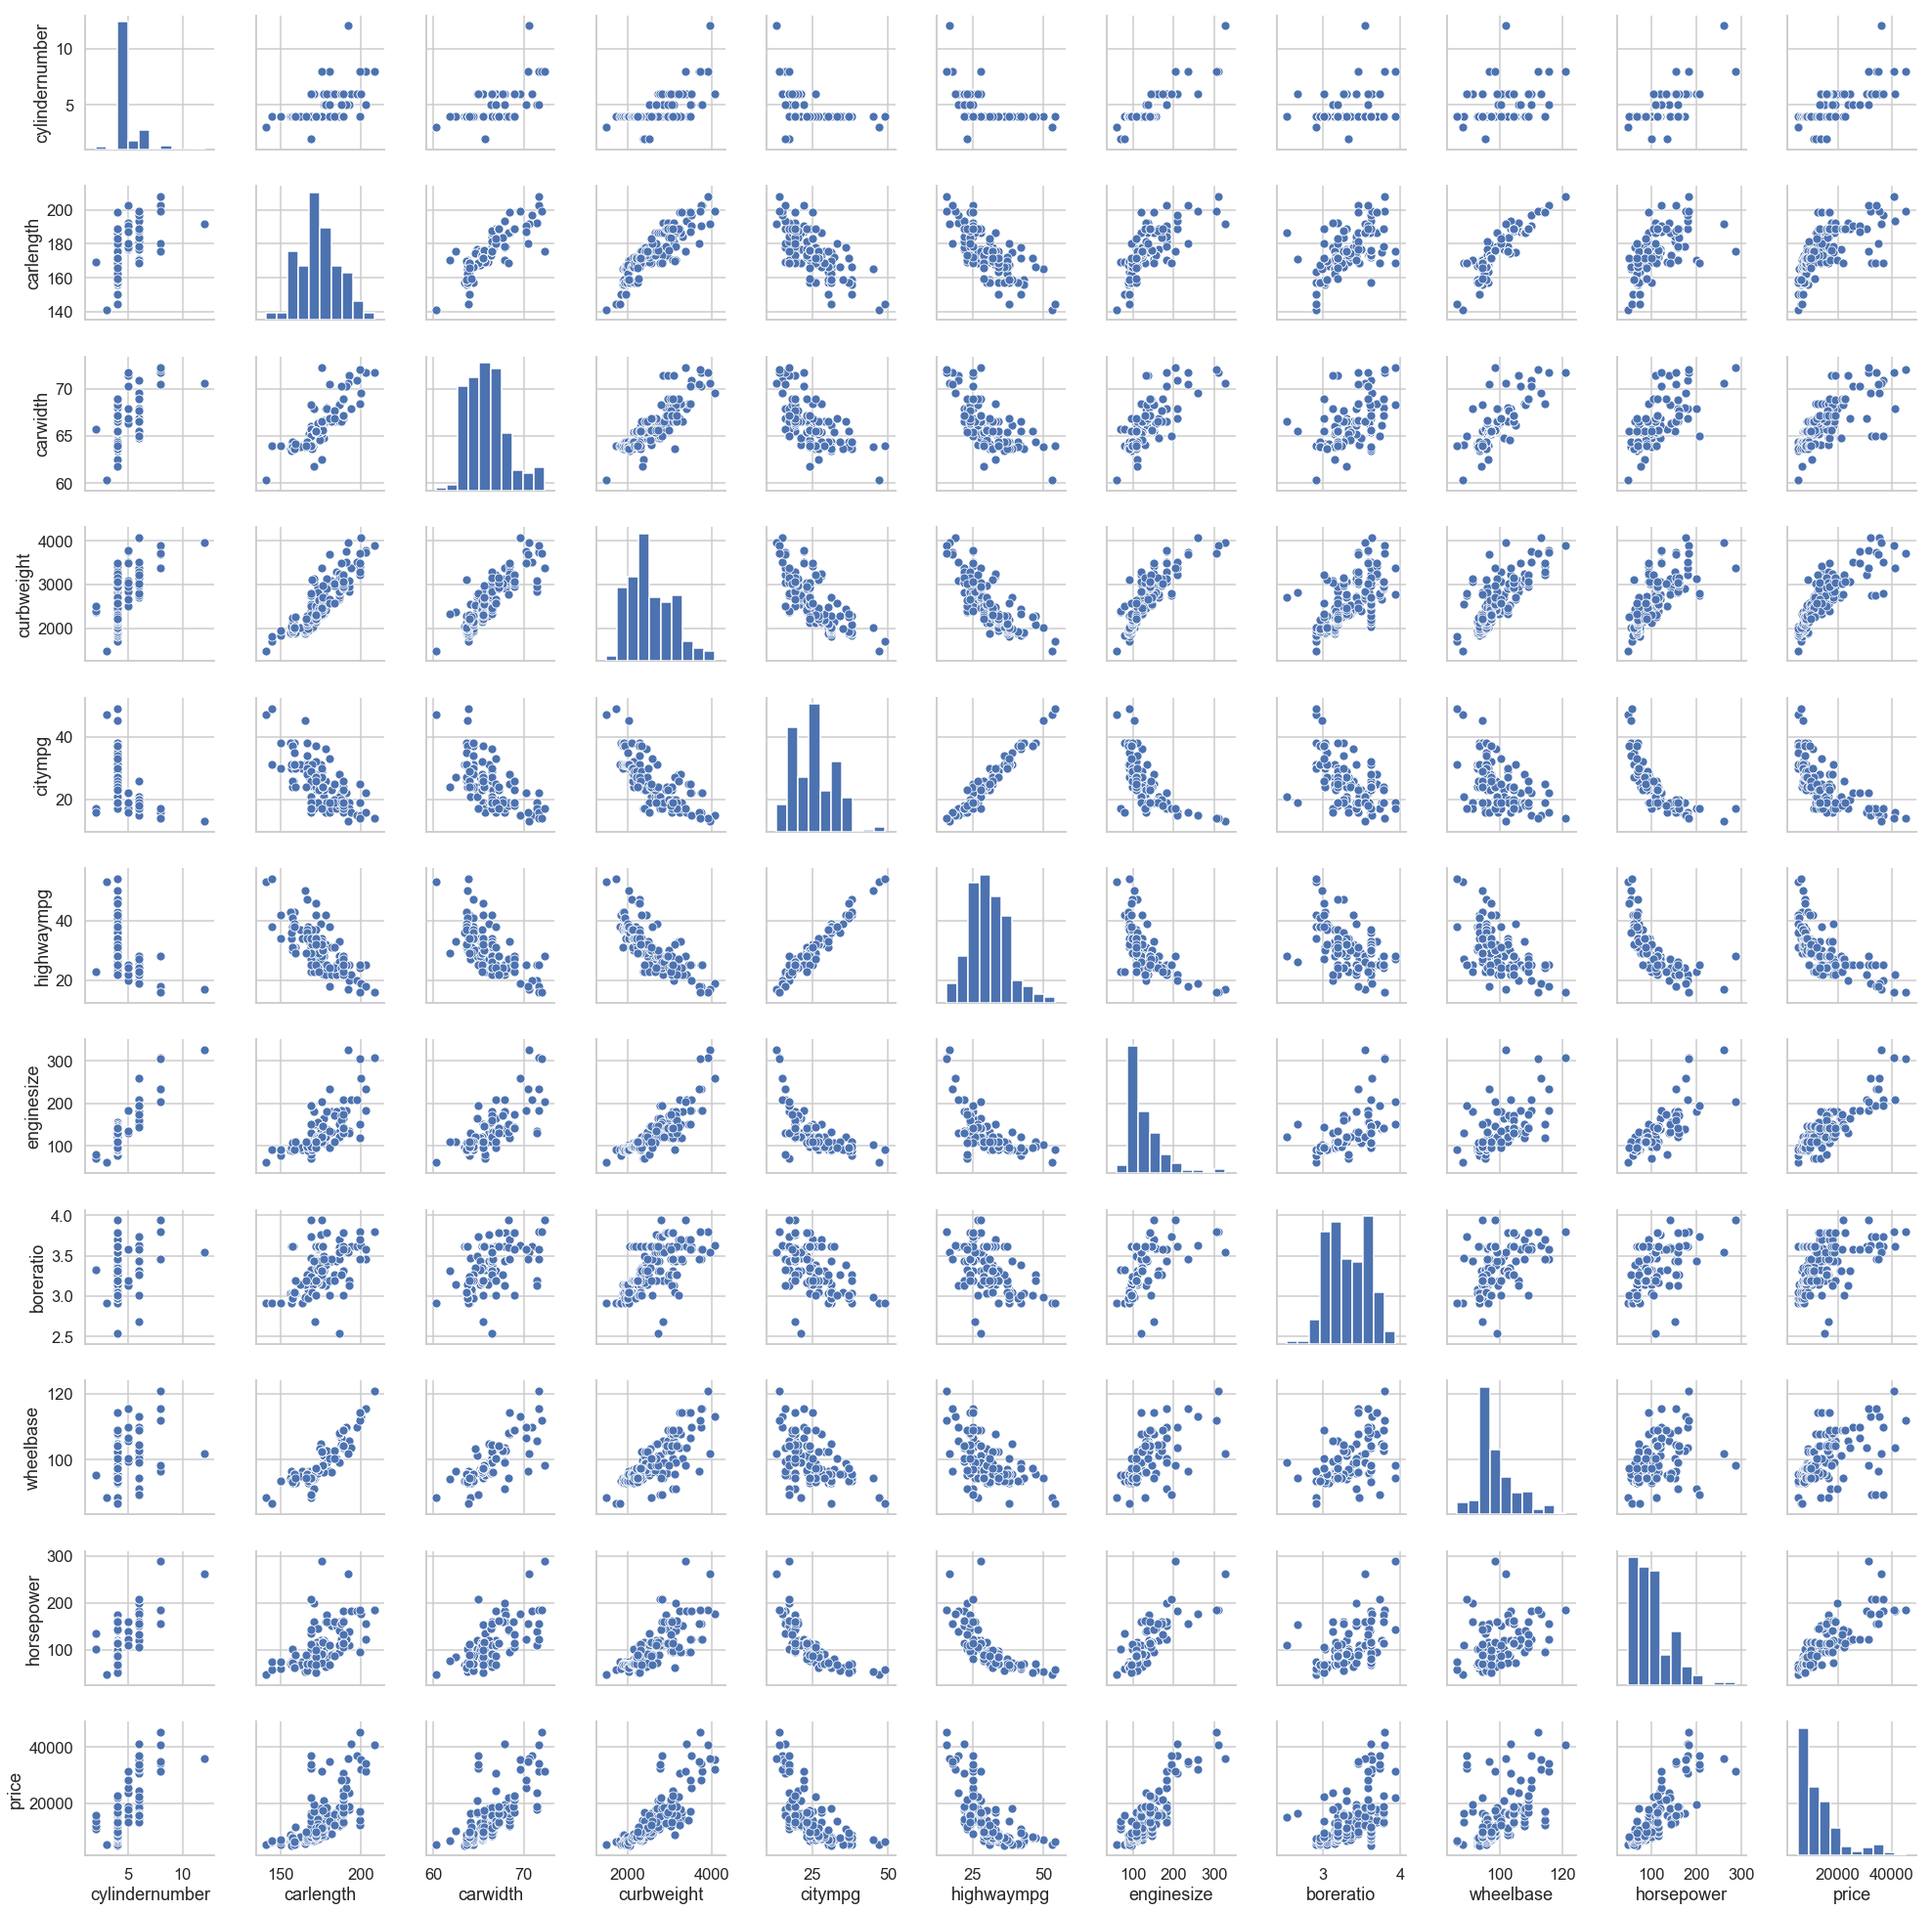

In [143]:
#now plotting pair plot
sns.pairplot(data=df_car[significant_features])

**Facts**:- From the various analysis and above pairplots, we can observe:-<br>
 **Positive correlation with Price**:-<br>
- cylindernumber
- carlength
- carwidth
- curbweight
- enginesize
- boreratio
- wheelbase
- horsepower <br>

**Negative correlation with Price**:-<br>

- citympg
- highwaympg


In [144]:
#considering only significant columns in the dataframe
df_car_final = df_car[significant_features]

In [145]:
df_car_final.head()

enginetype enginelocation  cylindernumber      carbody  carlength  carwidth  \
0  dohc       front          4               convertible  168.8      64.1       
1  dohc       front          4               convertible  168.8      64.1       
2  ohcv       front          6               hatchback    171.2      65.5       
3  ohc        front          4               sedan        176.6      66.2       
4  ohc        front          5               sedan        176.6      66.4       

   curbweight  citympg  highwaympg  enginesize  boreratio  wheelbase  \
0  2548        21       27          130         3.47       88.6        
1  2548        21       27          130         3.47       88.6        
2  2823        19       26          152         2.68       94.5        
3  2337        24       30          109         3.19       99.8        
4  2824        18       22          136         3.19       99.4        

   horsepower    price  
0  111         13495.0  
1  111         16500.0  
2  154         16500.0  
3  102         13950.0  
4  115         17450.0

<div >
<h3>Pandas Profilling</h3>
    
</div>

In [146]:
import pandas_profiling
# !{sys.executable} -m pip install pandas-profiling
pandas_profiling.ProfileReport(df_car_final)

<div >
<h2>Feature Engineering and Data Preparation</h2>
  
</div>


In [147]:
df_car_final.head()

enginetype enginelocation  cylindernumber      carbody  carlength  carwidth  \
0  dohc       front          4               convertible  168.8      64.1       
1  dohc       front          4               convertible  168.8      64.1       
2  ohcv       front          6               hatchback    171.2      65.5       
3  ohc        front          4               sedan        176.6      66.2       
4  ohc        front          5               sedan        176.6      66.4       

   curbweight  citympg  highwaympg  enginesize  boreratio  wheelbase  \
0  2548        21       27          130         3.47       88.6        
1  2548        21       27          130         3.47       88.6        
2  2823        19       26          152         2.68       94.5        
3  2337        24       30          109         3.19       99.8        
4  2824        18       22          136         3.19       99.4        

   horsepower    price  
0  111         13495.0  
1  111         16500.0  
2  154         16500.0  
3  102         13950.0  
4  115         17450.0

<div >
<h4>Create dummy variables</h4>
  
</div>
let's convert categorical variable into numerical by using one hot encoder technique

In [148]:
#1 check enginetype
df_car_final.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [149]:
df_car_final['enginetype'].describe()

count     205
unique    7  
top       ohc
freq      148
Name: enginetype, dtype: object

**Fact**:- enginetype field contains 7 unique values which need to be converted into numerical value using dummy code

In [150]:
#creating dummies
enginetype_dummies  = pd.get_dummies(df_car_final.enginetype, drop_first=True, prefix='eng')
#concatenating the dummies with working data frame column wise
df_car_final = pd.concat([df_car_final, enginetype_dummies], axis=1)
#dropping the enginetype column
df_car_final.drop('enginetype',axis=1, inplace=True)

In [151]:
#checking few records
df_car_final.head(6)

enginelocation  cylindernumber      carbody  carlength  carwidth  \
0  front          4               convertible  168.8      64.1       
1  front          4               convertible  168.8      64.1       
2  front          6               hatchback    171.2      65.5       
3  front          4               sedan        176.6      66.2       
4  front          5               sedan        176.6      66.4       
5  front          5               sedan        177.3      66.3       

   curbweight  citympg  highwaympg  enginesize  boreratio  wheelbase  \
0  2548        21       27          130         3.47       88.6        
1  2548        21       27          130         3.47       88.6        
2  2823        19       26          152         2.68       94.5        
3  2337        24       30          109         3.19       99.8        
4  2824        18       22          136         3.19       99.4        
5  2507        19       25          136         3.19       99.8        

   horsepower    price  eng_dohcv  eng_l  eng_ohc  eng_ohcf  eng_ohcv  \
0  111         13495.0  0          0      0        0         0          
1  111         16500.0  0          0      0        0         0          
2  154         16500.0  0          0      0        0         1          
3  102         13950.0  0          0      1        0         0          
4  115         17450.0  0          0      1        0         0          
5  110         15250.0  0          0      1        0         0          

   eng_rotor  
0  0          
1  0          
2  0          
3  0          
4  0          
5  0

In [152]:
#2. enginelocation

In [153]:
df_car_final.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [154]:
#describe
df_car_final.enginelocation.describe()

count     205  
unique    2    
top       front
freq      202  
Name: enginelocation, dtype: object

In [155]:
#let's create a function to create dummies
def generate_dummies(data_frame,column):
    dummies  = pd.get_dummies(data_frame[column], drop_first=True, prefix=column)
    #concatenating the dummies with working data frame column wise
    data_frame = pd.concat([data_frame, dummies], axis=1)
    #dropping the enginetype column
    data_frame.drop(column,axis=1, inplace=True)
    return data_frame;

In [156]:
#call generate_dummies for enginelocation
df_car_final = generate_dummies(df_car_final,'enginelocation')


In [157]:
#3. checking carbody
df_car_final.carbody.describe()

count     205  
unique    5    
top       sedan
freq      96   
Name: carbody, dtype: object

In [158]:
df_car_final.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [159]:
df_car_final.head()

cylindernumber      carbody  carlength  carwidth  curbweight  citympg  \
0  4               convertible  168.8      64.1      2548        21        
1  4               convertible  168.8      64.1      2548        21        
2  6               hatchback    171.2      65.5      2823        19        
3  4               sedan        176.6      66.2      2337        24        
4  5               sedan        176.6      66.4      2824        18        

   highwaympg  enginesize  boreratio  wheelbase  horsepower    price  \
0  27          130         3.47       88.6       111         13495.0   
1  27          130         3.47       88.6       111         16500.0   
2  26          152         2.68       94.5       154         16500.0   
3  30          109         3.19       99.8       102         13950.0   
4  22          136         3.19       99.4       115         17450.0   

   eng_dohcv  eng_l  eng_ohc  eng_ohcf  eng_ohcv  eng_rotor  \
0  0          0      0        0         0         0           
1  0          0      0        0         0         0           
2  0          0      0        0         1         0           
3  0          0      1        0         0         0           
4  0          0      1        0         0         0           

   enginelocation_rear  
0  0                    
1  0                    
2  0                    
3  0                    
4  0

In [160]:
# It has 5 distinct values.
# let's also create dummies for this.
df_car_final = generate_dummies(df_car_final,'carbody')
df_car_final.head()


cylindernumber  carlength  carwidth  curbweight  citympg  highwaympg  \
0  4               168.8      64.1      2548        21       27           
1  4               168.8      64.1      2548        21       27           
2  6               171.2      65.5      2823        19       26           
3  4               176.6      66.2      2337        24       30           
4  5               176.6      66.4      2824        18       22           

   enginesize  boreratio  wheelbase  horsepower    price  eng_dohcv  eng_l  \
0  130         3.47       88.6       111         13495.0  0          0       
1  130         3.47       88.6       111         16500.0  0          0       
2  152         2.68       94.5       154         16500.0  0          0       
3  109         3.19       99.8       102         13950.0  0          0       
4  136         3.19       99.4       115         17450.0  0          0       

   eng_ohc  eng_ohcf  eng_ohcv  eng_rotor  enginelocation_rear  \
0  0        0         0         0          0                     
1  0        0         0         0          0                     
2  0        0         1         0          0                     
3  1        0         0         0          0                     
4  1        0         0         0          0                     

   carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  
0  0                0                  0              0              
1  0                0                  0              0              
2  0                1                  0              0              
3  0                0                  1              0              
4  0                0                  1              0

<div >
<h4>Create new feature</h4>
  
</div>
let's try to create new feature with some significant and meaningful values

In [161]:
df_car_final.head(5)

cylindernumber  carlength  carwidth  curbweight  citympg  highwaympg  \
0  4               168.8      64.1      2548        21       27           
1  4               168.8      64.1      2548        21       27           
2  6               171.2      65.5      2823        19       26           
3  4               176.6      66.2      2337        24       30           
4  5               176.6      66.4      2824        18       22           

   enginesize  boreratio  wheelbase  horsepower    price  eng_dohcv  eng_l  \
0  130         3.47       88.6       111         13495.0  0          0       
1  130         3.47       88.6       111         16500.0  0          0       
2  152         2.68       94.5       154         16500.0  0          0       
3  109         3.19       99.8       102         13950.0  0          0       
4  136         3.19       99.4       115         17450.0  0          0       

   eng_ohc  eng_ohcf  eng_ohcv  eng_rotor  enginelocation_rear  \
0  0        0         0         0          0                     
1  0        0         0         0          0                     
2  0        0         1         0          0                     
3  1        0         0         0          0                     
4  1        0         0         0          0                     

   carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  
0  0                0                  0              0              
1  0                0                  0              0              
2  0                1                  0              0              
3  0                0                  1              0              
4  0                0                  1              0

In [162]:
#getting column names
df_car_final.columns

Index(['cylindernumber', 'carlength', 'carwidth', 'curbweight', 'citympg',
       'highwaympg', 'enginesize', 'boreratio', 'wheelbase', 'horsepower',
       'price', 'eng_dohcv', 'eng_l', 'eng_ohc', 'eng_ohcf', 'eng_ohcv',
       'eng_rotor', 'enginelocation_rear', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon'],
      dtype='object')

**Observations**:-Above we can see that two columns representing the same thing i.e mileage.
 highwaympg and citympg (highly correlated) can be used to create a single new feature and then we can delete these columns

In [163]:
# checking highwaympg
df_car_final.highwaympg.describe()

count    205.000000
mean     30.751220 
std      6.886443  
min      16.000000 
25%      25.000000 
50%      30.000000 
75%      34.000000 
max      54.000000 
Name: highwaympg, dtype: float64

In [164]:
# checking citympg
df_car_final.citympg.describe()

count    205.000000
mean     25.219512 
std      6.542142  
min      13.000000 
25%      19.000000 
50%      24.000000 
75%      30.000000 
max      49.000000 
Name: citympg, dtype: float64

**Math**:-<br>
- highwaympg + citympg = 100 (X + Y = 100)  # assuming as a single unit- car mileage
- Mean of citympg and highwaympg are 25 and 30 respectively
- Ratio X/Y = 30/25 = 1.2  => X = 1.2Y and X + Y = 100
- Resolving for X and Y, we get X = 55.0 and Y = 45.0


In [165]:
# deriving mileage from highywaympg and citympg
df_car_final['mileage'] = (0.55 * df_car_final['citympg']) + (0.45 * df_car_final['highwaympg'])

In [166]:
#dropping highway and citympg columns
df_car_final.drop(['highwaympg','citympg'], axis=1, inplace=True)

In [167]:
df_car_final.head()

cylindernumber  carlength  carwidth  curbweight  enginesize  boreratio  \
0  4               168.8      64.1      2548        130         3.47        
1  4               168.8      64.1      2548        130         3.47        
2  6               171.2      65.5      2823        152         2.68        
3  4               176.6      66.2      2337        109         3.19        
4  5               176.6      66.4      2824        136         3.19        

   wheelbase  horsepower    price  eng_dohcv  eng_l  eng_ohc  eng_ohcf  \
0  88.6       111         13495.0  0          0      0        0          
1  88.6       111         16500.0  0          0      0        0          
2  94.5       154         16500.0  0          0      0        0          
3  99.8       102         13950.0  0          0      1        0          
4  99.4       115         17450.0  0          0      1        0          

   eng_ohcv  eng_rotor  enginelocation_rear  carbody_hardtop  \
0  0         0          0                    0                 
1  0         0          0                    0                 
2  1         0          0                    0                 
3  0         0          0                    0                 
4  0         0          0                    0                 

   carbody_hatchback  carbody_sedan  carbody_wagon  mileage  
0  0                  0              0              23.70    
1  0                  0              0              23.70    
2  1                  0              0              22.15    
3  0                  1              0              26.70    
4  0                  1              0              19.80

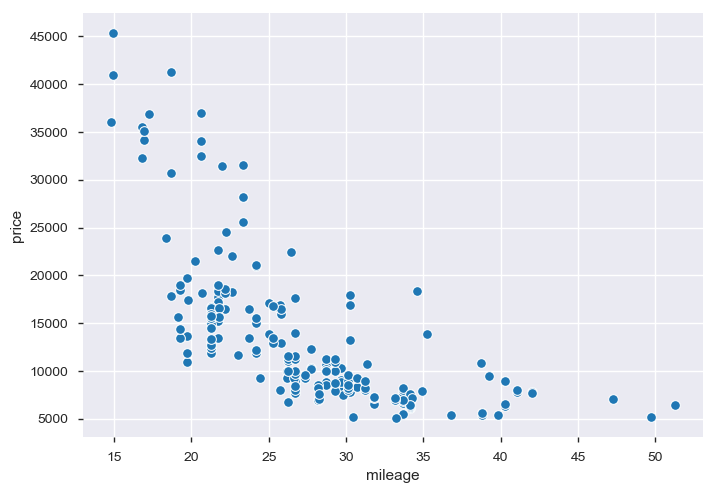

In [168]:
sns.scatterplot(x=df_car_final.mileage,y=df_car_final.price)

**Observation**:- mileage is negatively correlated with price. Higher mileage cars have lower price

<div >
<h4>Outlier Detection and Treatment</h4>
  
</div>
<br>
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [169]:
df_car_final.shape

(205, 21)

In [170]:
# 1 horsepower
df_car_final.horsepower.describe()

count    205.000000
mean     104.117073
std      39.544167 
min      48.000000 
25%      70.000000 
50%      95.000000 
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

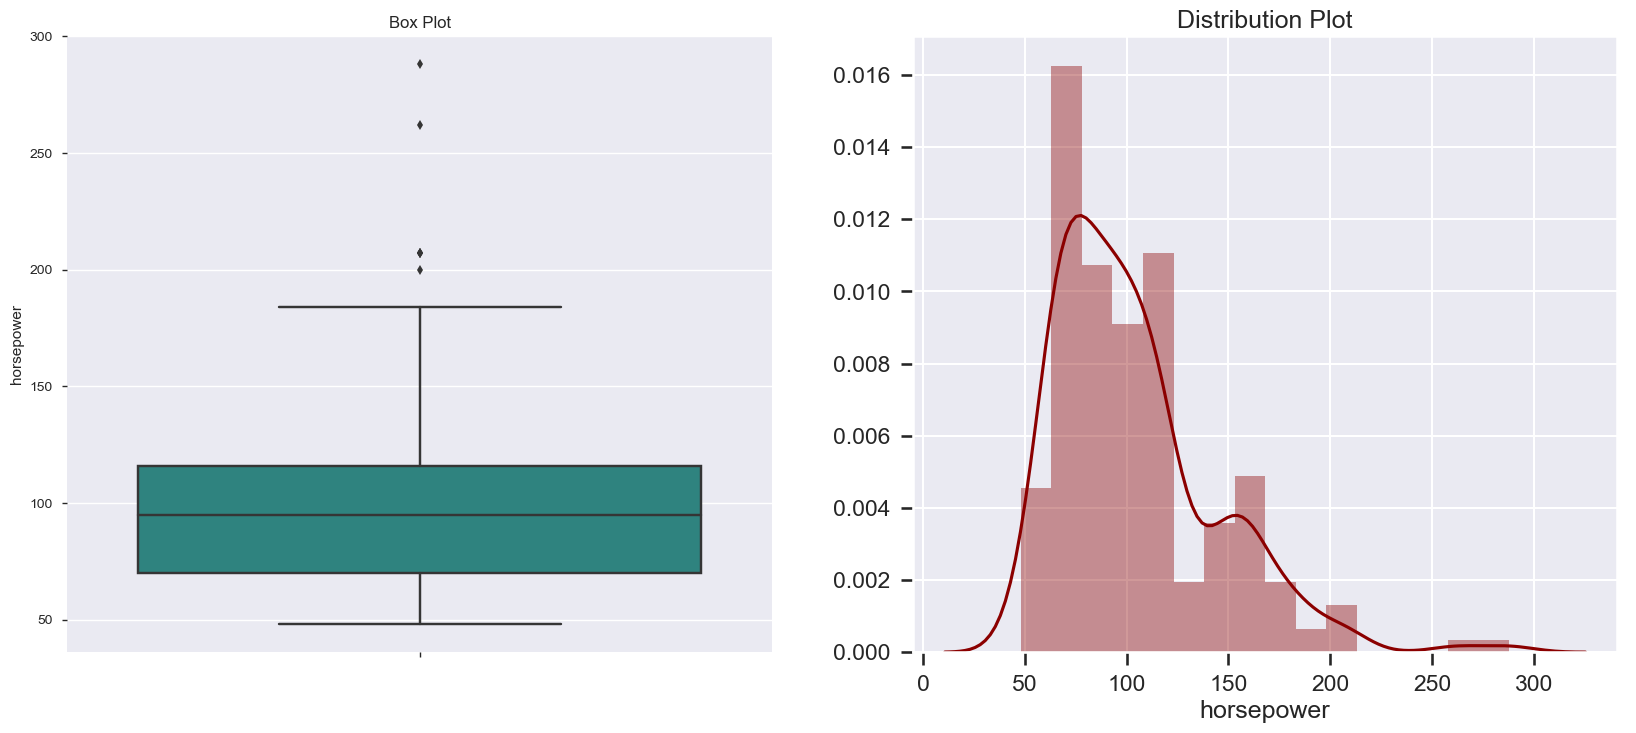

In [171]:
plt.figure(1,figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Box Plot")
sns.boxplot(y = df_car_final['horsepower'], palette = 'viridis')
sns.set_context('talk')
plt.subplot(1,2,2)
plt.title("Distribution Plot")
sns.distplot(df_car_final['horsepower'], color='darkred')
# plt.subplot(1,3,3)
#sns.swarmplot(df_car['loan_amnt'])
plt.show()

**Observation**:- Let's check for outliers and remove them

<div >
<h5>IQR Score Technique</h5>
  
</div>
<br>


**Reference**:- https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba <br>
Box plot uses the IQR method to display data and outliers (shape of the data), but in order to get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.<br>

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.<br>
In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot of the data.<br>
It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

In [172]:
# get the Q3 third quarter value
Q3=df_car_final.horsepower.quantile([0.75]).loc[0.75]
Q3

116.0

In [173]:
Q1 = df_car_final.horsepower.quantile([0.25]).loc[0.25]  #first quarter
Q1

70.0

In [174]:
#Now get the IQR(Inter Quartile range)
IQR = (Q3-Q1)
IQR

46.0

In [175]:
# horsepower > Q3 + 1.5 times IQR(> 116.0  + 1.5*(46.0)) are outliers
# horsepower < Q1 -  1.5 times IQR(< (70.0) - 1.5*(46.0)) are outliers too
lower_outlier_limit = (Q1 -(1.5*IQR))
upper_outlier_limit = (Q3 + (1.5*IQR))
print(lower_outlier_limit)
print(upper_outlier_limit)

1.0
185.0


In [176]:
df_after_outlier_treatment = df_car_final[(df_car_final.horsepower < lower_outlier_limit) | (df_car_final.horsepower > upper_outlier_limit) ]

In [177]:
df_after_outlier_treatment

cylindernumber  carlength  carwidth  curbweight  enginesize  boreratio  \
49   12              191.7      70.6      3950        326         3.54        
105  6               170.7      67.9      3139        181         3.43        
126  6               168.9      65.0      2756        194         3.74        
127  6               168.9      65.0      2756        194         3.74        
128  6               168.9      65.0      2800        194         3.74        
129  8               175.7      72.3      3366        203         3.94        

     wheelbase  horsepower    price  eng_dohcv  eng_l  eng_ohc  eng_ohcf  \
49   102.0      262         36000.0  0          0      0        0          
105  91.3       200         19699.0  0          0      0        0          
126  89.5       207         32528.0  0          0      0        1          
127  89.5       207         34028.0  0          0      0        1          
128  89.5       207         37028.0  0          0      0        1          
129  98.4       288         31400.5  1          0      0        0          

     eng_ohcv  eng_rotor  enginelocation_rear  carbody_hardtop  \
49   1         0          0                    0                 
105  1         0          0                    0                 
126  0         0          1                    1                 
127  0         0          1                    1                 
128  0         0          1                    0                 
129  0         0          0                    0                 

     carbody_hatchback  carbody_sedan  carbody_wagon  mileage  
49   0                  1              0              14.80    
105  1                  0              0              19.70    
126  0                  0              0              20.60    
127  0                  0              0              20.60    
128  0                  0              0              20.60    
129  1                  0              0              21.95

**Observations**:- 6 outliers are detected

In [178]:
# let's remove the outliers
df_car_final = df_car_final.loc[~df_car_final.index.isin(df_after_outlier_treatment.index)]

In [179]:
#checing the shape of the dataset
df_car_final.shape

(199, 21)

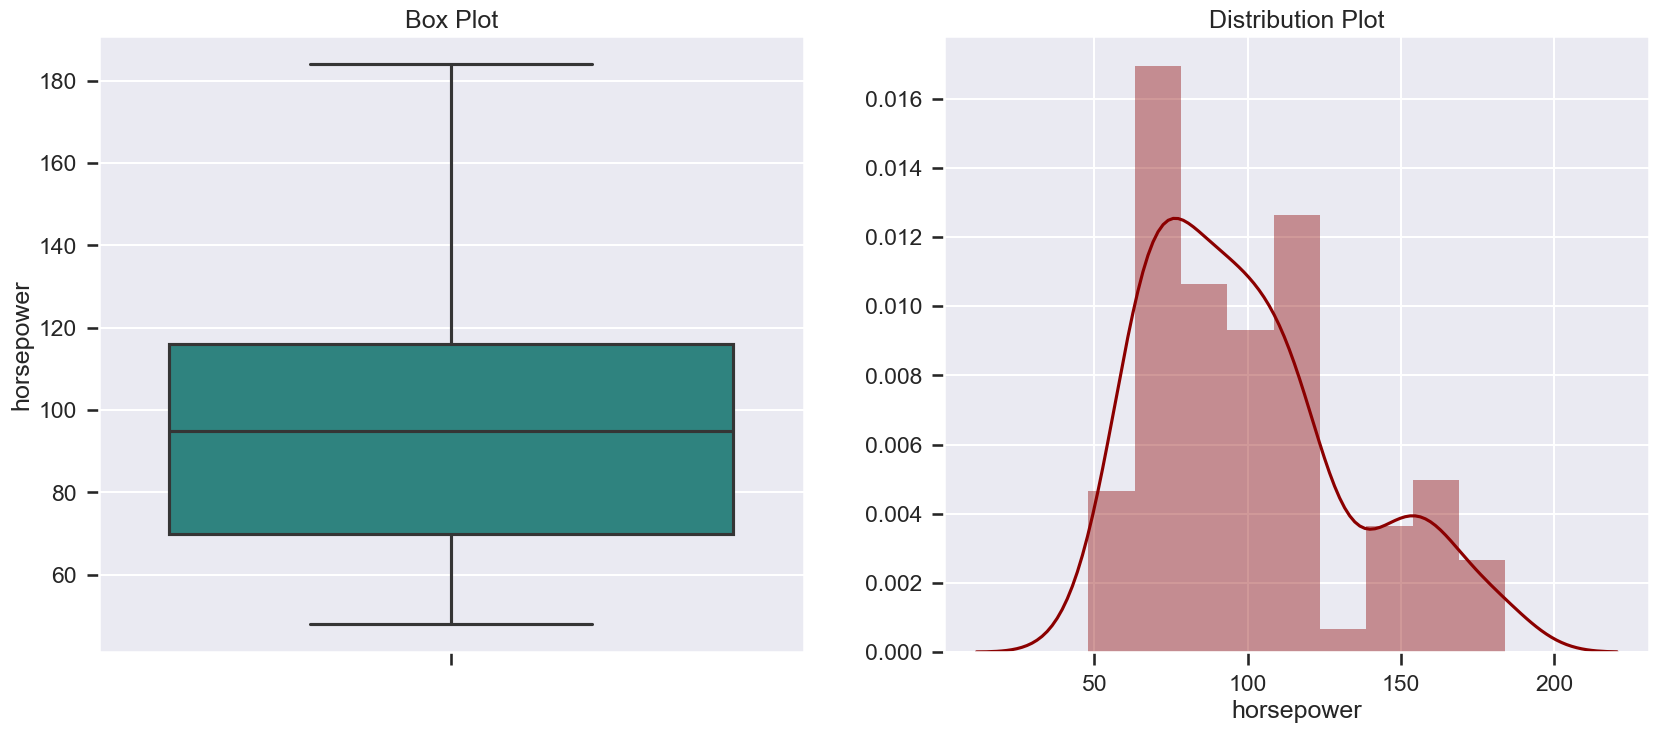

In [180]:
#checking the distributions
plt.figure(1,figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Box Plot")
sns.boxplot(y = df_car_final['horsepower'], palette = 'viridis')
sns.set_context('talk')
plt.subplot(1,2,2)
plt.title("Distribution Plot")
sns.distplot(df_car_final['horsepower'], color='darkred')
# plt.subplot(1,3,3)
#sns.swarmplot(df_car['loan_amnt'])
plt.show()

In [181]:
#create a general function to remove the outliers
def remove_Outliers_IQR(data, colName):  
    '''
    this function will take dataframe and a column name as input
    it checks the outliers and remove them using IQR score technoqie
    It returns the final data frame
    '''
    Q3=data[colName].quantile([0.75]).loc[0.75]                        #get the Q3 third quarter value
    Q1 = data[colName].quantile([0.25]).loc[0.25]                      #first quarter
    IQR = Q3-Q1                                                                 #IQR
    lower_outlier_limit = (Q1 -(1.5*IQR))
    upper_outlier_limit = (Q3 + (1.5*IQR))
    #filter with limits
    df_after_outlier_treatment = data[(data[colName] < lower_outlier_limit) | (data[colName] > upper_outlier_limit)]
    if df_after_outlier_treatment.shape[0] > 0:
        #let's remove the outliers
        data = data.loc[~data.index.isin( df_after_outlier_treatment.index)]
        return data
    else:
        return data

In [182]:
# 2 Price
df_car_final.price.describe()

count    199.000000  
mean     12718.804859
std      7353.375343 
min      5118.000000 
25%      7775.000000 
50%      9995.000000 
75%      15991.500000
max      45400.000000
Name: price, dtype: float64

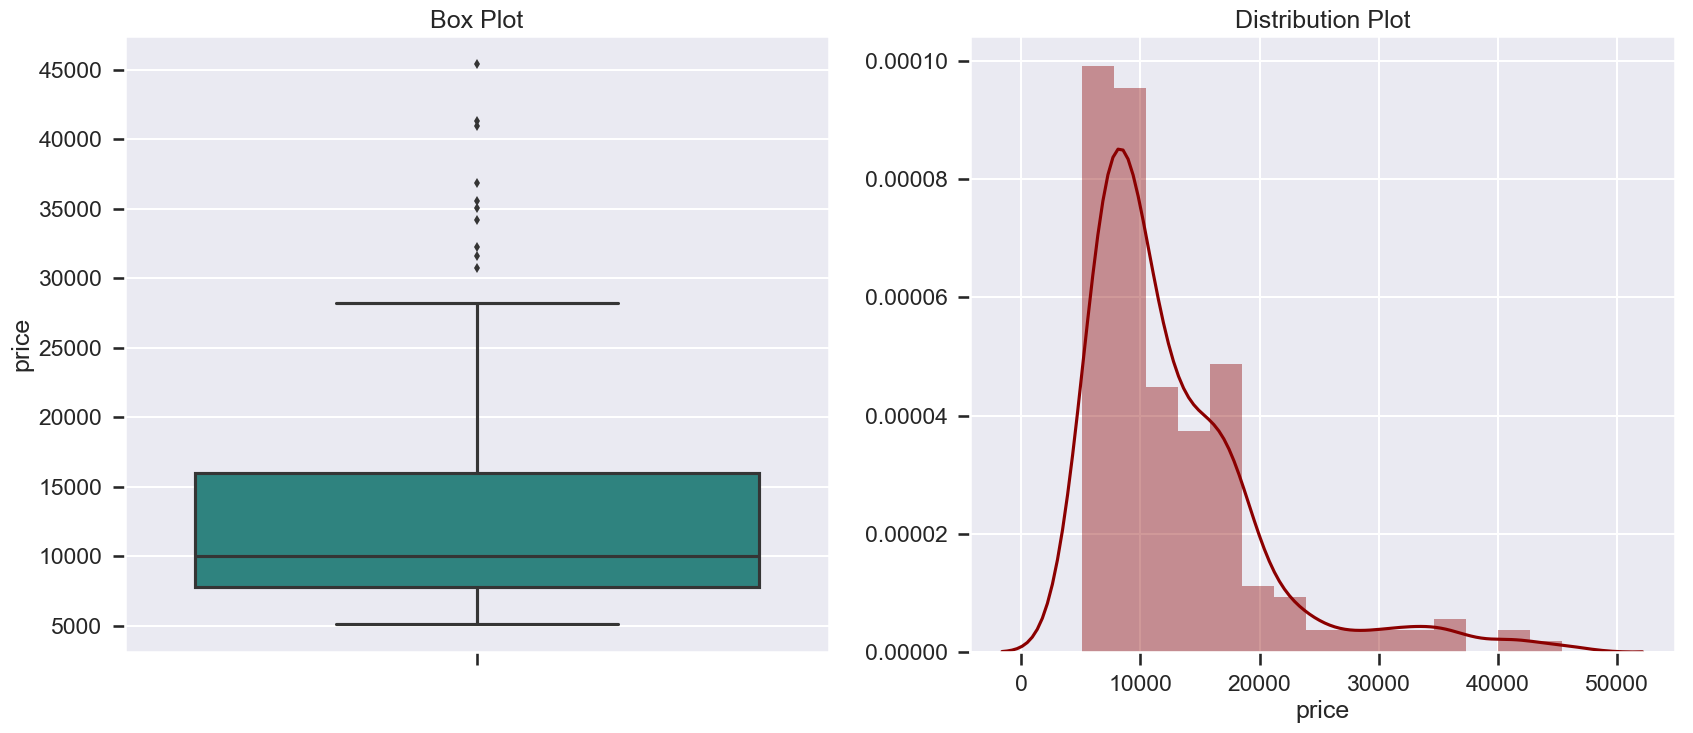

In [183]:
# checking the distributions
plt.figure(1,figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Box Plot")
sns.boxplot(y = df_car_final['price'], palette = 'viridis')
sns.set_context('talk')
plt.subplot(1,2,2)
plt.title("Distribution Plot")
sns.distplot(df_car_final['price'], color='darkred')
# plt.subplot(1,3,3)
#sns.swarmplot(df_car['loan_amnt'])
plt.show()

**Observations**:- It looks like there are some outliers. Let's find and remove them

In [184]:
from scipy import stats

z = np.abs(stats.zscore(df_car_final.price))
type(z)

numpy.ndarray

In [185]:
# adding column in dataframe
df_car_final['z_price'] = z
df_car_final.shape

(199, 22)

In [186]:
df_car_final.head()

cylindernumber  carlength  carwidth  curbweight  enginesize  boreratio  \
0  4               168.8      64.1      2548        130         3.47        
1  4               168.8      64.1      2548        130         3.47        
2  6               171.2      65.5      2823        152         2.68        
3  4               176.6      66.2      2337        109         3.19        
4  5               176.6      66.4      2824        136         3.19        

   wheelbase  horsepower    price  eng_dohcv  eng_l  eng_ohc  eng_ohcf  \
0  88.6       111         13495.0  0          0      0        0          
1  88.6       111         16500.0  0          0      0        0          
2  94.5       154         16500.0  0          0      0        0          
3  99.8       102         13950.0  0          0      1        0          
4  99.4       115         17450.0  0          0      1        0          

   eng_ohcv  eng_rotor  enginelocation_rear  carbody_hardtop  \
0  0         0          0                    0                 
1  0         0          0                    0                 
2  1         0          0                    0                 
3  0         0          0                    0                 
4  0         0          0                    0                 

   carbody_hatchback  carbody_sedan  carbody_wagon  mileage   z_price  
0  0                  0              0              23.70    0.105823  
1  0                  0              0              23.70    0.515509  
2  1                  0              0              22.15    0.515509  
3  0                  1              0              26.70    0.167855  
4  0                  1              0              19.80    0.645027

In [187]:
# checking the z > 3(more than 3rd standard deviation range)
df_car_final[df_car_final.z_price > 3]

cylindernumber  carlength  carwidth  curbweight  enginesize  boreratio  \
16  6               193.8      67.9      3380        209         3.62        
17  6               197.0      70.9      3505        209         3.62        
48  6               199.6      69.6      4066        258         3.63        
72  8               180.3      70.5      3685        234         3.46        
73  8               208.1      71.7      3900        308         3.80        
74  8               199.2      72.0      3715        304         3.80        

    wheelbase  horsepower    price  eng_dohcv  eng_l  eng_ohc  eng_ohcf  \
16  103.5      182         41315.0  0          0      1        0          
17  110.0      182         36880.0  0          0      1        0          
48  113.0      176         35550.0  0          0      0        0          
72  96.6       155         35056.0  0          0      0        0          
73  120.9      184         40960.0  0          0      0        0          
74  112.0      184         45400.0  0          0      0        0          

    eng_ohcv  eng_rotor  enginelocation_rear  carbody_hardtop  \
16  0         0          0                    0                 
17  0         0          0                    0                 
48  0         0          0                    0                 
72  1         0          0                    0                 
73  1         0          0                    0                 
74  1         0          0                    1                 

    carbody_hatchback  carbody_sedan  carbody_wagon  mileage   z_price  
16  0                  1              0              18.70    3.898661  
17  0                  1              0              17.25    3.294015  
48  0                  1              0              16.80    3.112690  
72  0                  0              0              16.90    3.045340  
73  0                  1              0              14.90    3.850262  
74  0                  0              0              14.90    4.455589

In [188]:
# let's check the outliers using IQR score technique
Q3=df_car_final.price.quantile([0.75]).loc[0.75]                        #get the Q3 third quarter value
Q1 = df_car_final.price.quantile([0.25]).loc[0.25]                      #first quarter
IQR = Q3-Q1                                                                 #IQR
lower_outlier_limit = (Q1 -(1.5*IQR))
upper_outlier_limit = (Q3 + (1.5*IQR))
print("lower_outlier_limit={0}".format(lower_outlier_limit))
print("upper_outlier_limit={0}".format(upper_outlier_limit))
#filter with limits
df_after_outlier_treatment = df_car_final[(df_car_final['price'] < lower_outlier_limit) | (df_car_final['price'] > upper_outlier_limit)]
print("shape={0}".format(df_after_outlier_treatment.shape))
df_after_outlier_treatment

lower_outlier_limit=-4549.75
upper_outlier_limit=28316.25
shape=(10, 22)


cylindernumber  carlength  carwidth  curbweight  enginesize  boreratio  \
15  6               189.0      66.9      3230        209         3.62        
16  6               193.8      67.9      3380        209         3.62        
17  6               197.0      70.9      3505        209         3.62        
47  6               199.6      69.6      4066        258         3.63        
48  6               199.6      69.6      4066        258         3.63        
70  5               202.6      71.7      3770        183         3.58        
71  8               202.6      71.7      3740        234         3.46        
72  8               180.3      70.5      3685        234         3.46        
73  8               208.1      71.7      3900        308         3.80        
74  8               199.2      72.0      3715        304         3.80        

    wheelbase  horsepower    price  eng_dohcv  eng_l  eng_ohc  eng_ohcf  \
15  103.5      182         30760.0  0          0      1        0          
16  103.5      182         41315.0  0          0      1        0          
17  110.0      182         36880.0  0          0      1        0          
47  113.0      176         32250.0  0          0      0        0          
48  113.0      176         35550.0  0          0      0        0          
70  115.6      123         31600.0  0          0      1        0          
71  115.6      155         34184.0  0          0      0        0          
72  96.6       155         35056.0  0          0      0        0          
73  120.9      184         40960.0  0          0      0        0          
74  112.0      184         45400.0  0          0      0        0          

    eng_ohcv  eng_rotor  enginelocation_rear  carbody_hardtop  \
15  0         0          0                    0                 
16  0         0          0                    0                 
17  0         0          0                    0                 
47  0         0          0                    0                 
48  0         0          0                    0                 
70  0         0          0                    0                 
71  1         0          0                    0                 
72  1         0          0                    0                 
73  1         0          0                    0                 
74  1         0          0                    1                 

    carbody_hatchback  carbody_sedan  carbody_wagon  mileage   z_price  
15  0                  1              0              18.70    2.459645  
16  0                  1              0              18.70    3.898661  
17  0                  1              0              17.25    3.294015  
47  0                  1              0              16.80    2.662785  
48  0                  1              0              16.80    3.112690  
70  0                  1              0              23.35    2.574167  
71  0                  1              0              16.90    2.926456  
72  0                  0              0              16.90    3.045340  
73  0                  1              0              14.90    3.850262  
74  0                  0              0              14.90    4.455589

**Observations**:- IQR score techniquq gives 10 outliers where as Z-score gives only 6 outliers.<br>
Let's go with Z-score 

In [189]:
df_car_final.shape

(199, 22)

In [190]:
# filter outliers
df_car_final = df_car_final[df_car_final['z_price'] <= 3]
# removing z_price column
df_car_final.drop('z_price', axis=1, inplace=True)

In [191]:
df_car_final.shape

(193, 21)

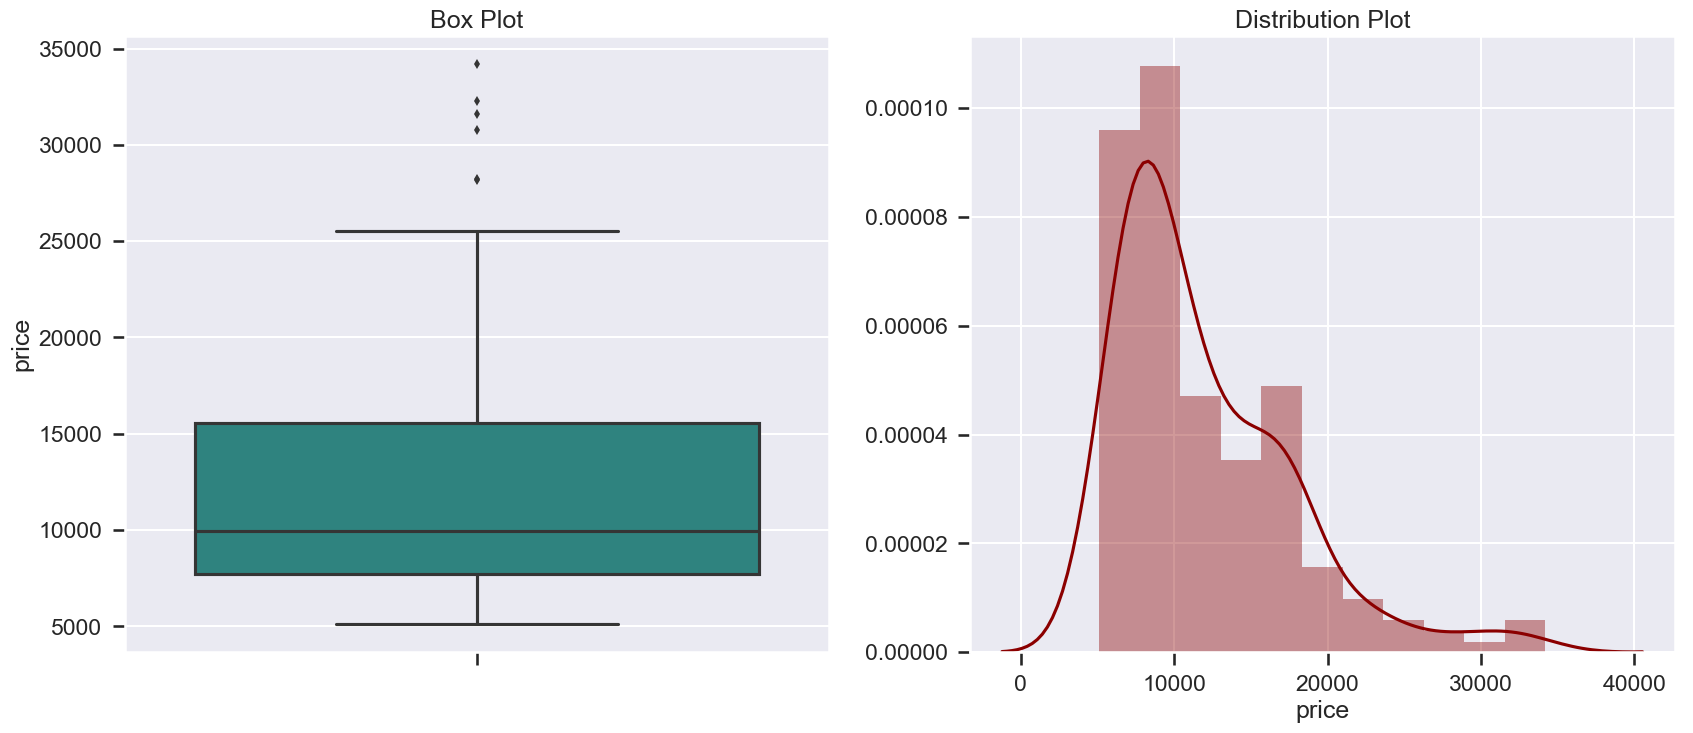

In [192]:
# checking the distributions
plt.figure(1,figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Box Plot")
sns.boxplot(y = df_car_final['price'], palette = 'viridis')
sns.set_context('talk')
plt.subplot(1,2,2)
plt.title("Distribution Plot")
sns.distplot(df_car_final['price'], color='darkred')
# plt.subplot(1,3,3)
#sns.swarmplot(df_car['loan_amnt'])
plt.show()

In [193]:
# creating function for the removal of outliers using z-score technique
def remove_Outliers_Z_score(data, colName):
    '''
    this function will take dataframe and a column name as input
    it checks the outliers and remove them using IQR score technoqie
    
    It returns the final data frame
    '''
    data['z_temp'] = np.abs(stats.zscore(data[colName]))     #creating a new col with z-score
    data = data[data['z_temp'] <= 3]                         # getting all the rows whose z<= 3
    data.drop('z_temp', axis=0, inplace=True)                # dropping the col
    return data

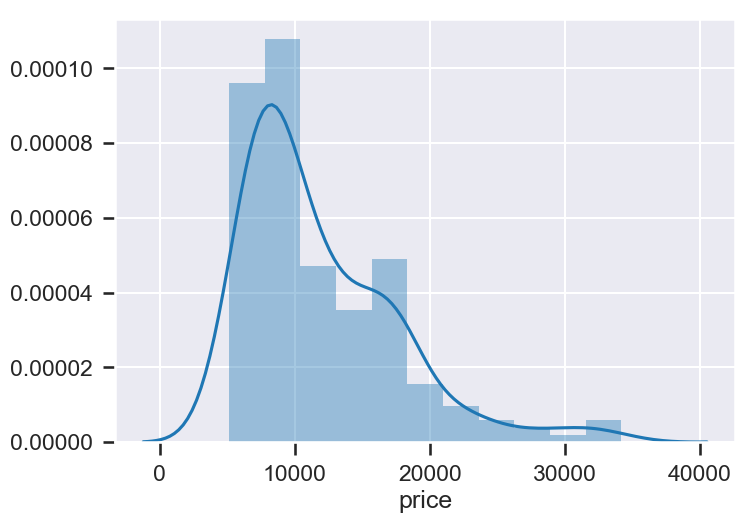

In [194]:
sns.distplot(df_car_final.price)

<div >
<h4>Data Scaling</h4>
  
</div>
Before applying any machine learning algorithm, we should scale our data if not in similar range. If not scaled, the result and accuracy get impacted specifically for those ML models which uses some distance calculating technique.<br>
**Scaling Techniques** <br>
-  Normalization (min-max scaling) and 
-  Standardization (mean-o, sigma-1)

In [195]:
# defining a normalisation function 
def standarize(x):    
    return (x- np.mean(x))/(np.std(x))

In [196]:
# or using sklearn package
from sklearn import preprocessing
def standarize_sklearn(x):
    # Get column names first
    names = x.columns
    # Create the Scaler object
    scaler = preprocessing.StandardScaler()
    # Fit your data on the scaler object
    df = scaler.fit_transform(x)
    df = pd.DataFrame(df, columns=names)
    return df

In [197]:
df_car_final = standarize_sklearn(df_car_final)
#or
#df_car_final = standarize(df_car_final)

In [198]:
df_car_final.head()

cylindernumber  carlength  carwidth  curbweight  enginesize  boreratio  \
0 -0.282730       -0.383941  -0.830812  0.097170    0.323048    0.616893    
1 -0.282730       -0.383941  -0.830812  0.097170    0.323048    0.616893    
2  2.445611       -0.181595  -0.109921  0.677227    1.049565   -2.400678    
3 -0.282730        0.273682   0.250524 -0.347892   -0.370445   -0.452626    
4  1.081441        0.273682   0.353509  0.679336    0.521189   -0.452626    

   wheelbase  horsepower     price  eng_dohcv     eng_l   eng_ohc  eng_ohcf  \
0 -1.785701   0.427081    0.280175  0.0       -0.257485 -1.762493 -0.257485   
1 -1.785701   0.427081    0.806629  0.0       -0.257485 -1.762493 -0.257485   
2 -0.731646   1.837484    0.806629  0.0       -0.257485 -1.762493 -0.257485   
3  0.215217   0.131880    0.359888  0.0       -0.257485  0.567378 -0.257485   
4  0.143756   0.558281    0.973062  0.0       -0.257485  0.567378 -0.257485   

   eng_ohcv  eng_rotor  enginelocation_rear  carbody_hardtop  \
0 -0.207950 -0.145479   0.0                 -0.163082          
1 -0.207950 -0.145479   0.0                 -0.163082          
2  4.808846 -0.145479   0.0                 -0.163082          
3 -0.207950 -0.145479   0.0                 -0.163082          
4 -0.207950 -0.145479   0.0                 -0.163082          

   carbody_hatchback  carbody_sedan  carbody_wagon   mileage  
0 -0.737564          -0.944541      -0.385758      -0.725046  
1 -0.737564          -0.944541      -0.385758      -0.725046  
2  1.355815          -0.944541      -0.385758      -0.969163  
3 -0.737564           1.058716      -0.385758      -0.252563  
4 -0.737564           1.058716      -0.385758      -1.339275

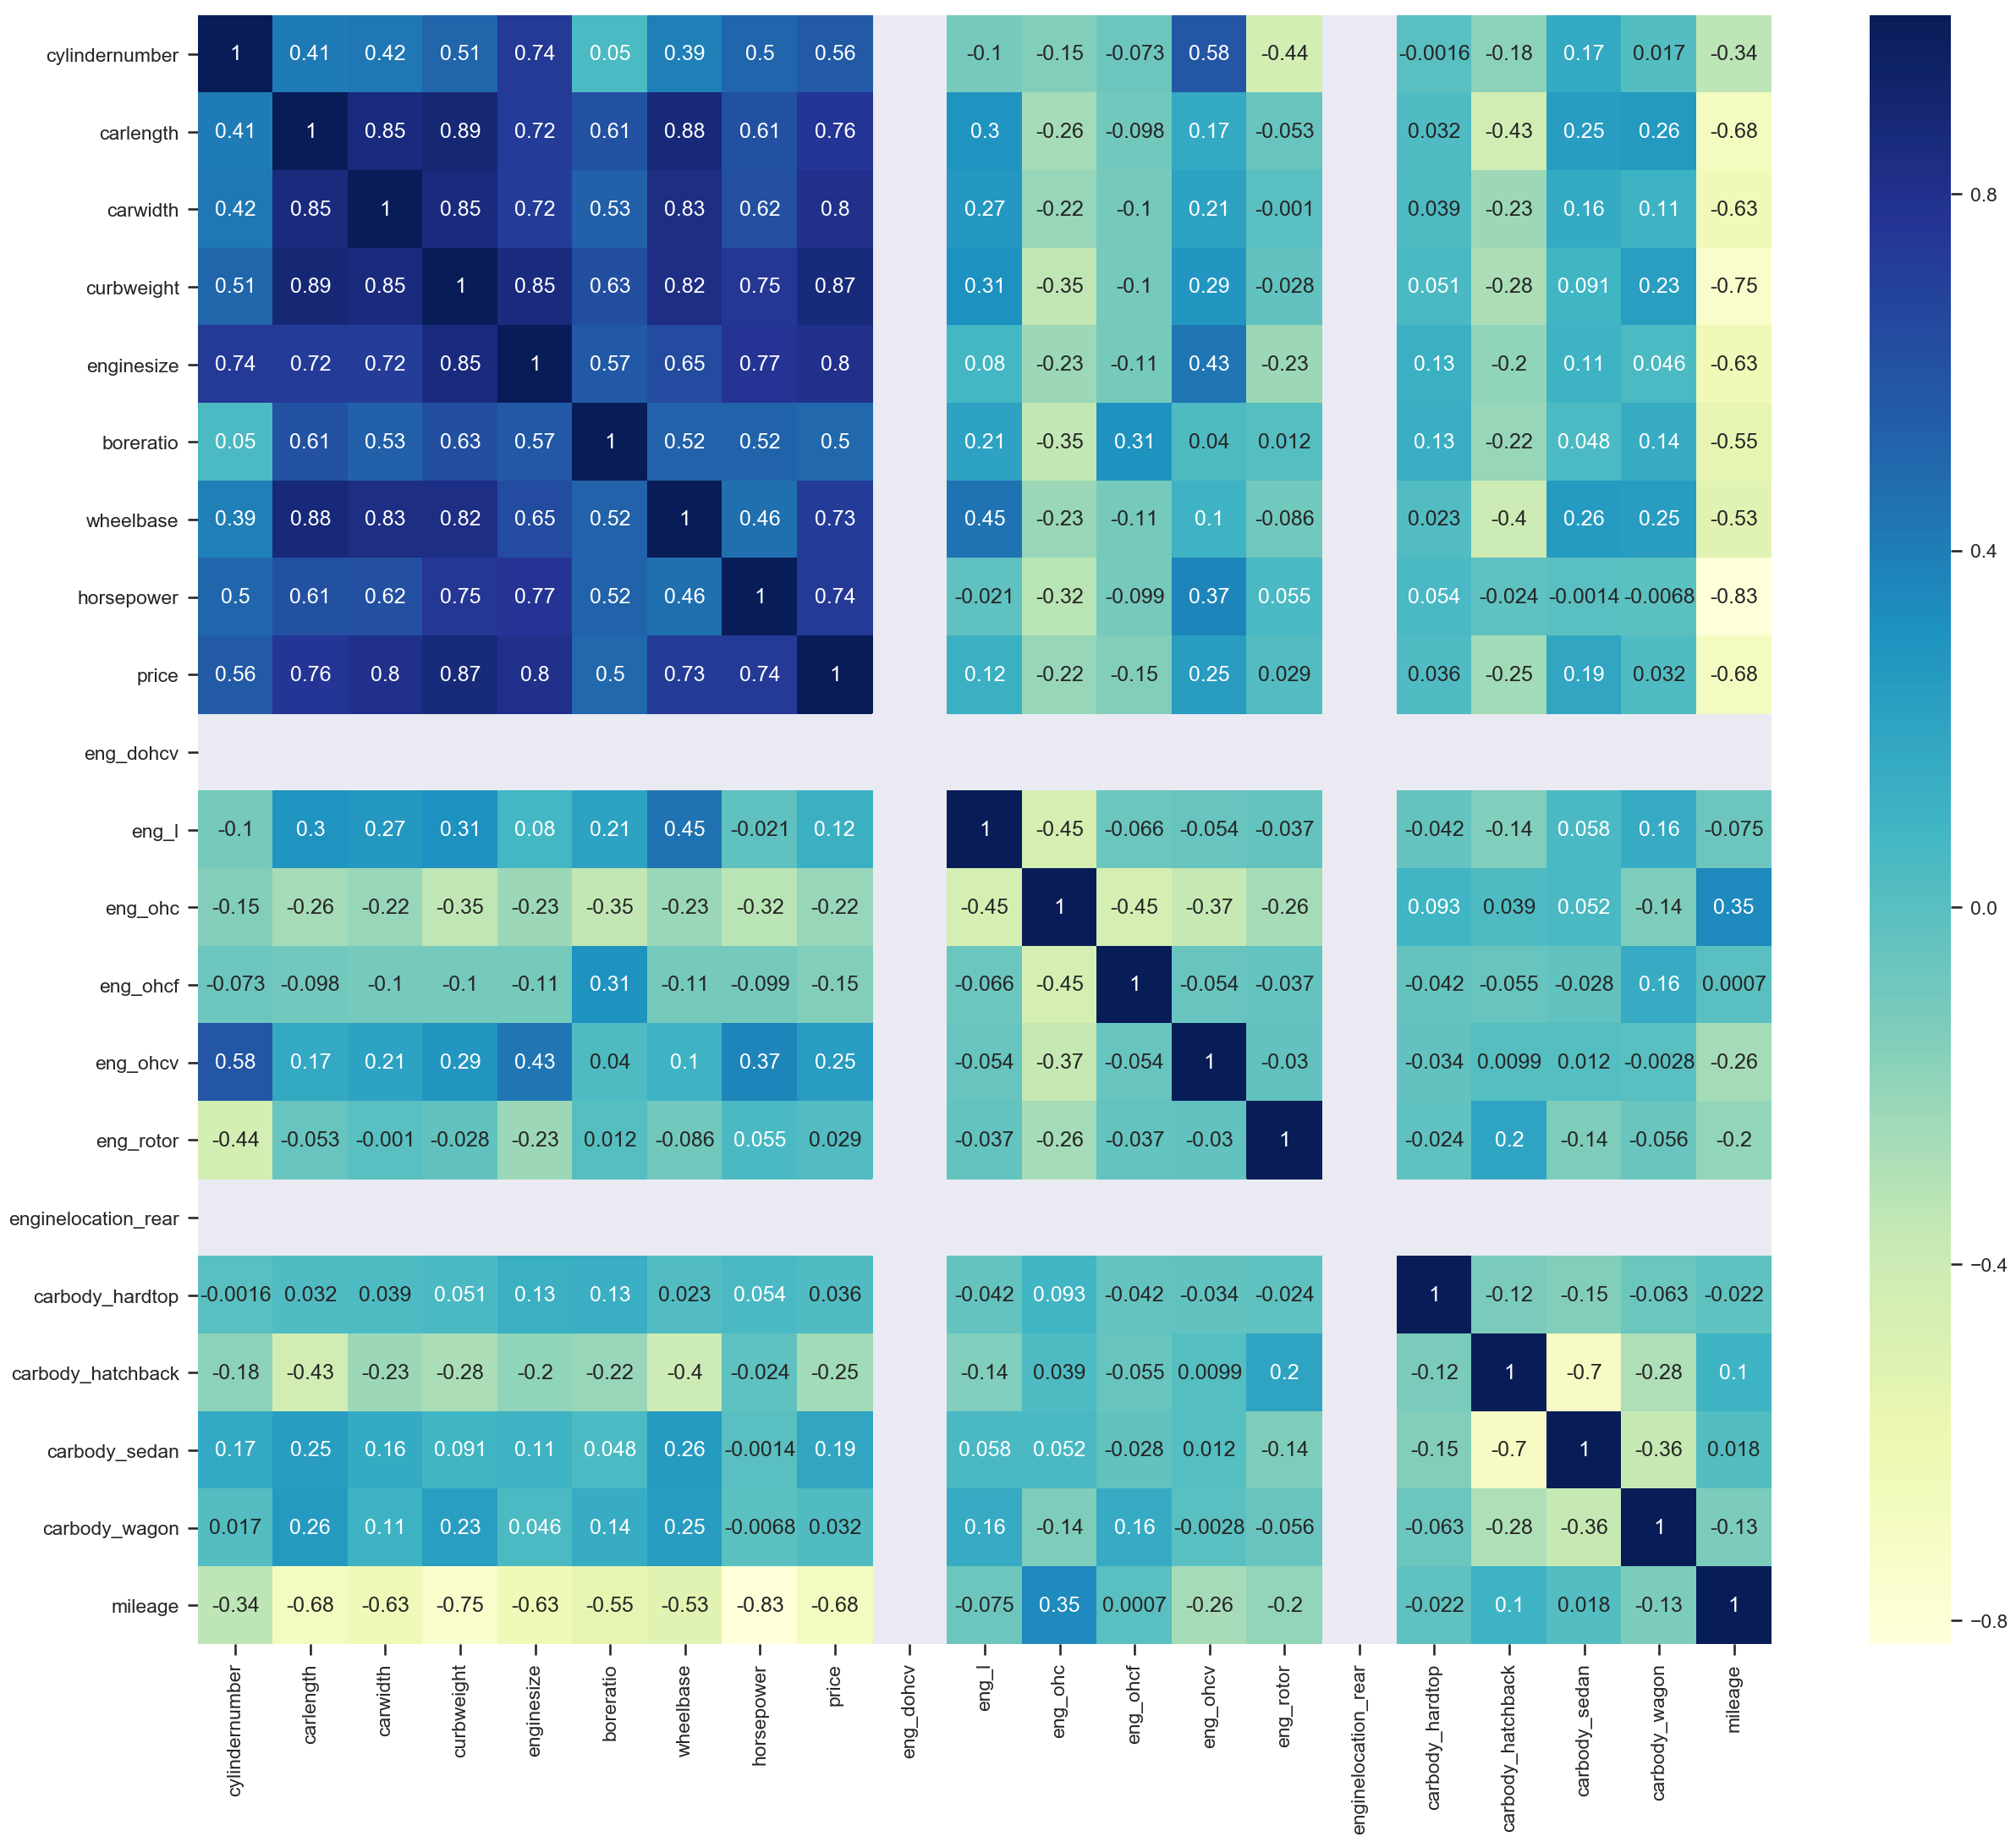

In [199]:
# Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_car_final.corr(), annot = True,cmap="YlGnBu" )
sns.set_context('talk')
plt.show()

Now we are good to go for creating model. For this case study, we will apply multiple linear regression model with some feature selection techniques

<div >
<h2>Applying Multiple Linear Regression-  Machine Learning Algorithm</h2>
    
</div>

***
- In Univariate Linear Regression we use only two variable. One as Dependent Variable and Other as Independent variable.
- Now, we will use Multiple Independent variables instead of one and will predict the Price i.e. Dependent variable.
- i.e the equation for multivariate linear regression is modified as below:
    
    $$ y = \theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\cdots +\theta_{n}x_{n} $$

<div > <h3>Hypothesis Testing</h3></div><br>
- For Null hypothesis(H0):- No column/feature has significant relation/correlation with price.<br>
- Alternative hypothesis(H1):- Few columns/features must have some significant relation with the price of the car    

<div > <h3>Splitting Data into Training and Testing Sets</h3></div>


In [200]:
# Putting feature variable to X
#all columns except price are our predictors
X = df_car_final.loc[:, df_car_final.columns != 'price']

# Putting response variable to y
y = df_car_final['price']

In [201]:
# checking our independent and dependent features

print(X.shape)
print(y.shape)
#also whole dataframe
print(df_car_final.shape)

(193, 20)
(193,)
(193, 21)


**Facts**:-  Above, In total we have 22 columns, in X we have now 21 columns and in y we have 1 column

In [202]:
# let's split the data into train and test

In [203]:
# random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

In [204]:
# check the data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 20)
(58, 20)
(135,)
(58,)


**Facts**:- From above, we can see that data has been split into 70:30 ratio (143 and 62). On 143 records we will train our model and on 62 records we will test and check the performance of our model.

<div > <h3>Building and tunning the model</h3></div>

In [205]:
import statsmodels.api as sm          # Importing statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
lm_model_1 = sm.OLS(y_train,X_train).fit()

In [206]:
# Let's see the summary of our first linear model
print(lm_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     49.07
Date:                Sun, 11 Aug 2019   Prob (F-statistic):           1.24e-45
Time:                        08:49:33   Log-Likelihood:                -48.799
No. Observations:                 135   AIC:                             135.6
Df Residuals:                     116   BIC:                             190.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0045    

**Observations**:- From above stat model summary, we can see that there are many features whose **p-values** are coming very high(> 0.005), In this case we fail to reject null hypothesis due to lack of evidence<br>
We need to remove those column one by one.<br>
Let's check **VIF(Variance Inflation Factor)** for multicollinearity


In [207]:
# creating a method for VIF

In [208]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [209]:
# creating function for stats_linear model
def generate_stat_model_summary(train_data):
    train_data = sm.add_constant(train_data)    # Adding a constant column to our dataframe
    # create a first fitted model
    lm_stat = sm.OLS(y_train,train_data).fit()
    print(lm_stat.summary())

In [210]:
# Calculating Vif values
vif_cal(input_data=df_car_final, dependent_col="price")

Var    Vif
17  carbody_sedan        17.56
3   curbweight           15.96
4   enginesize           15.57
16  carbody_hatchback    14.80
1   carlength            10.26
0   cylindernumber       9.59 
18  carbody_wagon        8.74 
6   wheelbase            8.14 
7   horsepower           6.74 
2   carwidth             5.89 
10  eng_ohc              5.85 
5   boreratio            5.60 
19  mileage              5.03 
9   eng_l                4.06 
11  eng_ohcf             3.80 
13  eng_rotor            3.03 
15  carbody_hardtop      2.59 
12  eng_ohcv             2.24 
8   eng_dohcv           NaN   
14  enginelocation_rear NaN

**Fact**:- Higher VIF means higher multicollinearity. There are many in-significant fields whose VIF is coming very high.<br>
Let's pick the significant columns using **RFE (Recursive Feature Elimination)** technique

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the less important features are pruned from the the current set of features. This procedure is recursively repeated on the pruned dataset until the desired number of features to select is reached.<br>

In [211]:
# from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
# lm = LinearRegression()
# rfe = RFE(lm, 10)

In [212]:
#fit the model
#rfe = rfe.fit(X_train, y_train)

In [213]:
# print(rfe.support_)
# print(rfe.ranking_)

In [214]:
# #creating a dataframe for rfe visualization
# rfe_df = pd.DataFrame(data={'Feature':X_train.columns, 'RFE_Status':rfe.support_,'RFE_Rank':rfe.ranking_})
# rfe_df

In [215]:
# creating a function for RFE
def check_rfe(model, column_count, predictors, target):
    rfe = RFE(model, column_count)
    #fit the model
    rfe = rfe.fit(predictors, target)
    rfe_df = pd.DataFrame(data={'Feature':predictors.columns, 'RFE_Status':rfe.support_,'RFE_Rank':rfe.ranking_})
    return rfe_df

In [216]:
#checking RFE method
# check_rfe(lm, 10, X_train, y_train)

In [217]:
# As per p-values, VIF , let's drop few columns and check the model

#Iteration 1
#drop below columns:-
- **eng_dohcv** :- p-value(0.973)
- **carlength** :- p-value(0.713)
- **eng_ohcv** :- p-value(0.700)
- **eng_l** :- p-value(0.159)
    

In [218]:
drop_cols = ['carlength','cylindernumber']
X_train_new = X_train.drop(drop_cols, axis=1)

X_train_new.head()


const  carwidth  curbweight  enginesize  boreratio  wheelbase  \
162  1.0    0.405001 -0.046262   -0.337421   -0.147049   0.679716    
175  1.0   -0.109921 -0.385860   -0.766727   -1.140174  -0.231416    
90   1.0   -0.985288 -0.980682   -0.766727   -0.605414  -0.731646    
77   1.0    0.302016  0.894485    1.181659    1.075259  -0.481531    
64   1.0    2.361704  2.632547    2.073293    1.037061   2.037482    

     horsepower  eng_dohcv     eng_l   eng_ohc  eng_ohcf  eng_ohcv  eng_rotor  \
162 -0.819322    0.0       -0.257485  0.567378 -0.257485 -0.20795  -0.145479    
175 -0.983322    0.0       -0.257485  0.567378 -0.257485 -0.20795  -0.145479    
90  -0.950522    0.0       -0.257485  0.567378 -0.257485 -0.20795  -0.145479    
77   1.542283    0.0       -0.257485  0.567378 -0.257485 -0.20795  -0.145479    
64   0.820682    0.0       -0.257485  0.567378 -0.257485 -0.20795  -0.145479    

     enginelocation_rear  carbody_hardtop  carbody_hatchback  carbody_sedan  \
162  0.0                 -0.163082        -0.737564           1.058716        
175  0.0                 -0.163082        -0.737564           1.058716        
90   0.0                 -0.163082        -0.737564          -0.944541        
77   0.0                 -0.163082         1.355815          -0.944541        
64   0.0                 -0.163082        -0.737564          -0.944541        

     carbody_wagon   mileage  
162 -0.385758       0.479787  
175 -0.385758       1.723994  
90   2.592296       0.849900  
77  -0.385758      -1.110908  
64   2.592296      -0.780169

In [219]:
# checking  stats model, VIF and RFE
generate_stat_model_summary(X_train_new)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     51.32
Date:                Sun, 11 Aug 2019   Prob (F-statistic):           2.19e-45
Time:                        08:49:34   Log-Likelihood:                -54.144
No. Observations:                 135   AIC:                             142.3
Df Residuals:                     118   BIC:                             191.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0121    

In [220]:
# vif
vif_cal(input_data=df_car_final.drop(drop_cols, axis=1), dependent_col="price")


Var    Vif
15  carbody_sedan        16.73
14  carbody_hatchback    14.68
1   curbweight           14.47
2   enginesize           8.39 
16  carbody_wagon        8.31 
4   wheelbase            6.85 
5   horsepower           6.61 
0   carwidth             5.33 
8   eng_ohc              5.12 
17  mileage              4.62 
9   eng_ohcf             3.41 
7   eng_l                3.37 
3   boreratio            2.68 
13  carbody_hardtop      2.57 
11  eng_rotor            2.15 
10  eng_ohcv             2.00 
6   eng_dohcv           NaN   
12  enginelocation_rear NaN

#Iteration 2
#drop below columns whose p-value is very high :-
- **eng_ohcv** 
- **eng_l** 
- **eng_dohcv**
    

In [221]:
# updating drop_col list
drop_cols = ['carlength','cylindernumber','eng_dohcv','eng_ohcv','eng_l']

In [222]:
# new train set
X_train_new = X_train.drop(drop_cols, axis=1)

X_train_new.head()

const  carwidth  curbweight  enginesize  boreratio  wheelbase  \
162  1.0    0.405001 -0.046262   -0.337421   -0.147049   0.679716    
175  1.0   -0.109921 -0.385860   -0.766727   -1.140174  -0.231416    
90   1.0   -0.985288 -0.980682   -0.766727   -0.605414  -0.731646    
77   1.0    0.302016  0.894485    1.181659    1.075259  -0.481531    
64   1.0    2.361704  2.632547    2.073293    1.037061   2.037482    

     horsepower   eng_ohc  eng_ohcf  eng_rotor  enginelocation_rear  \
162 -0.819322    0.567378 -0.257485 -0.145479   0.0                   
175 -0.983322    0.567378 -0.257485 -0.145479   0.0                   
90  -0.950522    0.567378 -0.257485 -0.145479   0.0                   
77   1.542283    0.567378 -0.257485 -0.145479   0.0                   
64   0.820682    0.567378 -0.257485 -0.145479   0.0                   

     carbody_hardtop  carbody_hatchback  carbody_sedan  carbody_wagon  \
162 -0.163082        -0.737564           1.058716      -0.385758        
175 -0.163082        -0.737564           1.058716      -0.385758        
90  -0.163082        -0.737564          -0.944541       2.592296        
77  -0.163082         1.355815          -0.944541      -0.385758        
64  -0.163082        -0.737564          -0.944541       2.592296        

      mileage  
162  0.479787  
175  1.723994  
90   0.849900  
77  -1.110908  
64  -0.780169

In [223]:
# checking  stats model, VIF and RFE
generate_stat_model_summary(X_train_new)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     58.98
Date:                Sun, 11 Aug 2019   Prob (F-statistic):           6.55e-47
Time:                        08:49:34   Log-Likelihood:                -54.805
No. Observations:                 135   AIC:                             139.6
Df Residuals:                     120   BIC:                             183.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0154    

In [224]:
# vif
vif_cal(input_data=df_car_final.drop(drop_cols, axis=1), dependent_col="price")

Var    Vif
12  carbody_sedan        15.83
11  carbody_hatchback    13.83
1   curbweight           13.64
13  carbody_wagon        7.87 
2   enginesize           6.31 
4   wheelbase            6.28 
5   horsepower           5.84 
0   carwidth             5.24 
14  mileage              4.59 
10  carbody_hardtop      2.48 
3   boreratio            2.41 
7   eng_ohcf             2.22 
6   eng_ohc              2.06 
8   eng_rotor            1.70 
9   enginelocation_rear NaN

#Iteration 3
#drop below columns  VIF is high:-

- **curbweight**
- **carbody_sedan**


In [225]:
# updating drop_col list
drop_cols = ['carlength','cylindernumber','eng_dohcv','eng_ohcv','eng_l','curbweight','carbody_sedan']

In [226]:
# new train set
X_train_new = X_train.drop(drop_cols, axis=1)

X_train_new.head()

const  carwidth  enginesize  boreratio  wheelbase  horsepower   eng_ohc  \
162  1.0    0.405001 -0.337421   -0.147049   0.679716  -0.819322    0.567378   
175  1.0   -0.109921 -0.766727   -1.140174  -0.231416  -0.983322    0.567378   
90   1.0   -0.985288 -0.766727   -0.605414  -0.731646  -0.950522    0.567378   
77   1.0    0.302016  1.181659    1.075259  -0.481531   1.542283    0.567378   
64   1.0    2.361704  2.073293    1.037061   2.037482   0.820682    0.567378   

     eng_ohcf  eng_rotor  enginelocation_rear  carbody_hardtop  \
162 -0.257485 -0.145479   0.0                 -0.163082          
175 -0.257485 -0.145479   0.0                 -0.163082          
90  -0.257485 -0.145479   0.0                 -0.163082          
77  -0.257485 -0.145479   0.0                 -0.163082          
64  -0.257485 -0.145479   0.0                 -0.163082          

     carbody_hatchback  carbody_wagon   mileage  
162 -0.737564          -0.385758       0.479787  
175 -0.737564          -0.385758       1.723994  
90  -0.737564           2.592296       0.849900  
77   1.355815          -0.385758      -1.110908  
64  -0.737564           2.592296      -0.780169

In [227]:
# checking  stats model, VIF and RFE
generate_stat_model_summary(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     55.98
Date:                Sun, 11 Aug 2019   Prob (F-statistic):           9.57e-44
Time:                        08:49:34   Log-Likelihood:                -67.742
No. Observations:                 135   AIC:                             161.5
Df Residuals:                     122   BIC:                             199.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0198    

In [228]:
# vif
vif_cal(input_data=df_car_final.drop(drop_cols, axis=1), dependent_col="price")

Var   Vif
4   horsepower           5.62
3   wheelbase            4.82
0   carwidth             4.69
1   enginesize           4.62
12  mileage              4.23
2   boreratio            2.28
6   eng_ohcf             2.00
5   eng_ohc              1.86
7   eng_rotor            1.67
10  carbody_hatchback    1.37
11  carbody_wagon        1.22
9   carbody_hardtop      1.09
8   enginelocation_rear NaN

#Iteration 4
#drop below columns whose p-value is high:-

- **eng_ohcf**
- **carbody_hardtop**
- **carbody_wagon**
- **boreratio**


In [229]:
# updating drop_col list
drop_cols = ['carlength','cylindernumber','eng_dohcv','eng_ohcv','eng_l',
             'curbweight','carbody_sedan','eng_ohcf','carbody_hardtop',
             'carbody_wagon','boreratio','mileage','enginelocation_rear']

In [230]:
# new train set
X_train_new = X_train.drop(drop_cols, axis=1)

X_train_new.head()

const  carwidth  enginesize  wheelbase  horsepower   eng_ohc  eng_rotor  \
162  1.0    0.405001 -0.337421    0.679716  -0.819322    0.567378 -0.145479    
175  1.0   -0.109921 -0.766727   -0.231416  -0.983322    0.567378 -0.145479    
90   1.0   -0.985288 -0.766727   -0.731646  -0.950522    0.567378 -0.145479    
77   1.0    0.302016  1.181659   -0.481531   1.542283    0.567378 -0.145479    
64   1.0    2.361704  2.073293    2.037482   0.820682    0.567378 -0.145479    

     carbody_hatchback  
162 -0.737564           
175 -0.737564           
90  -0.737564           
77   1.355815           
64  -0.737564

In [231]:
# checking  stats model, VIF and RFE
generate_stat_model_summary(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     84.09
Date:                Sun, 11 Aug 2019   Prob (F-statistic):           1.34e-44
Time:                        08:49:35   Log-Likelihood:                -77.451
No. Observations:                 135   AIC:                             170.9
Df Residuals:                     127   BIC:                             194.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0055      0.03

In [232]:
# vif
vif_cal(input_data=df_car_final.drop(drop_cols, axis=1), dependent_col="price")

Var   Vif
0  carwidth           4.55
1  enginesize         4.22
2  wheelbase          4.14
3  horsepower         3.08
5  eng_rotor          1.40
6  carbody_hatchback  1.29
4  eng_ohc            1.23

**Observation**:- Considering above features as final predictors of the car's price. Let's create a stats model and sklearn model to test and predict

<div > <h3>Building final  model</h3></div>

<div > <h4>Using OLS technique</h4></div>

In [233]:
X = df_car_final[['carwidth','enginesize','horsepower','wheelbase','enginelocation_rear','eng_ohc','carbody_hatchback']]
y = df_car_final.price
X = sm.add_constant(X)
# # create a fitted model in one line
lm_final = sm.OLS(y,X).fit()

print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     115.1
Date:                Sun, 11 Aug 2019   Prob (F-statistic):           6.62e-60
Time:                        08:49:35   Log-Likelihood:                -124.23
No. Observations:                 193   AIC:                             262.5
Df Residuals:                     186   BIC:                             285.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.325e-16    

In [234]:
# predicting values
predicted_values = lm_final.predict(X)

<div > <h4>Performance metrics</h4></div>

In [235]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
mse = mean_squared_error(df_car_final.price, predicted_values)
r_squared = r2_score(df_car_final.price, predicted_values)
exp_variance = explained_variance_score( predicted_values,df_car_final.price)
print("Mean Squared Error :- {0}".format(mse))
print("R-squared values :- {0}".format(r_squared))
print("Explained variance :- {0}".format(exp_variance))

Mean Squared Error :- 0.2121386487455596
R-squared values :- 0.7878613512544403
Explained variance :- 0.7307411406743194


Text(0, 0.5, 'Views')

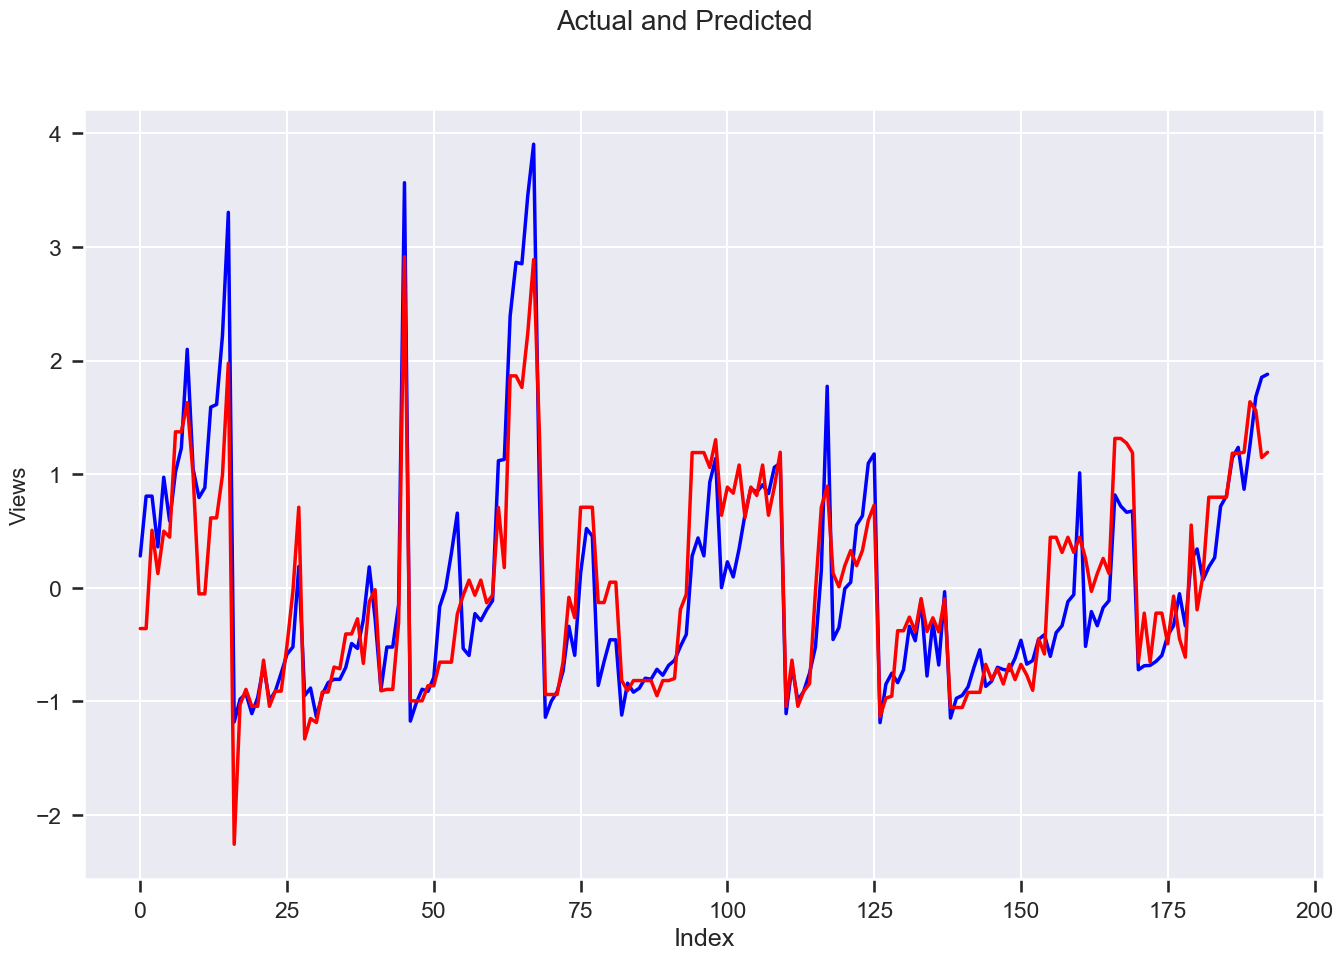

In [236]:
# Actual vs Predicted
c = [i for i in range(len(X))]
fig = plt.figure(figsize=(16,10))
plt.plot(c,df_car_final.price, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,predicted_values, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

Text(0, 0.5, 'Car Price-Predicted Price')

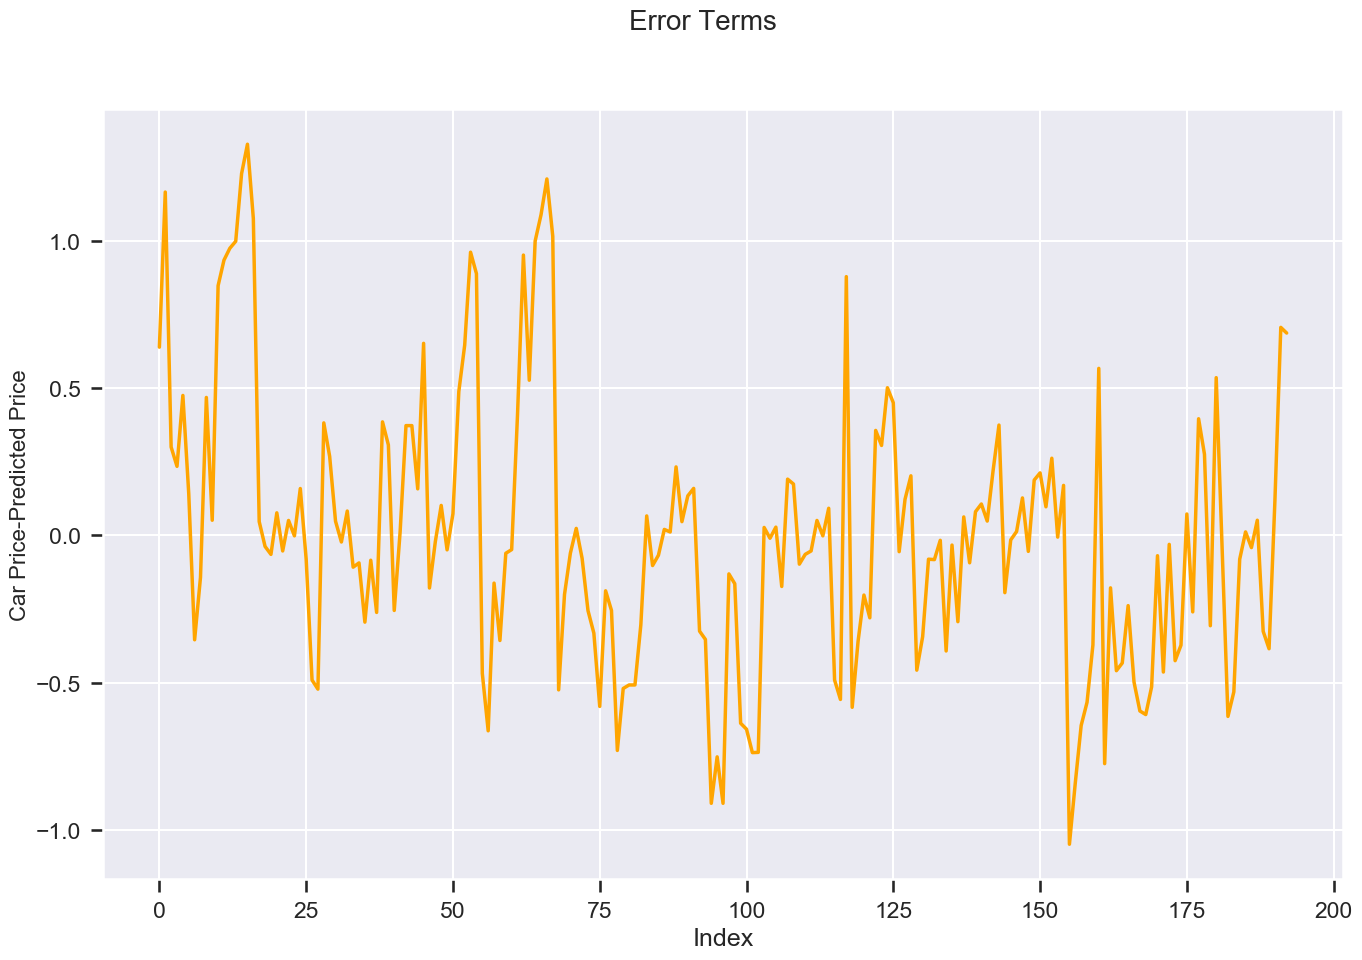

In [237]:
# Error terms
c = [i for i in range(len(X))]
fig = plt.figure(figsize=(16,10))
plt.plot(c,df_car_final.price-predicted_values, color="orange", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Car Price-Predicted Price', fontsize=16)                # Y-label

<div > <h4>Using Sklearn package</h4></div>

In [238]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#splitting the data into train and test set
X = df_car_final[['carwidth','enginesize','horsepower','wheelbase','eng_ohc','carbody_hatchback']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
#fitting the model
lm = LinearRegression()
lm.fit(X_train, y_train)
#predicting the target/test data
price_pred = lm.predict(X_test)

<div > <h4>Performance metrics</h4></div>

In [239]:
mse = mean_squared_error(y_test, price_pred)
r_squared = r2_score(y_test, price_pred)
exp_variance = explained_variance_score( price_pred,y_test)
print("Mean Squared Error :- {0}".format(mse))
print("R-squared values :- {0}".format(r_squared))
print("Explained variance :- {0}".format(exp_variance))

Mean Squared Error :- 0.28788701490824076
R-squared values :- 0.805971550575362
Explained variance :- 0.7166203852380761


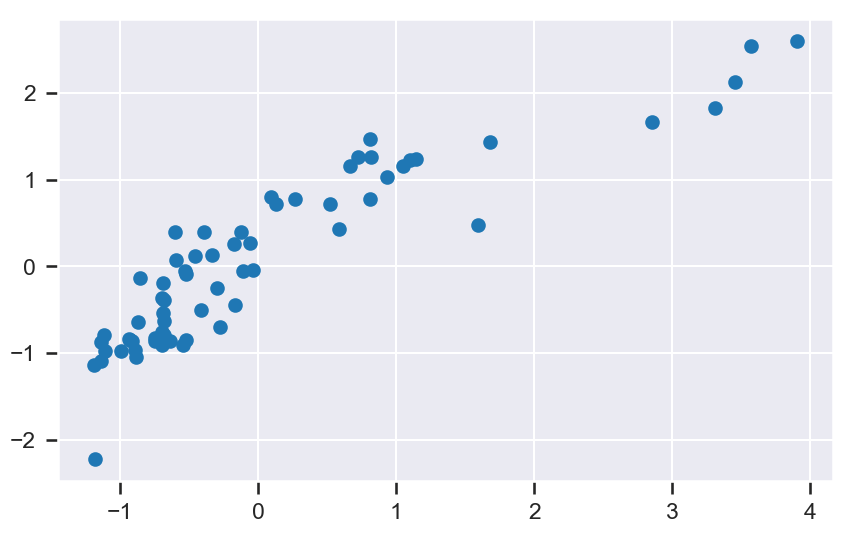

In [240]:
# scatter plot
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=price_pred)

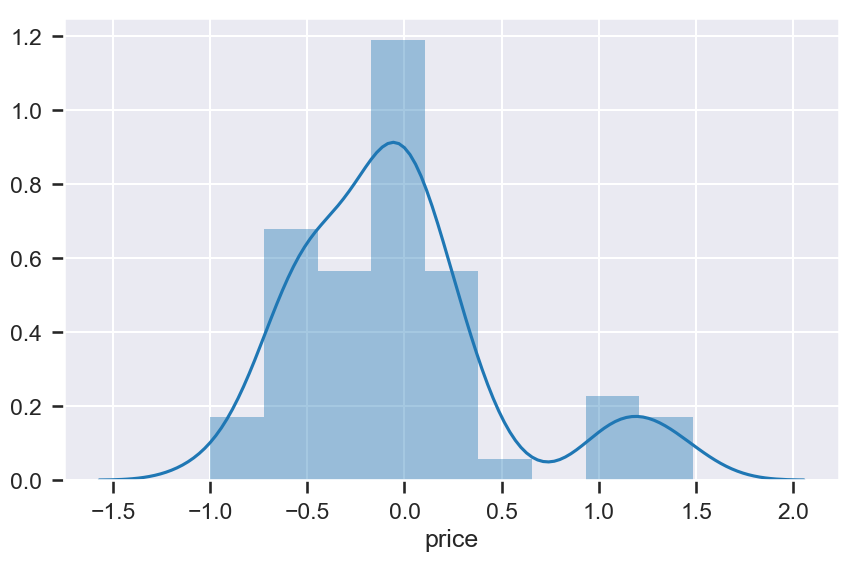

In [241]:
# now histogram
plt.figure(figsize=(10,6))
sns.distplot(y_test-price_pred)

Text(0, 0.5, 'ytest-ypred')

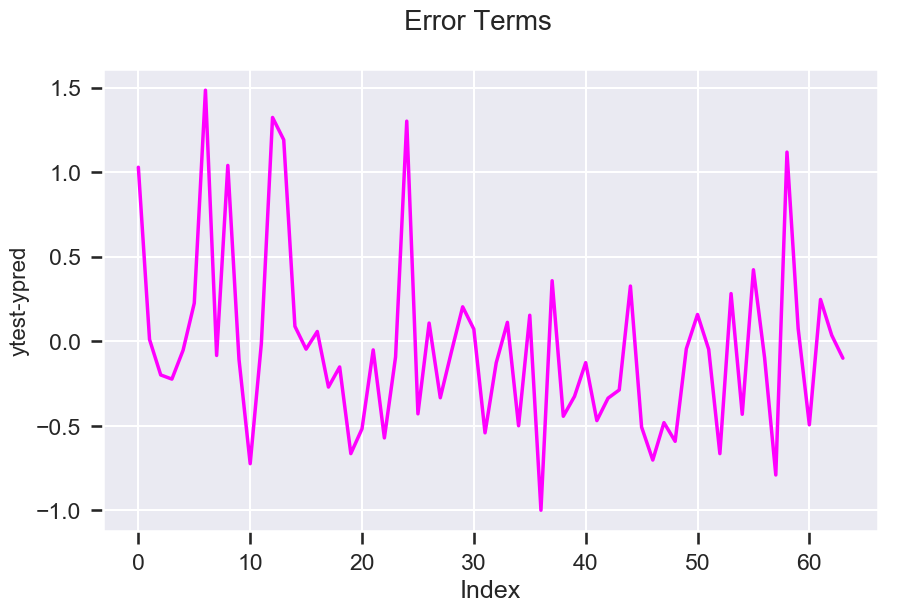

In [242]:
# Error terms
c = [i for i in range(len(price_pred))]
fig = plt.figure(figsize=(10,6))
plt.plot(c,y_test-price_pred, color="magenta", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0, 0.5, 'Price')

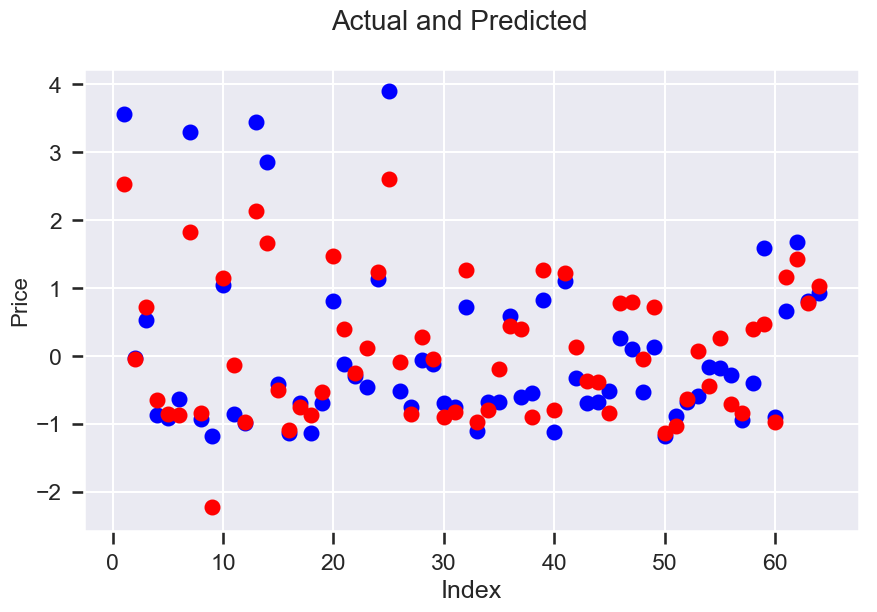

In [243]:
# Actual vs Predicted
# below first line is to take x-axis fro y-test, y-test has total record of 60
c = [i for i in range(1,y_test.shape[0]+1,1)]
fig = plt.figure(figsize=(10,6))
plt.scatter(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.scatter(c,price_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16) 

<div > <h4>Using Gradient Descent technique</h4></div><br>
Concept:- Gradient descent is a mathematical technique or solution to get optimum values of all the parameters/coefficients which yield minimum **Error** or **Cost function**

In [244]:
# applying GD
# define cost function
# takes in theta (current values of coefficients b0, b1, b2), X and y
# returns total cost at current b0, b1, b2

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [245]:
# gradient descent
# takes in current X, y, learning rate alpha, num_iters
# returns cost (notice it uses the cost function defined above)

def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Intercept','carwidth','enginesize','horsepower','wheelbase','eng_ohc','carbody_hatchback','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta[0],theta[1],theta[2],theta[3],
                         theta[4],theta[5],theta[6],
                         cost]

    return gdm_df

In [246]:
X = df_car_final[['carwidth','enginesize','horsepower','wheelbase','eng_ohc','carbody_hatchback']]
y = df_car_final.price

In [247]:
# Add a columns of 1s as an intercept to X.
# The intercept column is needed for convenient matrix representation of cost function

X['intercept'] = 1.0
X = X.reindex_axis(['intercept','carwidth','enginesize','horsepower','wheelbase','eng_ohc','carbody_hatchback'], axis=1)
# X = X.reindex_axis(['intercept','carwidth','enginesize'], axis=1)
X.head()

intercept  carwidth  enginesize  horsepower  wheelbase   eng_ohc  \
0  1.0       -0.830812  0.323048    0.427081   -1.785701  -1.762493   
1  1.0       -0.830812  0.323048    0.427081   -1.785701  -1.762493   
2  1.0       -0.109921  1.049565    1.837484   -0.731646  -1.762493   
3  1.0        0.250524 -0.370445    0.131880    0.215217   0.567378   
4  1.0        0.353509  0.521189    0.558281    0.143756   0.567378   

   carbody_hatchback  
0 -0.737564           
1 -0.737564           
2  1.355815           
3 -0.737564           
4 -0.737564

In [248]:
# converting X and y to numpy array
X = np.array(X)
y = np.array(y)

In [249]:
# intializing theta 
theta = np.matrix(np.array(np.zeros(7)))  # nine coefficients

In [250]:
print(X.shape)
print(y.shape)
print(theta.shape)

(193, 7)
(193,)
(1, 7)


In [251]:
# print costs with various values of coefficients b0, b1, b2, b3, b4, b5, b6, b7 and b8
# theta = np.zeros(X.shape[1])  #intializing the coefficents as zeroes
# Theta is the vector representing coefficients ()
alpha = 0.01
iterations = 1000
df_grad = gradient_descent_multi(X, y, theta, alpha, iterations)

In [252]:
df_grad.head()

Intercept  carwidth  enginesize  horsepower  wheelbase   eng_ohc  \
0  2.347000e-18  0.008009  0.008040    0.007396    0.007284  -0.002158   
1  4.233804e-18  0.015764  0.015828    0.014567    0.014326  -0.004217   
2  5.982549e-18  0.023272  0.023372    0.021518    0.021136  -0.006181   
3  7.133039e-18  0.030542  0.030681    0.028259    0.027720  -0.008053   
4  8.145470e-18  0.037581  0.037761    0.034794    0.034086  -0.009836   

   carbody_hatchback      cost  
0 -0.002540           0.475632  
1 -0.004988           0.452800  
2 -0.007347           0.431407  
3 -0.009621           0.411361  
4 -0.011812           0.392577

In [253]:
df_grad.cost.min()  #min cost from all the iterations

0.10608081718979265

In [254]:
df_grad[df_grad.cost == df_grad.cost.min()]  #filtering the min cost details

Intercept  carwidth  enginesize  horsepower  wheelbase   eng_ohc  \
999 -9.652152e-16  0.274564  0.258405    0.301769    0.178933   0.042381   

     carbody_hatchback      cost  
999 -0.061709           0.106081

Text(0.5, 1.0, 'Error vs. Training Epoch')

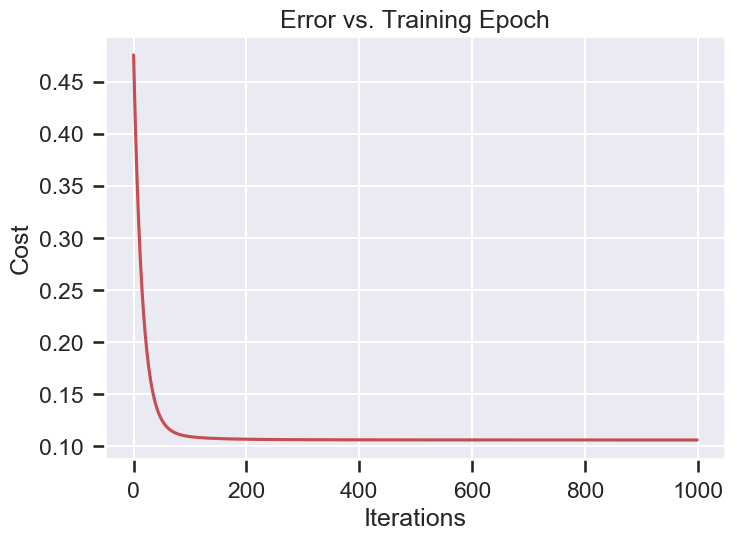

In [255]:
# plot the cost
fig, ax = plt.subplots()
ax.plot(np.arange(iterations), df_grad.cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

In [256]:
#Cost is gradually decreasing with iteration and becomes constant after 50 iteration

In [257]:
#printing linear model intercepts and the coefficients of different features
print(lm.intercept_)
print(lm.coef_)

0.011885059148363351
[ 0.33145058  0.13635593  0.3643031   0.14393838  0.05901155 -0.05821664]


In [258]:
X_train.head()


carwidth  enginesize  horsepower  wheelbase   eng_ohc  carbody_hatchback
26  -0.573351  0.058861   -0.327321    0.840504   0.567378 -0.737564         
123  0.405001  0.025837    0.394281    0.090160   0.567378 -0.737564         
85  -0.985288 -0.766727   -0.950522   -0.731646   0.567378 -0.737564         
95   0.405001  2.007246    1.771884    0.322409  -1.762493 -0.737564         
2   -0.109921  1.049565    1.837484   -0.731646  -1.762493  1.355815

In [259]:
#creating the dataframe to show the intercept and coefficients of the model
df_lm = pd.DataFrame(data= lm.coef_.reshape(1,-1),columns=['carwidth','enginesize','horsepower',
                                                           'wheelbase','eng_ohc','carbody_hatchback'])

In [260]:
df_lm['intercept'] = lm.intercept_  #adding intercept in the dataframe

In [261]:
''' reverse the column '''
df_lm[df_lm.columns[::-1]]

intercept  carbody_hatchback   eng_ohc  wheelbase  horsepower  enginesize  \
0  0.011885  -0.058217           0.059012  0.143938   0.364303    0.136356     

   carwidth  
0  0.331451

**Observation**:- We can use LinearModel from sklearn or Gradient descent coefficients to predict the car price

In [262]:
df_car.head()

symboling fueltype aspiration  doornumber      carbody drivewheel  \
0  3          gas      std        2           convertible  rwd         
1  3          gas      std        2           convertible  rwd         
2  1          gas      std        2           hatchback    rwd         
3  2          gas      std        4           sedan        fwd         
4  2          gas      std        4           sedan        4wd         

  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0  front          88.6       168.8      64.1      48.8       2548         
1  front          88.6       168.8      64.1      48.8       2548         
2  front          94.5       171.2      65.5      52.4       2823         
3  front          99.8       176.6      66.2      54.3       2337         
4  front          99.4       176.6      66.4      54.3       2824         

  enginetype  cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0  dohc       4               130         mpfi       3.47       2.68     
1  dohc       4               130         mpfi       3.47       2.68     
2  ohcv       6               152         mpfi       2.68       3.47     
3  ohc        4               109         mpfi       3.19       3.40     
4  ohc        5               136         mpfi       3.19       3.40     

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  \
0  9.0               111         5000     21       27          13495.0   
1  9.0               111         5000     21       27          16500.0   
2  9.0               154         5000     19       26          16500.0   
3  10.0              102         5500     24       30          13950.0   
4  8.0               115         5500     18       22          17450.0   

    CarCompany  
0  alfa-romero  
1  alfa-romero  
2  alfa-romero  
3  audi         
4  audi

<div >
<h2>K-fold validation and model accuracy</h2>
    
</div>

In [273]:
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import accuracy_score, r2_score

folds = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(lm, X_train, y_train, cv=folds)

print (scores, np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(lm, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold
print(accuracy)



[0.66575809 0.74018761 0.66989189 0.60081751 0.74405624] 0.6841422675907722 0.053319475060759236
0.766382057090056


<div >
<h2>K-fold validation and pipeline</h2>
    
</div>

In [278]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 10]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))
print(y_train_pred.shape)
print(y_test_pred.shape)

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)

(129, 5)
(64, 5)


In [281]:
# compare r2 for train and test sets (for all polynomial fits)
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=0.76, test score=0.81
Polynomial degree 2: train score=-1.56, test score=-10.92
Polynomial degree 3: train score=0.73, test score=-548.78
Polynomial degree 6: train score=0.97, test score=-6.575391897035936e+24
Polynomial degree 10: train score=0.97, test score=-7.460117409665428e+27


**Observation**:- It seems that Polynomial feature=1 is the best.

<div >
<h2>Hyperparameter Tuning Using Grid Search Cross-Validation</h2>
    
</div>

In [286]:
df_car_final.head()

cylindernumber  carlength  carwidth  curbweight  enginesize  boreratio  \
0 -0.282730       -0.383941  -0.830812  0.097170    0.323048    0.616893    
1 -0.282730       -0.383941  -0.830812  0.097170    0.323048    0.616893    
2  2.445611       -0.181595  -0.109921  0.677227    1.049565   -2.400678    
3 -0.282730        0.273682   0.250524 -0.347892   -0.370445   -0.452626    
4  1.081441        0.273682   0.353509  0.679336    0.521189   -0.452626    

   wheelbase  horsepower     price  eng_dohcv     eng_l   eng_ohc  eng_ohcf  \
0 -1.785701   0.427081    0.280175  0.0       -0.257485 -1.762493 -0.257485   
1 -1.785701   0.427081    0.806629  0.0       -0.257485 -1.762493 -0.257485   
2 -0.731646   1.837484    0.806629  0.0       -0.257485 -1.762493 -0.257485   
3  0.215217   0.131880    0.359888  0.0       -0.257485  0.567378 -0.257485   
4  0.143756   0.558281    0.973062  0.0       -0.257485  0.567378 -0.257485   

   eng_ohcv  eng_rotor  enginelocation_rear  carbody_hardtop  \
0 -0.207950 -0.145479   0.0                 -0.163082          
1 -0.207950 -0.145479   0.0                 -0.163082          
2  4.808846 -0.145479   0.0                 -0.163082          
3 -0.207950 -0.145479   0.0                 -0.163082          
4 -0.207950 -0.145479   0.0                 -0.163082          

   carbody_hatchback  carbody_sedan  carbody_wagon   mileage  
0 -0.737564          -0.944541      -0.385758      -0.725046  
1 -0.737564          -0.944541      -0.385758      -0.725046  
2  1.355815          -0.944541      -0.385758      -0.969163  
3 -0.737564           1.058716      -0.385758      -0.252563  
4 -0.737564           1.058716      -0.385758      -1.339275

In [287]:
X = df_car_final.loc[:, df_car_final.columns != 'price']
y = df_car_final['price']

In [288]:
X.shape

(193, 20)

In [289]:
y.shape

(193,)

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

In [291]:
# number of features in X_train
len(X_train.columns)

20

In [292]:
#let's apply rfe for model selection

In [313]:
from sklearn.model_selection import GridSearchCV
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 8))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2',                        
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='warn', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [296]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0  0.021142       0.001608      0.001398         4.859241e-04     
1  0.018551       0.001353      0.001596         4.883448e-04     
2  0.015358       0.001848      0.001195         3.997256e-04     
3  0.015158       0.003241      0.000599         4.887723e-04     
4  0.010572       0.000489      0.000798         3.990651e-04     
5  0.009775       0.000744      0.000996         3.731536e-06     
6  0.009181       0.000396      0.000997         5.642013e-07     

  param_n_features_to_select                       params  split0_test_score  \
0  1                          {'n_features_to_select': 1}  0.653365            
1  2                          {'n_features_to_select': 2}  0.684541            
2  3                          {'n_features_to_select': 3}  0.664877            
3  4                          {'n_features_to_select': 4}  0.584650            
4  5                          {'n_features_to_select': 5}  0.582221            
5  6                          {'n_features_to_select': 6}  0.496786            
6  7                          {'n_features_to_select': 7}  0.549246            

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0  0.422772           0.654172           0.750975           0.774220            
1  0.642331           0.647777           0.794335           0.785795            
2  0.706262           0.623286           0.818607           0.810510            
3  0.718603           0.488932           0.828117           0.815167            
4  0.694120           0.536670           0.828284           0.813297            
5  0.656373           0.508394           0.828285           0.798604            
6  0.641164           0.420023           0.830976           0.794496            

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0  0.651101         0.124323        6                0.792055             
1  0.710956         0.066260        2                0.804605             
2  0.724708         0.077956        1                0.809541             
3  0.687094         0.131944        4                0.853643             
4  0.690918         0.117867        3                0.853663             
5  0.657689         0.139385        5                0.866577             
6  0.647181         0.152781        7                0.882083             

   split1_train_score  split2_train_score  split3_train_score  \
0  0.682365            0.783481            0.574129             
1  0.814224            0.801270            0.770345             
2  0.820105            0.829814            0.783581             
3  0.836804            0.867440            0.802396             
4  0.840250            0.878761            0.802576             
5  0.844385            0.895562            0.802576             
6  0.844946            0.904510            0.813654             

   split4_train_score  mean_train_score  std_train_score  
0  0.765212            0.719448          0.082412         
1  0.781918            0.794472          0.015992         
2  0.807897            0.810188          0.015473         
3  0.816600            0.835376          0.023682         
4  0.842989            0.843648          0.024626         
5  0.859025            0.853625          0.030486         
6  0.860025            0.861044          0.031106

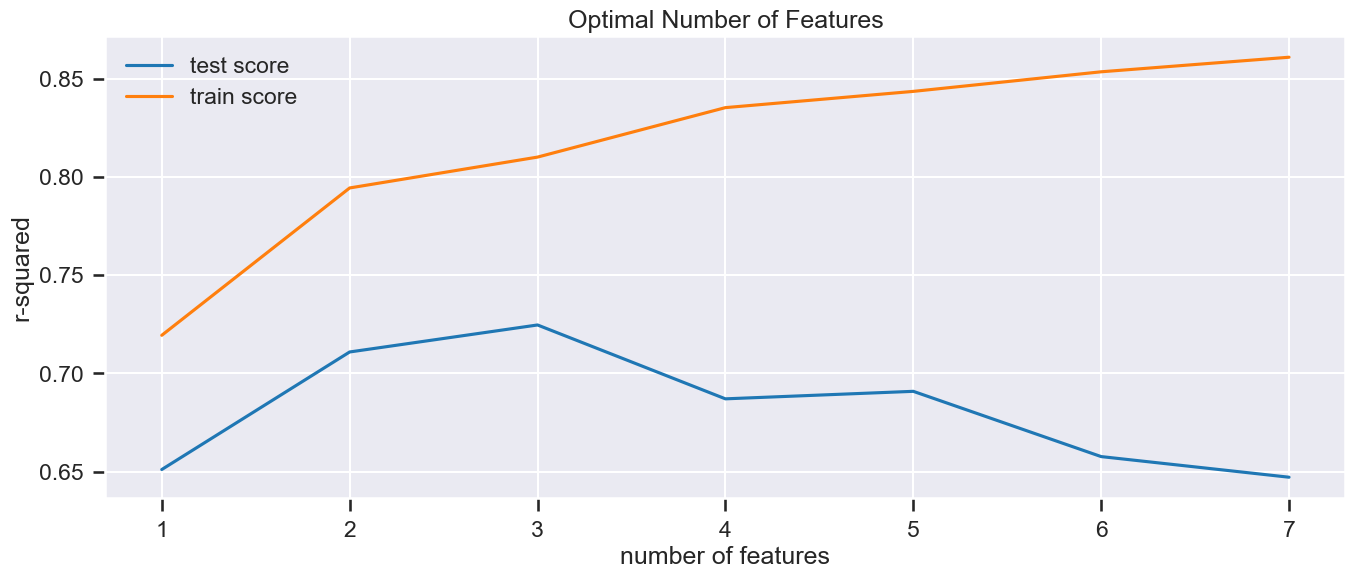

In [297]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [299]:
# final model
n_features_optimal = 3

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.7453179024426404


In [304]:
print(rfe.support_)

[False False False  True False False  True  True False False False False
 False False False False False False False False]


In [309]:
selectedFeatures = zip(X_train.columns, rfe.support_)

In [310]:
for feature in selectedFeatures:
    print(feature)

('cylindernumber', False)
('carlength', False)
('carwidth', False)
('curbweight', True)
('enginesize', False)
('boreratio', False)
('wheelbase', True)
('horsepower', True)
('eng_dohcv', False)
('eng_l', False)
('eng_ohc', False)
('eng_ohcf', False)
('eng_ohcv', False)
('eng_rotor', False)
('enginelocation_rear', False)
('carbody_hardtop', False)
('carbody_hatchback', False)
('carbody_sedan', False)
('carbody_wagon', False)
('mileage', False)


<div >
<h2>Conclusion and Recommendations</h2>
    
</div>

- Toyota, Nissan and mazda cars are most popular and are selling cheaper cars. So **Teclov_Chineese** will have the competition with them
- **Teclov_Chineese** should start from **gas** cars as it is mostly used
- **Teclov_Chineese** should focus on **std** car aspiration model because it is mostly preferred in US market
- **Teclov_Chineese** should launch **Sedan and Hatchback** cars first because of its high usage in US market
- **Teclov_Chineese** should focus on **front engine location** cars only because it has highest and maximum share in the car's population, also its price range is low from 5000 to 12000 dollars
- **Teclov_Chineese** should focus on **OHC enginetype** cars because of high demand and also its price is cheapest from 5000 to 12000 dollars
- **Teclov_Chineese** should give focus on **mpfi and 2bbl** fuelsystem cars as it is most popular
Car price varies from 5000 to 45000 dollars in US market and most car's price lie between 5000 to 10000 dollars
- Engine Rotor, Carbody(Hatchback), OHC type engine, Wheelbase, Horsepower and width of the Car should be the most fucusable point while manufacturing Cars for US market as these fare the most affecting factors for the price and demand of the car.
- Hatchback type car has higher price range(negatively correlated with price of the car).
- Linear regression model **lm** can be used to predict the price of the car by passing ['carwidth','enginesize','horsepower',
                                                           'wheelbase','eng_ohc','carbody_hatchback'] features to model to predict.


<div >
<h3>References</h3>
    
</div>

- https://kite.com/blog/python/data-analysis-visualization-python
- https://www.valuepenguin.com/loans/what-does-it-mean-to-default-on-a-loan
- https://www.creditkarma.com/advice/i/what-is-a-charge-off/

<div >
<h3>Thank You<br>Vikash</h3>
    
</div>